# EDA

* Basic information by Yifeng PENG
* Visualization on numerical data by Yifeng PENG
* Research on merging opinion and recommendation features by Yifeng PENG
* Visualization and correlation exploration on categorical data by Xiting WANG
* Research on merging behavioral features by Xiting WANG
* Combining and structuring code by Xiting  WANG

### Exploratory Data Analysis (EDA) is a crucial step in understanding and analyzing a dataset. 
### It involves examining the dataset's characteristics, identifying patterns, relationships, and anomalies, and gaining insights that can guide further analysis or modeling.

In [ ]:
# Import Necessary Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Read and store content
# of an excel file 
read_file = pd.read_excel ("training_set_features.xlsx")
  
# Write the dataframe object
# into csv file
read_file.to_csv ("training_set_features.csv", 
                  index = None,
                  header=True)

In [ ]:
read_file = pd.read_excel ("training_set_labels.xlsx")
  
# Write the dataframe object
# into csv file
read_file.to_csv ("training_set_labels.csv", 
                  index = None,
                  header=True)

# Data Overview

## Understand the dataset

In [ ]:
# X represents all features, Y represents all labels, test is used to testify last models
X = pd.read_csv('./training_set_features.csv', index_col='respondent_id')
Y = pd.read_csv('./training_set_labels.csv', index_col='respondent_id')
#test = pd.read_csv('test_set_features.csv', index_col='respondent_id')

In [ ]:
# df_raw is the combination of all features and labels
df_raw = X.join(Y)

In [ ]:
len(df_raw)

26707

In [ ]:
df_raw.shape #check the dimensions

(26707, 37)

In [ ]:
df_raw.head(5) #Verify the data has been loaded correctly by inspecting a few rows 

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
0                       1.0             0.0                        0.0   
1                       3.0             2.0                        0.0   
2                       1.0             1.0                        0.0   
3                       1.0             1.0                        0.0   
4                       2.0             1.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
0                               0.0                   0.0   
1                               1.0                   0.0   
2                               1.0                   0.0   
3                               1.0                   0.0   
4                               1.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
0                                0.0                          0.0   
1                                1.0                          0.0   
2                                0.0                          0.0   
3                                1.0                          1.0   
4                                1.0                          1.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
0                                  1.0                    1.0   
1                                  1.0                    1.0   
2                                  0.0                    0.0   
3                                  0.0                    0.0   
4                                  0.0                    1.0   

               doctor_recc_h1n1  ...  rent_or_own   employment_status  \
respondent_id                    ...                                    
0                           0.0  ...          Own  Not in Labor Force   
1                           0.0  ...         Rent            Employed   
2                           NaN  ...          Own            Employed   
3                           0.0  ...         Rent  Not in Labor Force   
4                           0.0  ...          Own            Employed   

               hhs_geo_region                census_msa  household_adults  \
respondent_id                                                               
0                    oxchjgsf                   Non-MSA               0.0   
1                    bhuqouqj  MSA, Not Principle  City               0.0   
2                    qufhixun  MSA, Not Principle  City               2.0   
3                    lrircsnp       MSA, Principle City               0.0   
4                    qufhixun  MSA, Not Principle  City               1.0   

               household_children  employment_industry  employment_occupation  \
respondent_id                                                                   
0                             0.0                  NaN                    NaN   
1                             0.0             pxcmvdjn               xgwztkwe   
2                             0.0             rucpziij               xtkaffoo   
3                             0.0                  NaN                    NaN   
4                             0.0             wxleyezf               emcorrxb   

               h1n1_vaccine  seasonal_vaccine  
respondent_id                                  
0                         0                 0  
1                         0                 1  
2                         0                 0  
3                         0                 1  
4                         0                 0  

[5 rows x 37 columns]

In [ ]:
df_raw.tail(5)

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
26702                   2.0             0.0                        0.0   
26703                   1.0             2.0                        0.0   
26704                   2.0             2.0                        0.0   
26705                   1.0             1.0                        0.0   
26706                   0.0             0.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
26702                           1.0                   0.0   
26703                           1.0                   0.0   
26704                           1.0                   1.0   
26705                           0.0                   0.0   
26706                           1.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
26702                            0.0                          0.0   
26703                            1.0                          0.0   
26704                            1.0                          1.0   
26705                            0.0                          0.0   
26706                            0.0                          0.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
26702                              1.0                    0.0   
26703                              0.0                    0.0   
26704                              0.0                    1.0   
26705                              0.0                    NaN   
26706                              0.0                    0.0   

               doctor_recc_h1n1  ...  rent_or_own   employment_status  \
respondent_id                    ...                                    
26702                       0.0  ...          Own  Not in Labor Force   
26703                       1.0  ...         Rent            Employed   
26704                       0.0  ...          Own                 NaN   
26705                       0.0  ...         Rent            Employed   
26706                       0.0  ...          Own  Not in Labor Force   

               hhs_geo_region                census_msa  household_adults  \
respondent_id                                                               
26702                qufhixun                   Non-MSA               0.0   
26703                lzgpxyit       MSA, Principle City               1.0   
26704                lzgpxyit  MSA, Not Principle  City               0.0   
26705                lrircsnp                   Non-MSA               1.0   
26706                mlyzmhmf       MSA, Principle City               1.0   

               household_children  employment_industry  employment_occupation  \
respondent_id                                                                   
26702                         0.0                  NaN                    NaN   
26703                         0.0             fcxhlnwr               cmhcxjea   
26704                         0.0                  NaN                    NaN   
26705                         0.0             fcxhlnwr               haliazsg   
26706                         0.0                  NaN                    NaN   

               h1n1_vaccine  seasonal_vaccine  
respondent_id                                  
26702                     0                 0  
26703                     0                 0  
26704                     0                 1  
26705                     0                 0  
26706                     0                 0  

[5 rows x 37 columns]

##  Display Data types

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

From the list of columns, the dataset and type of data each column contains can be veiwed. And we can see that the data types int64, float64 and object. The object data type os what pandas doesn't recognize as any other specific type ehoch in practice means all of the values in the columns are strings.


 By veiwing the basic information about the data set, there is onne attribute called "respondent_id" used to distinguish different participants, which is useless for the analyzation and prediction.There are also three features missed about half of the vslue, namely "health ensurance", employment_industry and employment_occupation with only 13377 non-null. These columns were  going to be discarded in the future engineering  work, so there is no need to explore more sbouut  this.

In [ ]:
df_raw.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

## Showing Basics Statistics 

Provide basic descriptive statistics for numeric columns and object columns.

In [ ]:
df_raw.describe()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count  26615.000000    26591.000000               26636.000000   
mean       1.618486        1.262532                   0.048844   
std        0.910311        0.618149                   0.215545   
min        0.000000        0.000000                   0.000000   
25%        1.000000        1.000000                   0.000000   
50%        2.000000        1.000000                   0.000000   
75%        2.000000        2.000000                   0.000000   
max        3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          26499.000000          26688.000000           26665.000000   
mean               0.725612              0.068982               0.825614   
std                0.446214              0.253429               0.379448   
min                0.000000              0.000000               0.000000   
25%                0.000000              0.000000               1.000000   
50%                1.000000              0.000000               1.000000   
75%                1.000000              0.000000               1.000000   
max                1.000000              1.000000               1.000000   

       behavioral_large_gatherings  behavioral_outside_home  \
count                  26620.00000             26625.000000   
mean                       0.35864                 0.337315   
std                        0.47961                 0.472802   
min                        0.00000                 0.000000   
25%                        0.00000                 0.000000   
50%                        0.00000                 0.000000   
75%                        1.00000                 1.000000   
max                        1.00000                 1.000000   

       behavioral_touch_face  doctor_recc_h1n1  ...  \
count           26579.000000      24547.000000  ...   
mean                0.677264          0.220312  ...   
std                 0.467531          0.414466  ...   
min                 0.000000          0.000000  ...   
25%                 0.000000          0.000000  ...   
50%                 1.000000          0.000000  ...   
75%                 1.000000          0.000000  ...   
max                 1.000000          1.000000  ...   

       opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
count                 26316.000000       26319.000000   
mean                      3.850623           2.342566   
std                       1.007436           1.285539   
min                       1.000000           1.000000   
25%                       3.000000           1.000000   
50%                       4.000000           2.000000   
75%                       5.000000           4.000000   
max                       5.000000           5.000000   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
count                 26312.000000                 26245.000000   
mean                      2.357670                     4.025986   
std                       1.362766                     1.086565   
min                       1.000000                     1.000000   
25%                       1.000000                     4.000000   
50%                       2.000000                     4.000000   
75%                       4.000000                     5.000000   
max                       5.000000                     5.000000   

       opinion_seas_risk  opinion_seas_sick_from_vacc  household_adults  \
count       26193.000000                 26170.000000      26458.000000   
mean            2.719162                     2.118112          0.886499   
std             1.385055                     1.332950          0.753422   
min             1.000000                     1.000000          0.000000   
25%             2.000000                     1.000000          0.000000   
50%             2.000000                     2.000000          1.000000   
75%             4.00

In [ ]:
df_raw.describe(include = object)

age_group         education   race     sex             income_poverty  \
count       26707             25300  26707   26707                      22284   
unique          5                 4      4       2                          3   
top     65+ Years  College Graduate  White  Female  <= $75,000, Above Poverty   
freq         6843             10097  21222   15858                      12777   

       marital_status rent_or_own employment_status hhs_geo_region  \
count           25299       24665             25244          26707   
unique              2           2                 3             10   
top           Married         Own          Employed       lzgpxyit   
freq            13555       18736             13560           4297   

                      census_msa employment_industry employment_occupation  
count                      26707               13377                 13237  
unique                         3                  21                    23  
top     MSA, Not Principle  City            fcxhlnwr              xtkaffoo  
freq                       11645                2468                  1778

## Generate the stacked bar chart for each feature

In [ ]:
def vaccination_rate_plot(feature, label, data, ax=None):
    counts = (df_raw[[label, feature]]
                  .groupby([label, feature])
                  .size()
                  .unstack(label)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    #ax.invert_yaxis()
    ax.legend().remove()

In [ ]:
def choose_figure_plot(cols_to_plot):
    fig, ax = plt.subplots(
        len(cols_to_plot), 2, figsize=(12,len(cols_to_plot)*3)
    )
    if len(cols_to_plot) > 1:
        for idx, feature in enumerate(cols_to_plot):
            vaccination_rate_plot(
                feature, 'h1n1_vaccine', df_raw, ax=ax[idx, 0]
            )
            vaccination_rate_plot(
                feature, 'seasonal_vaccine', df_raw, ax=ax[idx, 1]
            )
        ax[0, 0].legend(
            loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
        )
        ax[0, 1].legend(
            loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
        )
        fig.tight_layout()
    else:
        vaccination_rate_plot(
            cols_to_plot[0], 'h1n1_vaccine', df_raw, ax=ax[0]
        )
        vaccination_rate_plot(
            cols_to_plot[0], 'seasonal_vaccine', df_raw, ax=ax[1]
        )
        ax[0].legend(
            loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
        )
        ax[1].legend(
            loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
        )
        fig.tight_layout()


### The notability of h1n1

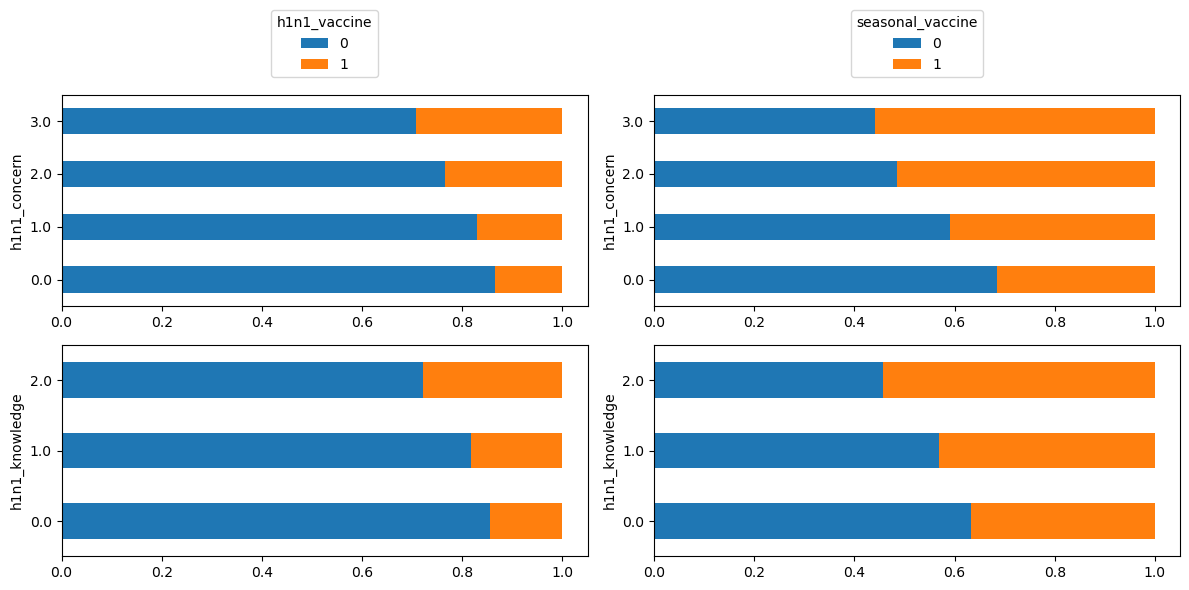

In [ ]:
# draw plots for each group of features
choose_figure_plot(list(df_raw.columns)[0:2])

### The behaviors of protect themselves from the flu

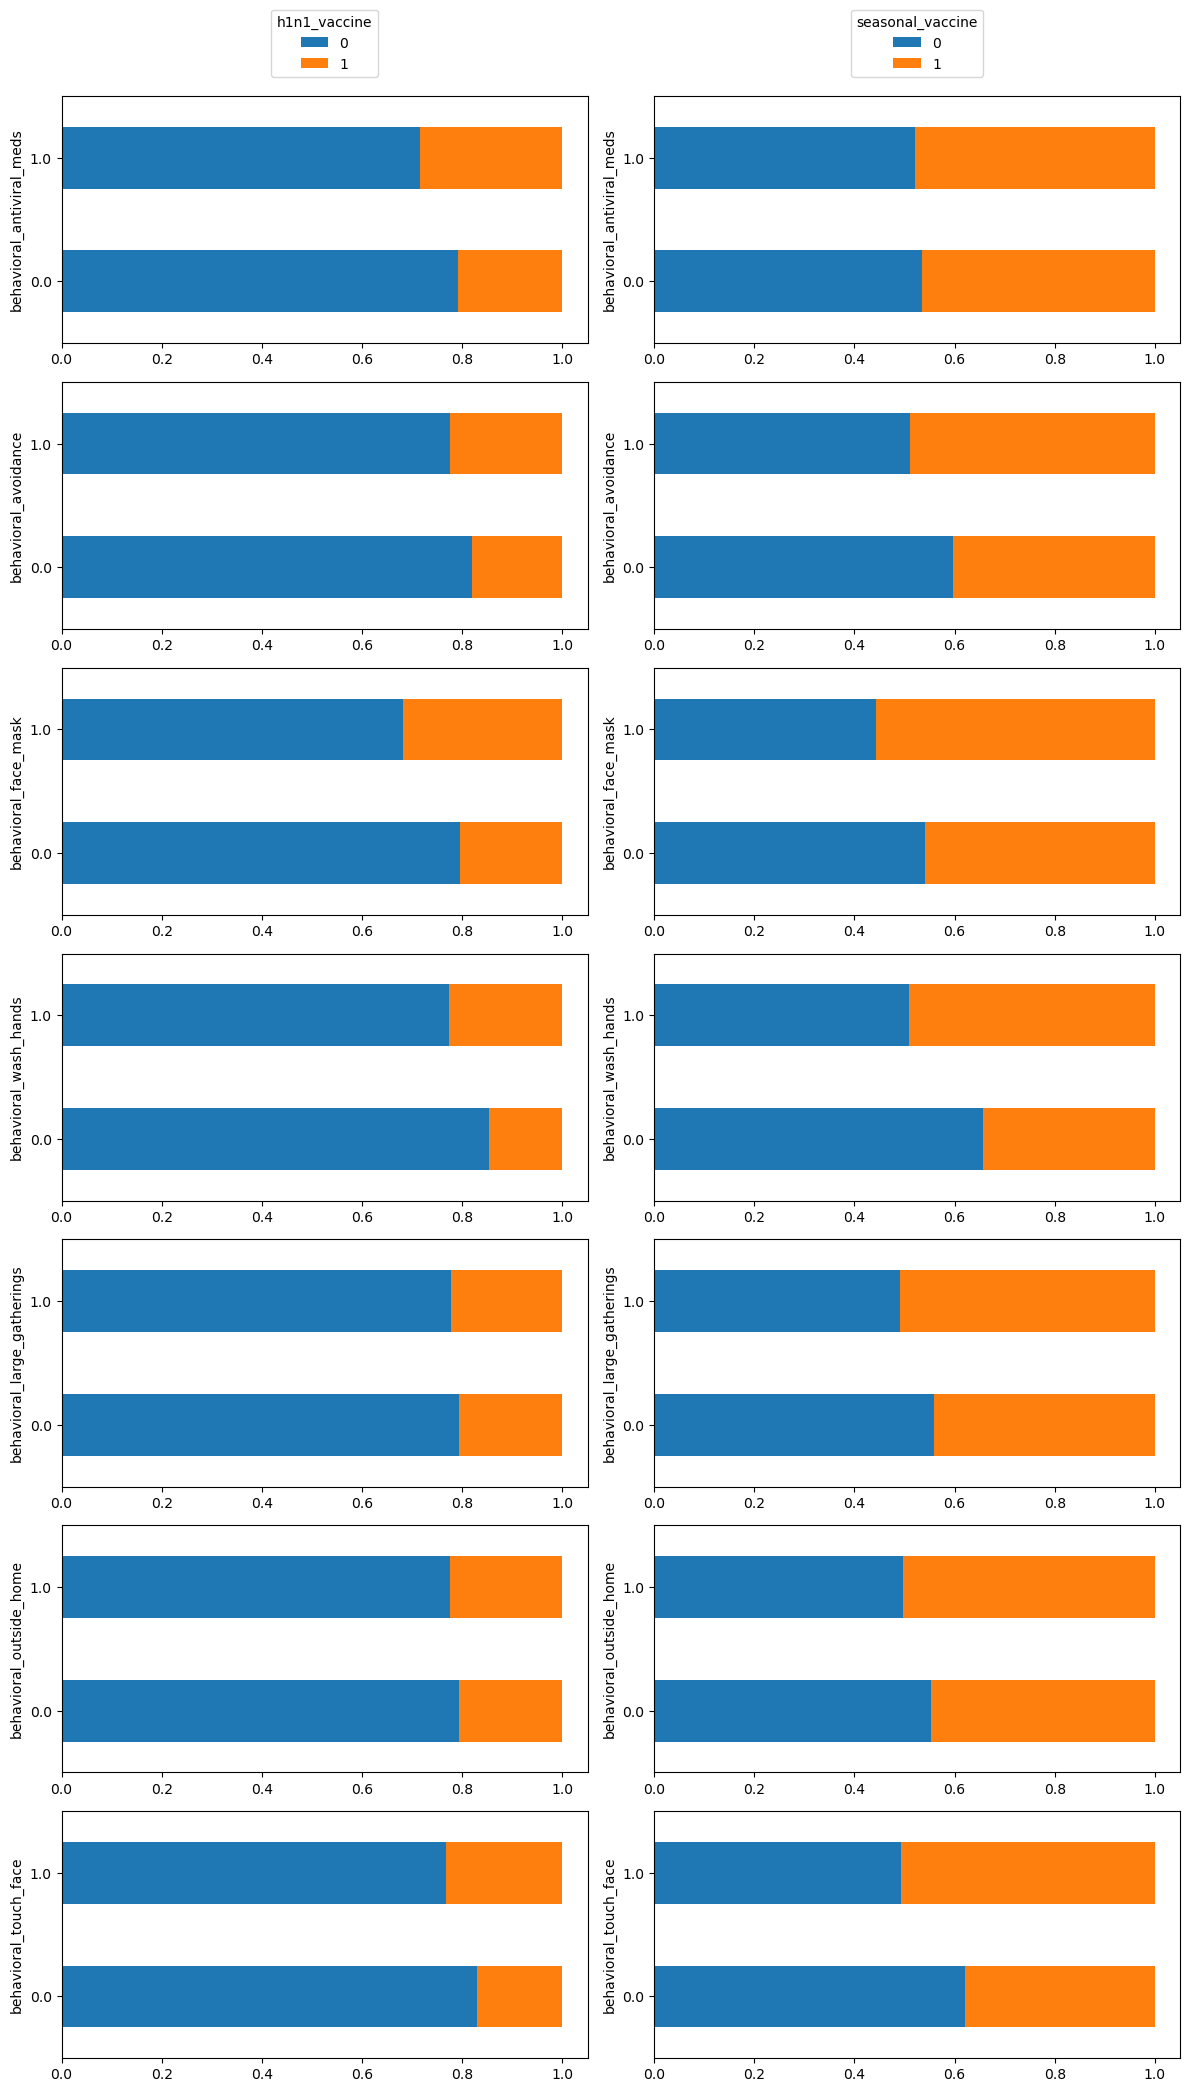

In [ ]:
choose_figure_plot(list(df_raw.columns)[2:9])

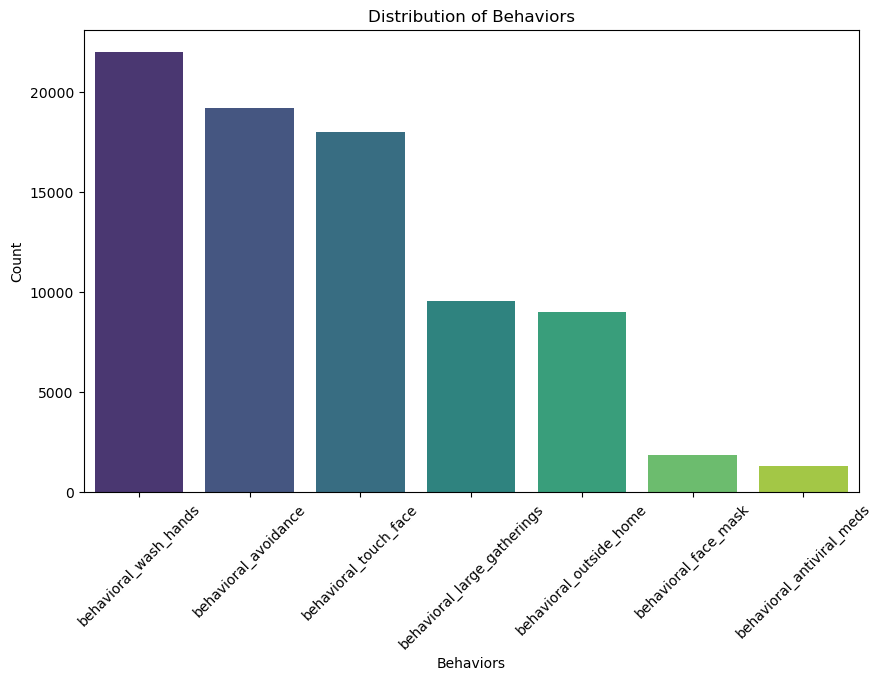

In [ ]:
# Select the relevant columns for the plot
behaviors = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask',
             'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home',
             'behavioral_touch_face']

# Calculate the proportions for each behavior category
behavior_counts = df_raw[behaviors].sum().sort_values(ascending=False)

# Create the stacked bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=behavior_counts.index, y=behavior_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Behaviors')
plt.ylabel('Count')
plt.title('Distribution of Behaviors')
plt.show()


By observing the figures, we found that some features really useless:
* **behavioral_antiviral_med**: Imbalance, too much values are 0, can not be used to predict
* **behavioral_face_mask**: Imbalance, too much values are 0, can not be used to predict

### Doctor's recommendation

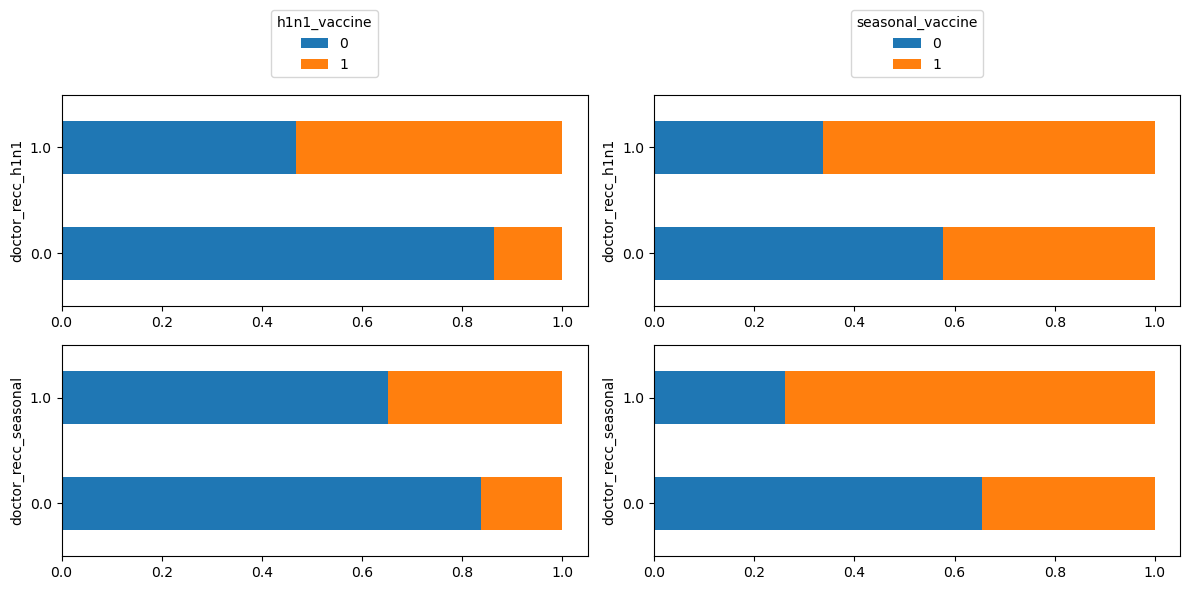

In [ ]:
choose_figure_plot(list(df_raw.columns)[9:11])

### Personal Condition (Numerical)

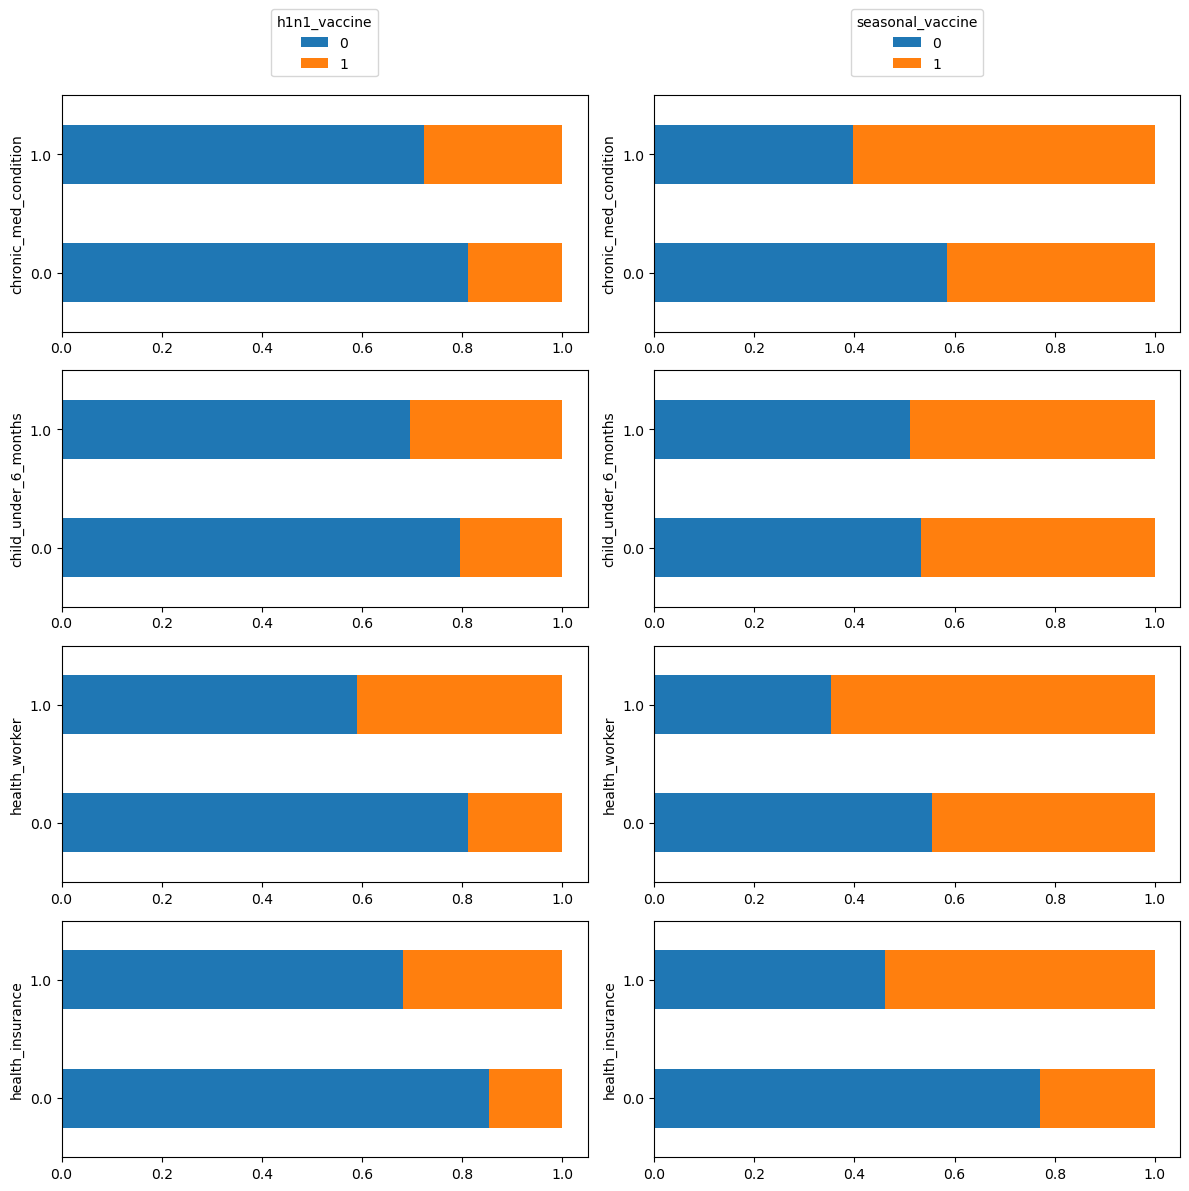

In [ ]:
choose_figure_plot(list(df_raw.columns)[11:15])

### Opinion towards the vaccine

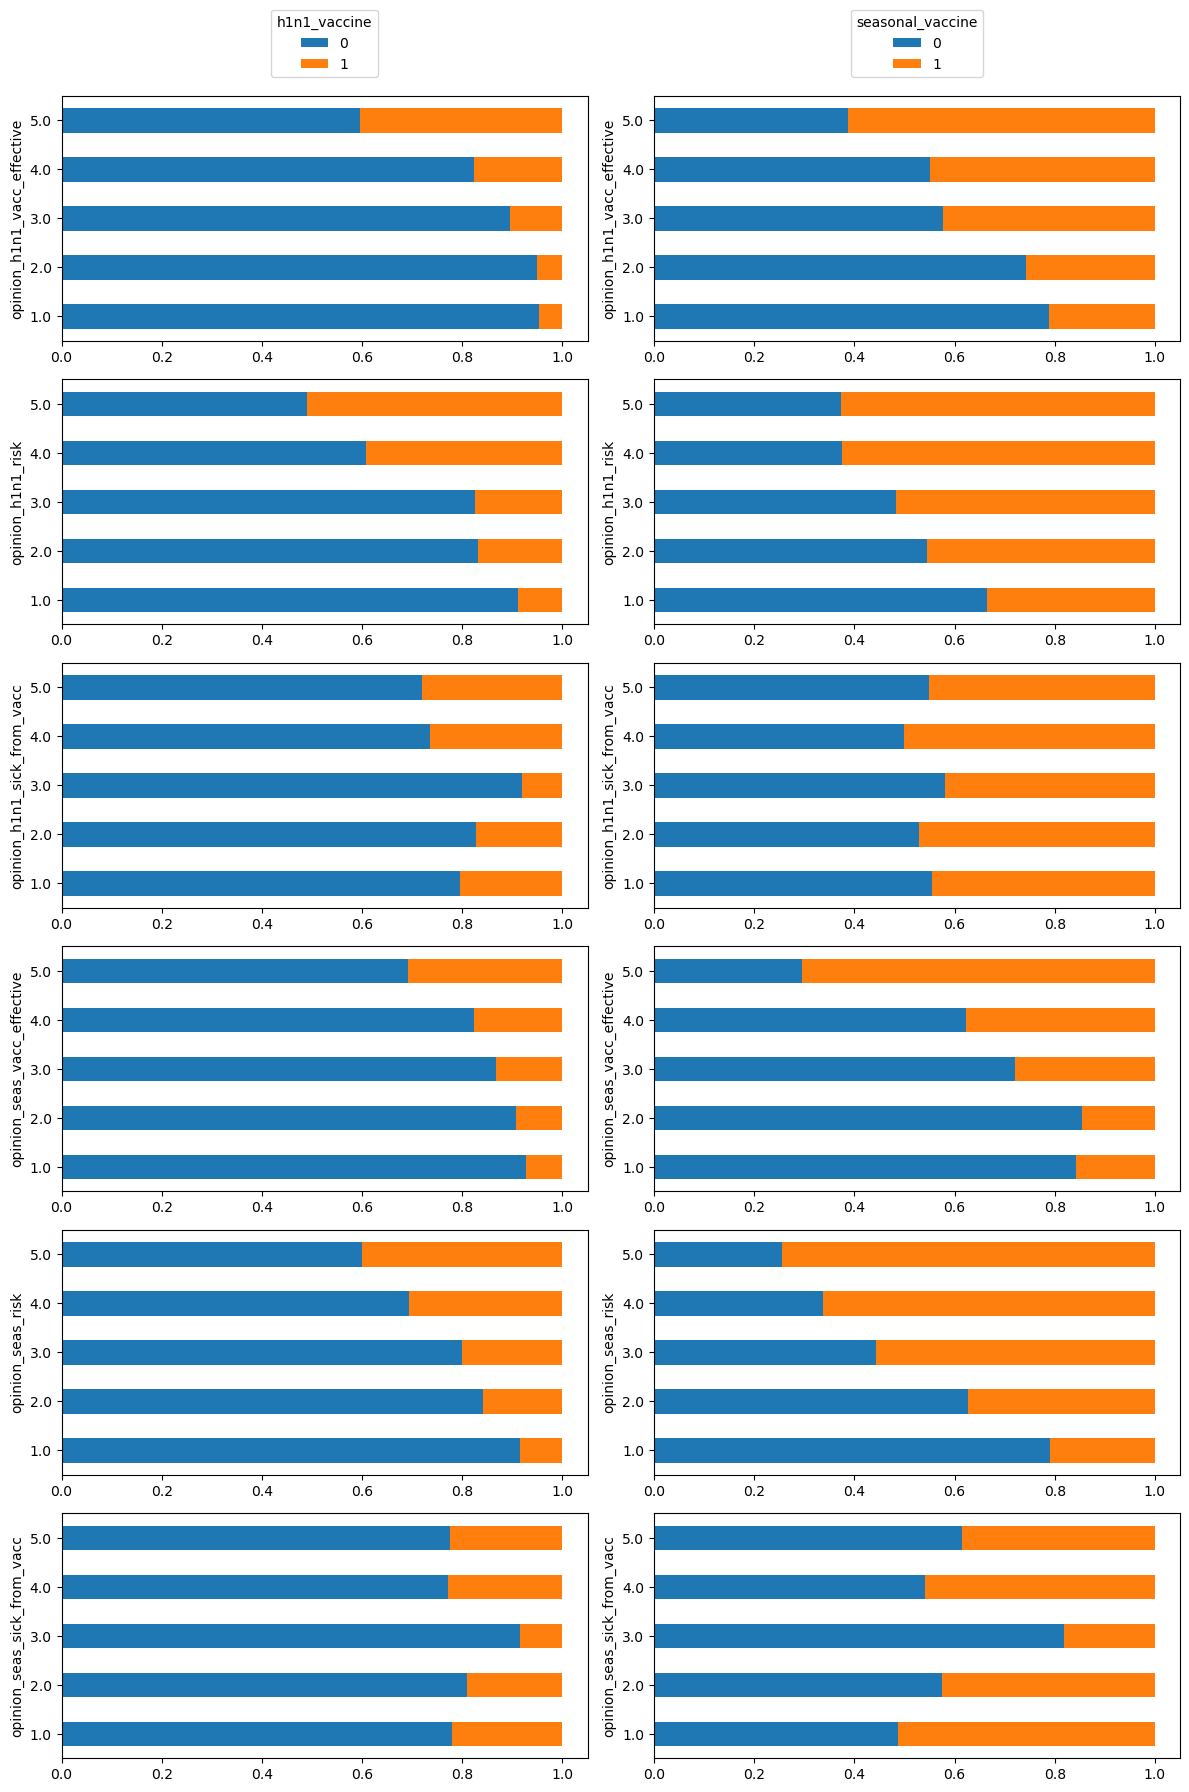

In [ ]:
choose_figure_plot(list(df_raw.columns)[15:21])

### Personal Condition (Categorized)

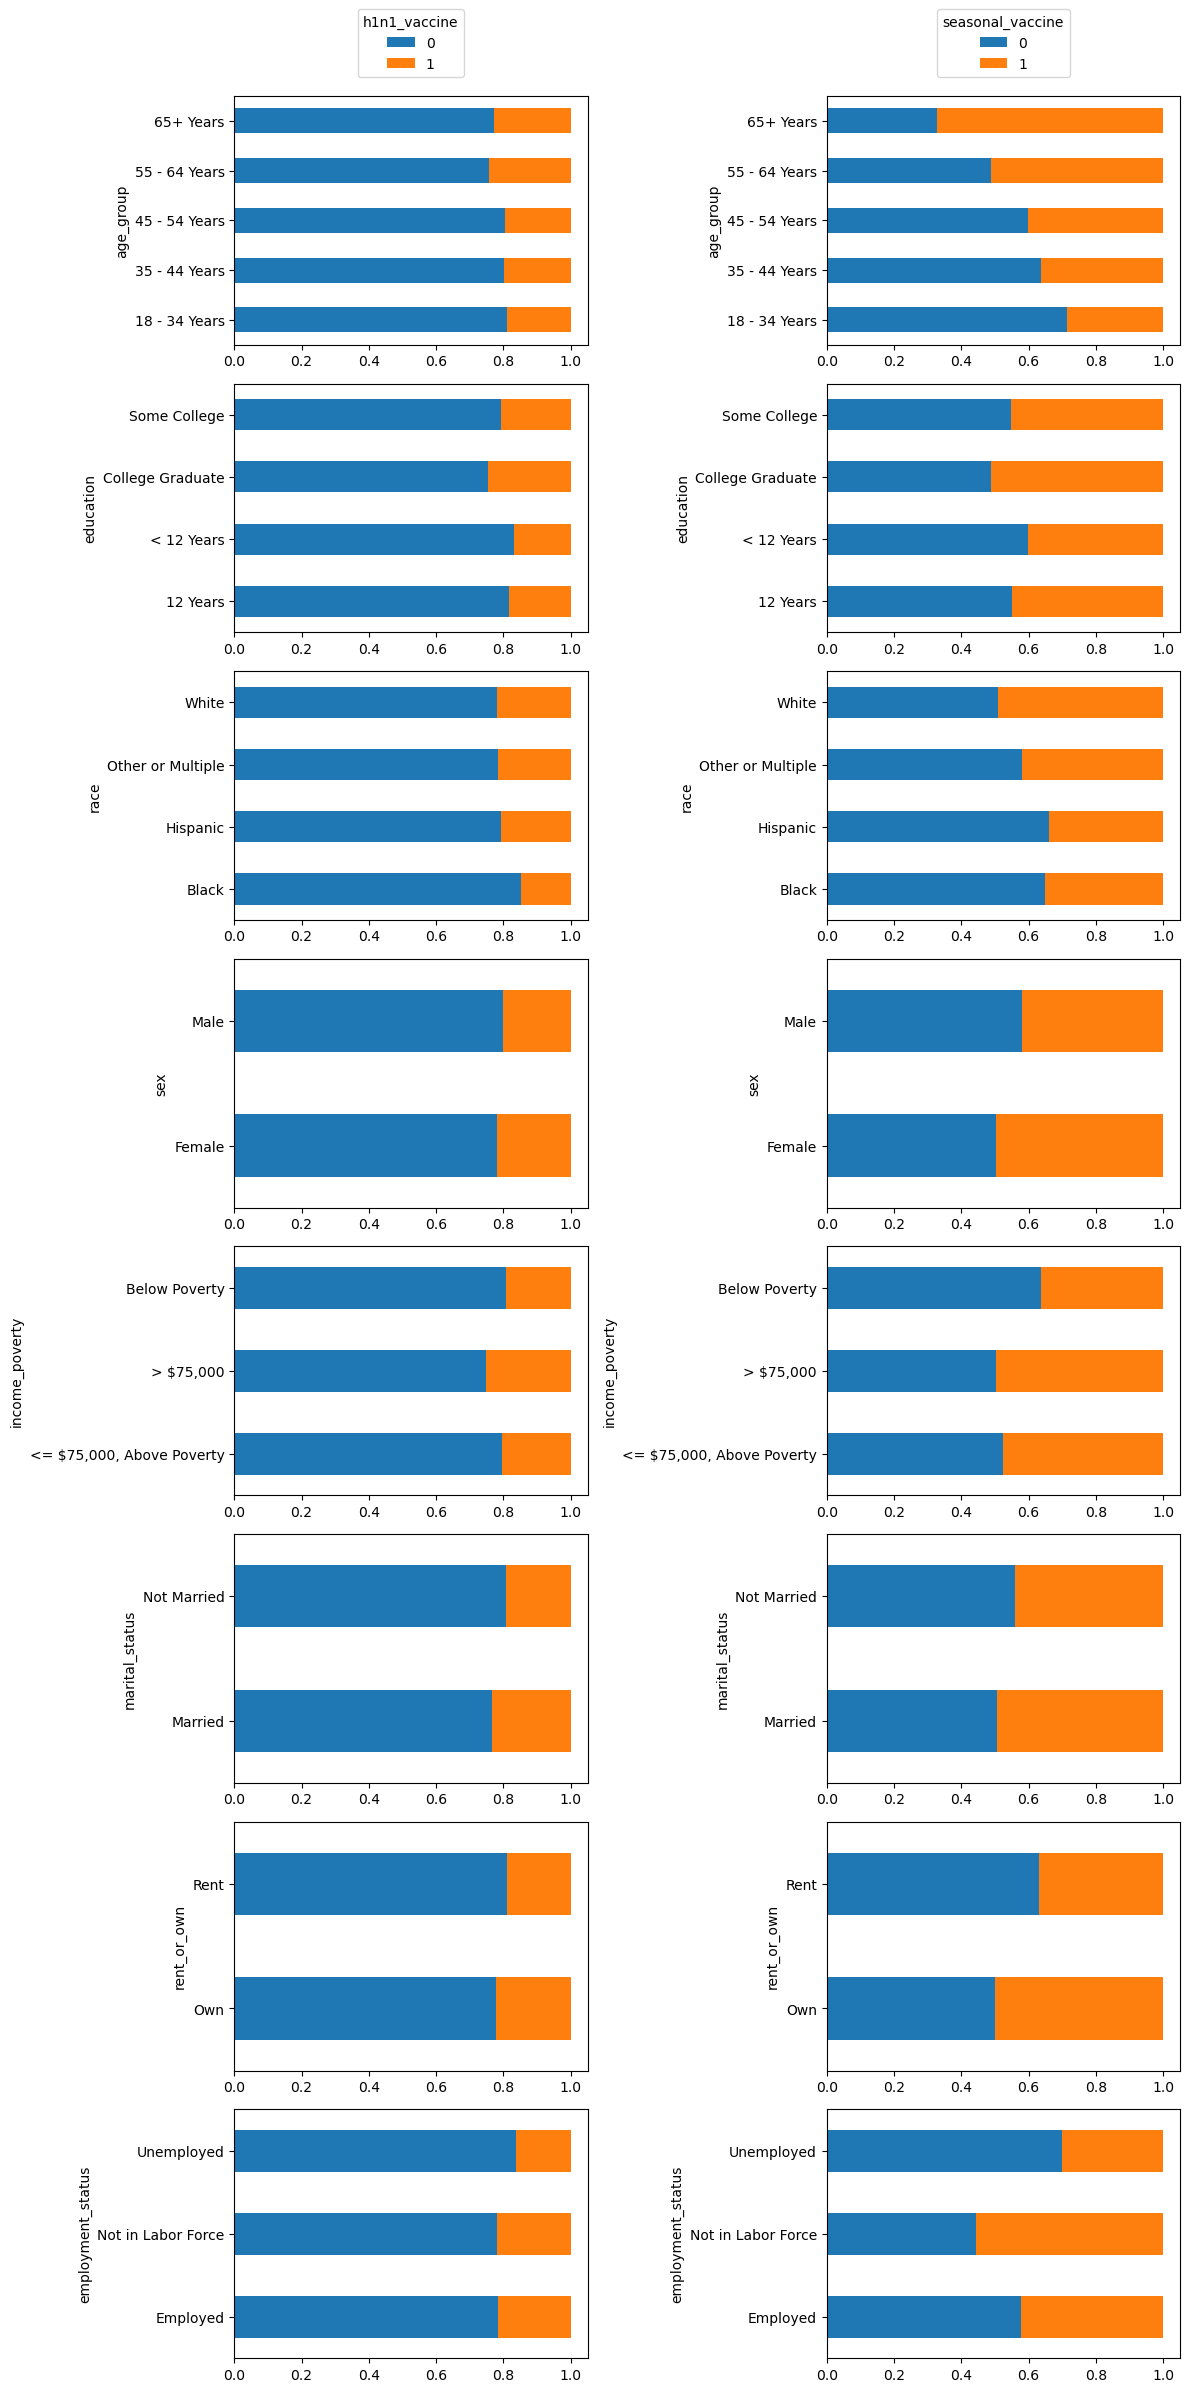

In [ ]:
choose_figure_plot(list(df_raw.columns)[21:29])

### Region of Accommodation

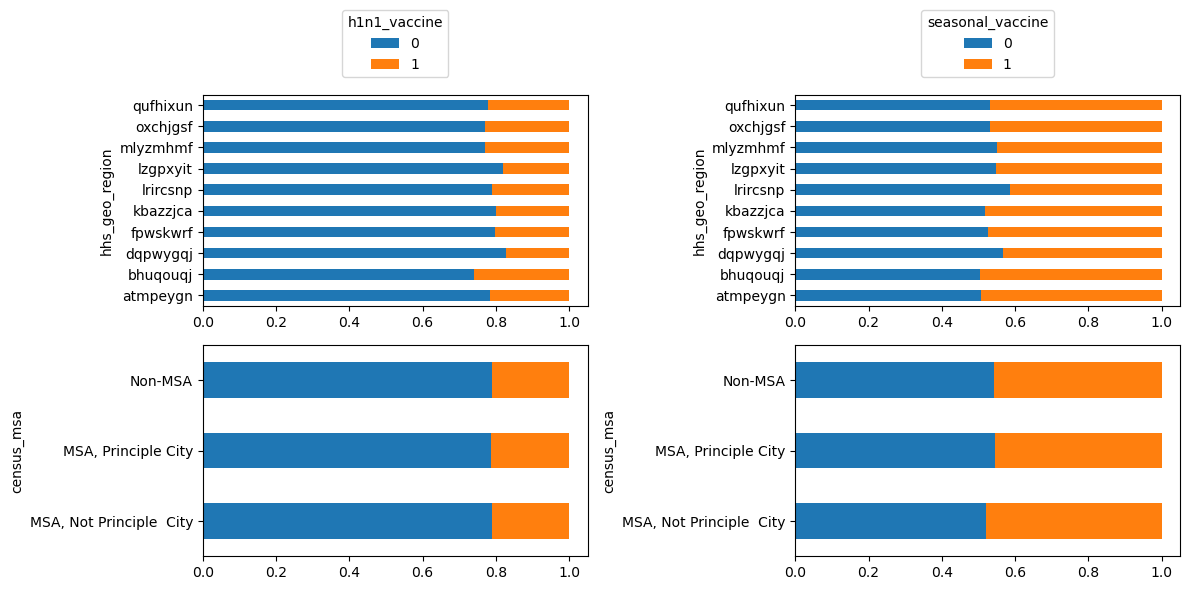

In [ ]:
choose_figure_plot(list(df_raw.columns)[29:31])

By observing the figures, we found that **census_mas** is useless

### Household Condition

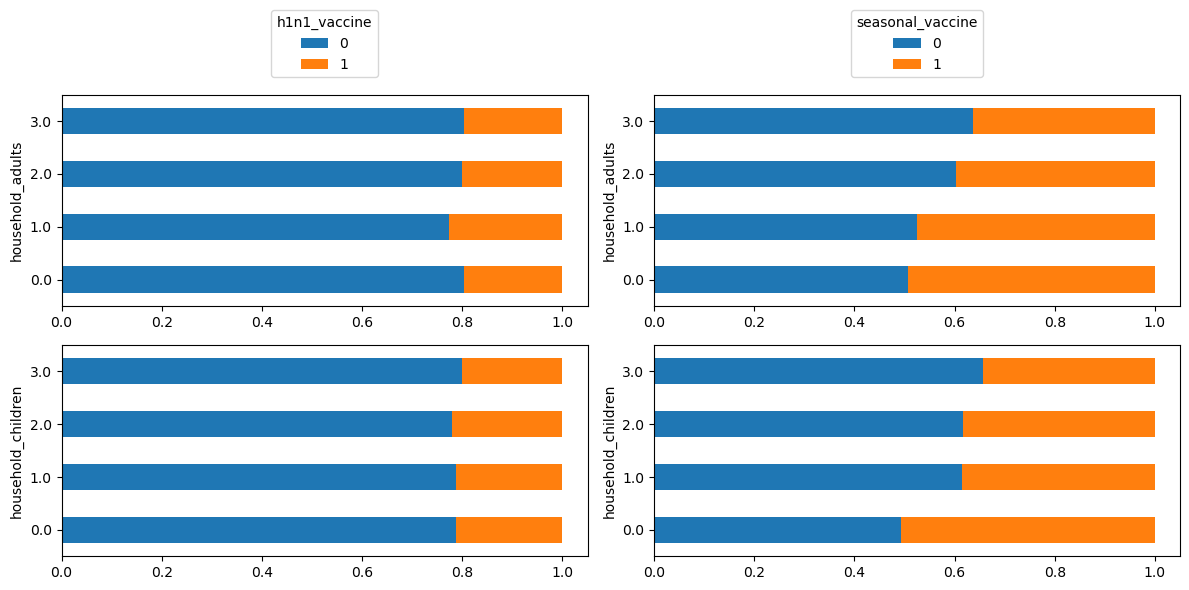

In [ ]:
choose_figure_plot(list(df_raw.columns)[31:33])

### Others

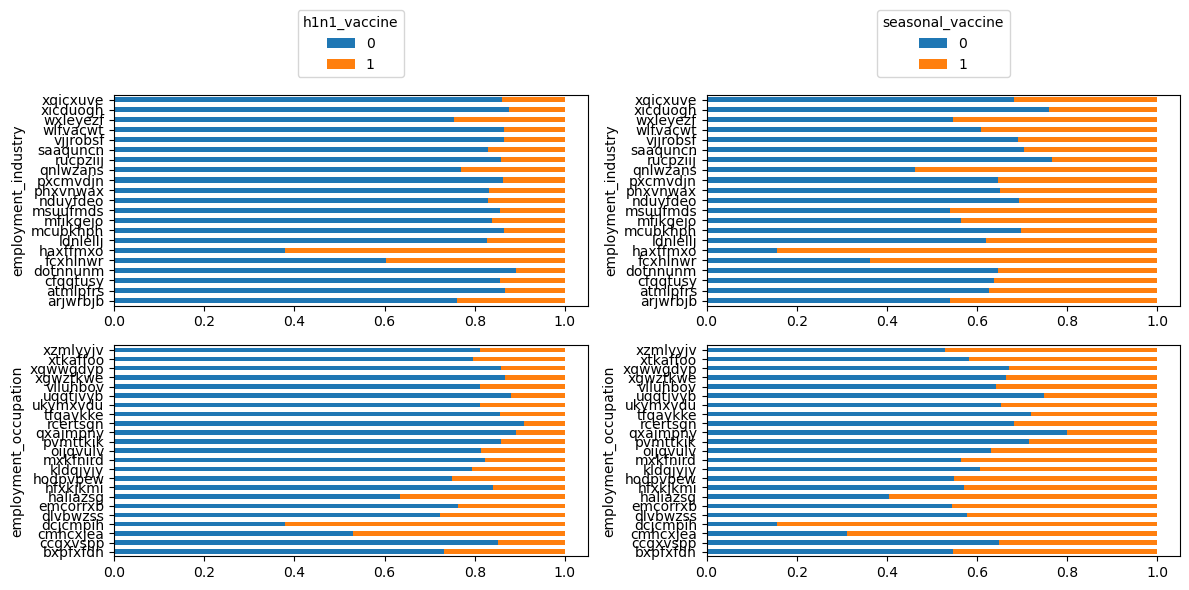

In [ ]:
choose_figure_plot(list(df_raw.columns)[33:35])

## Generate  a HeatMap

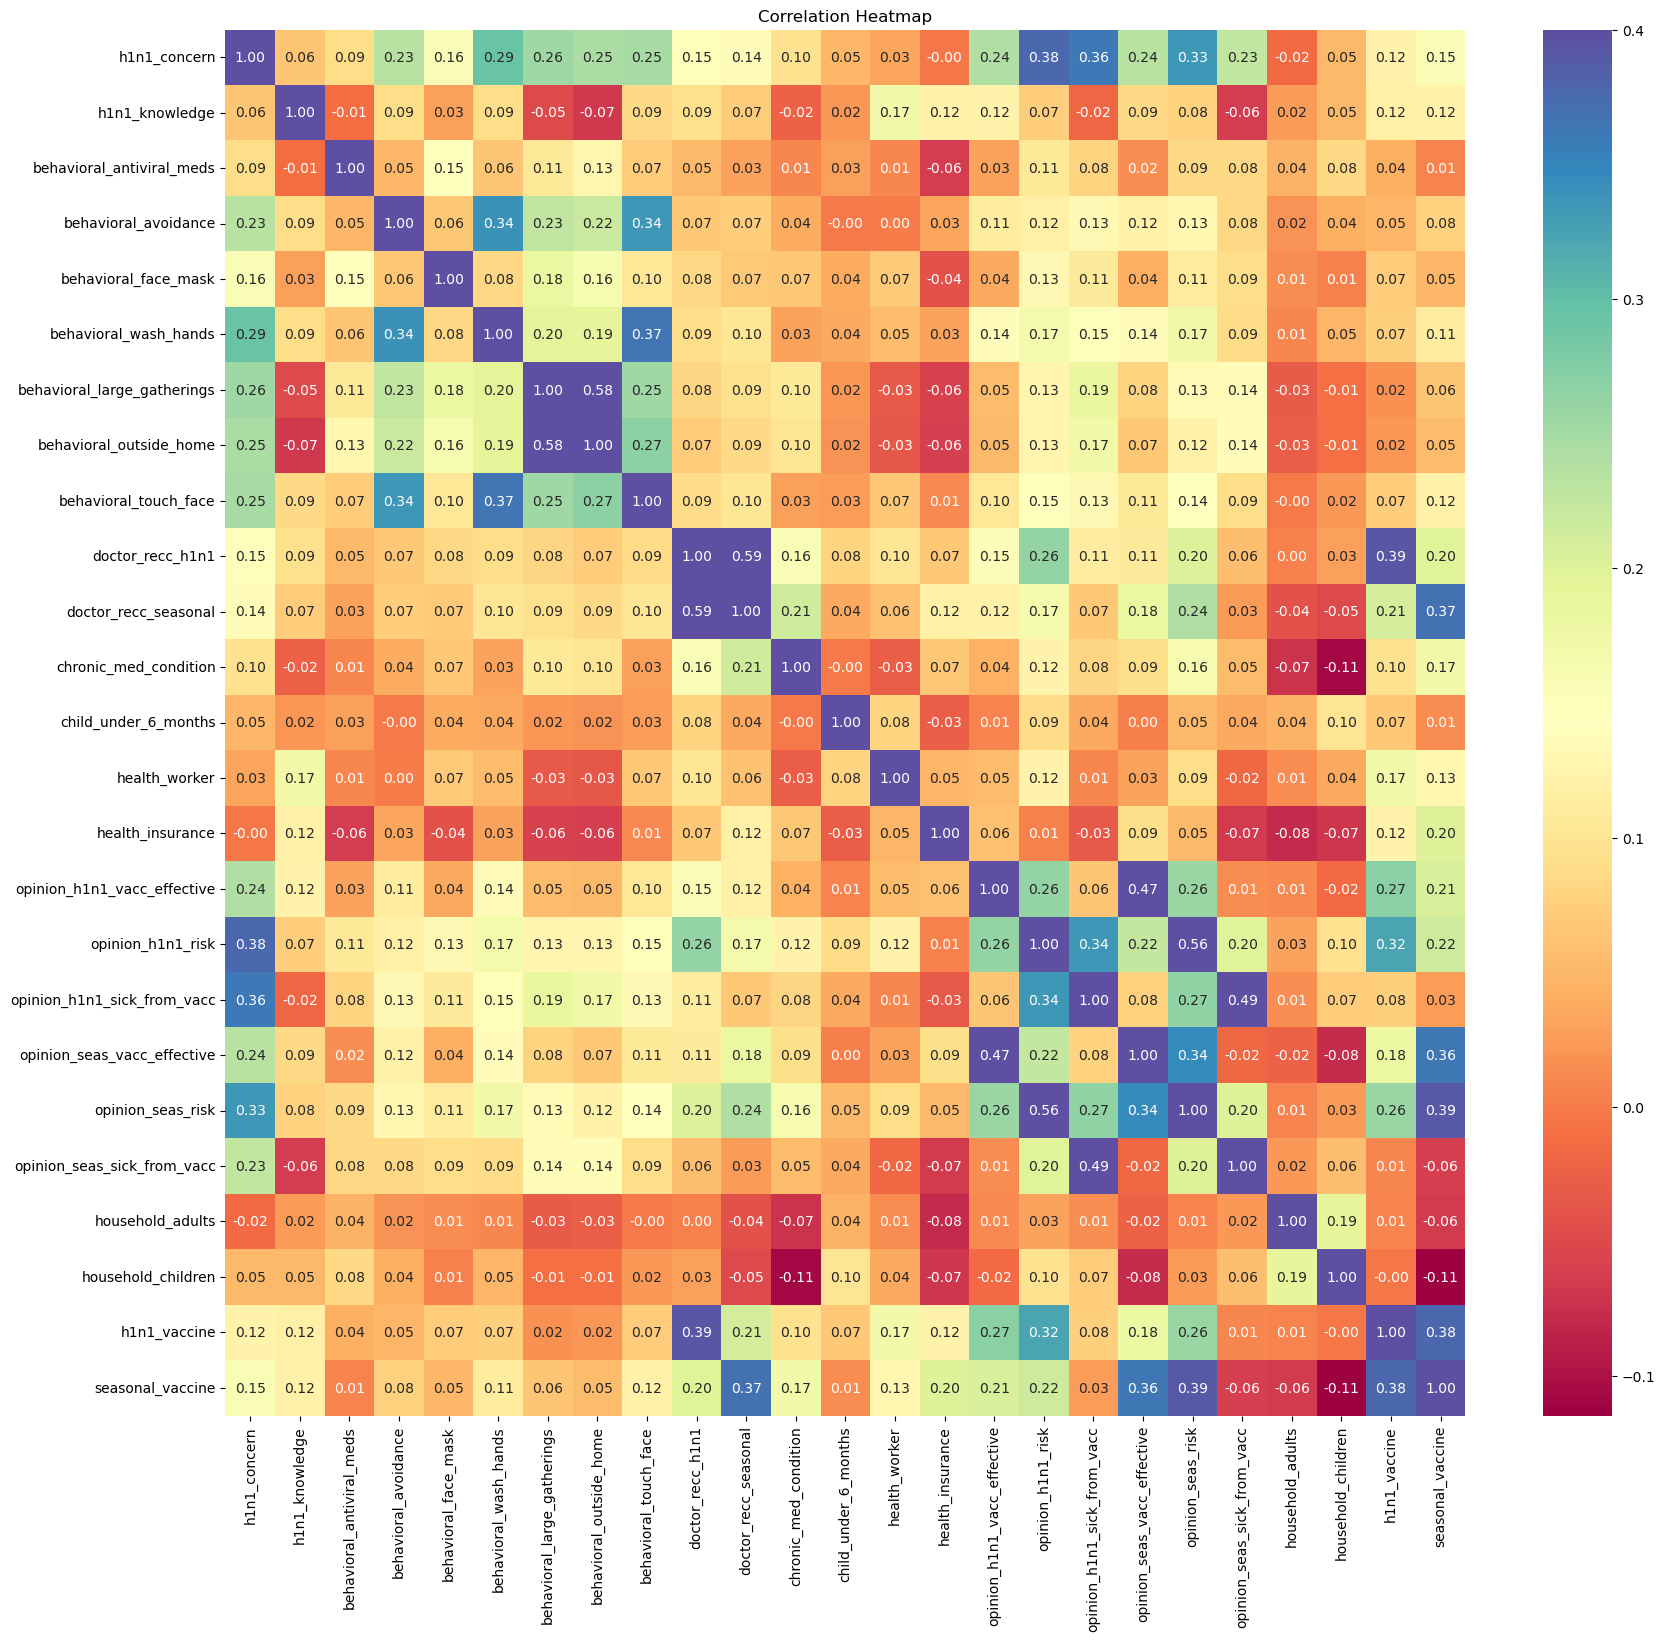

In [ ]:
corr_matrix = df_raw.corr()

plt.figure(figsize=(20, 18)) 
sns.heatmap(corr_matrix, vmax=.4, annot=True, fmt=".2f", cmap="Spectral")  
plt.title("Correlation Heatmap") 
plt.show() 

## Generate the EDA report

In [ ]:
# !pip install pandas_profiling

In [ ]:
# import pandas_profiling as pf
# raw_profile = pf.ProfileReport(df_raw, title='Profiling Report', html={'style':{'full_width':True}})
# raw_profile.to_notebook_iframe()

From the generated results and the basic information of the dataset, we can conclude that some features no need to focus on:
* **household_children** : no positive correlations
* **household_adults** : no positive correlations
* **census_msa** : no positive correlations
* **hhs_geo_region** : no positive crellations
* **health_worker** : high related with **employment_industry**, can be deleted
* **behavioral_antiviral_meds** : too much values are 0
* **behavioral_face_mask** : too much values are 0
* **children_under_6_months** : too much values are 0
* **health_insurance** : too much missing values
* **employment_industry** : too much missing values
* **employment_occupation** : too much missing values

> Note: all the features mentioned above will not be used to predict and we do not want to explore more

# Anaysis

## Ctagorized values

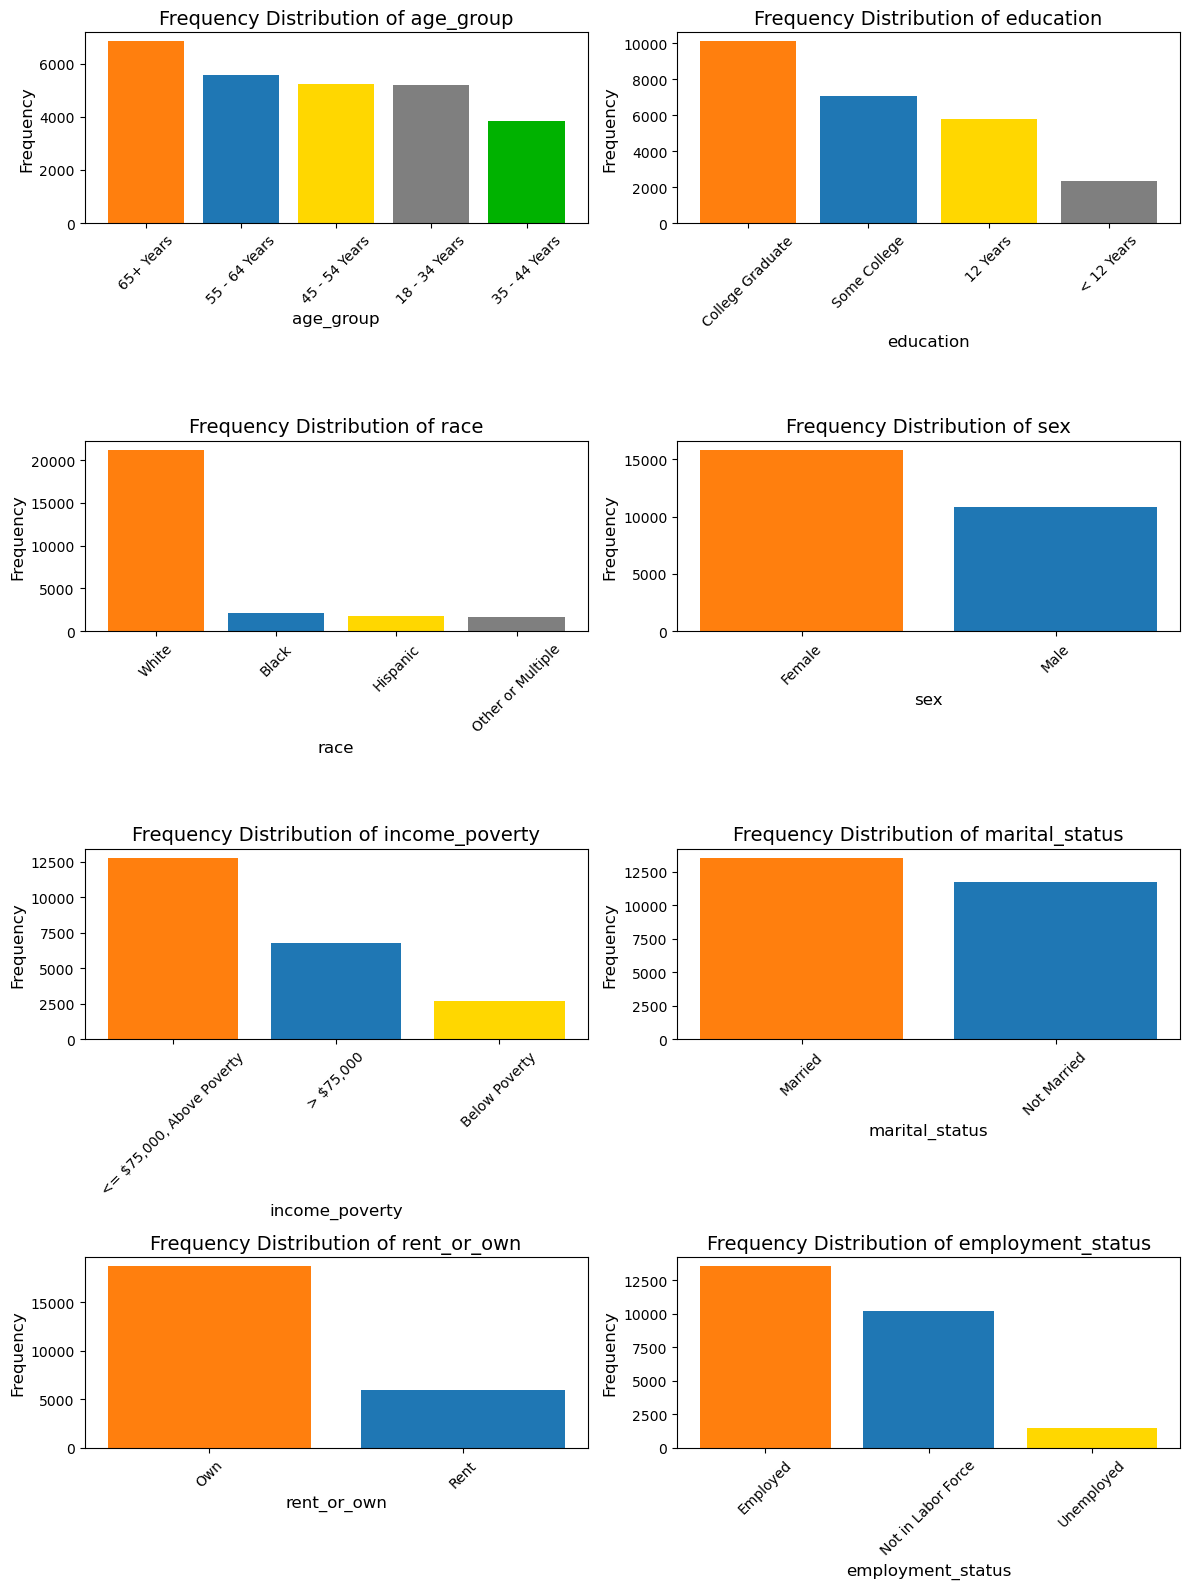

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Define a list of non-numerical features
non_numerical_features = ['age_group','education', 'race', 'sex','income_poverty', 'marital_status', 'rent_or_own', 'employment_status']

# Calculate the number of rows and columns for the subplots
num_plots = len(non_numerical_features)
num_rows = (num_plots + 1) // 2
num_cols = 2

# Set up the subplots with larger figsize
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 16))

# Define a list of colors for each category
colors = ['#FF7F0E', '#1F77B4', '#FFD700', '#7F7F7F', '#00B200']

# Perform univariate analysis for each non-numerical feature
for i, feature in enumerate(non_numerical_features):
    # Calculate the frequency distribution of categories
    category_counts = df_raw[feature].value_counts()
    
    # Determine the subplot index
    subplot_row = i // num_cols
    subplot_col = i % num_cols
    
    # Plot a bar chart in the appropriate subplot
    axes[subplot_row, subplot_col].bar(category_counts.index, category_counts.values, color=colors[:len(category_counts)])
    
    # Set subplot title and labels
    axes[subplot_row, subplot_col].set_title(f'Frequency Distribution of {feature}', fontsize=14)
    axes[subplot_row, subplot_col].set_xlabel(feature, fontsize=12)
    axes[subplot_row, subplot_col].set_ylabel('Frequency', fontsize=12)
    
    # Rotate x-axis labels if needed
    axes[subplot_row, subplot_col].tick_params(axis='x', rotation=45)
    
# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


### Bivariate Analysis

#### Age Group

This correlation analysis build up a foundation for preprocessing:
>The logic we consider fill in the missing value of one feature based on another feature:
>
>
>
>

Fill in the missing value of **education** based on **age group**

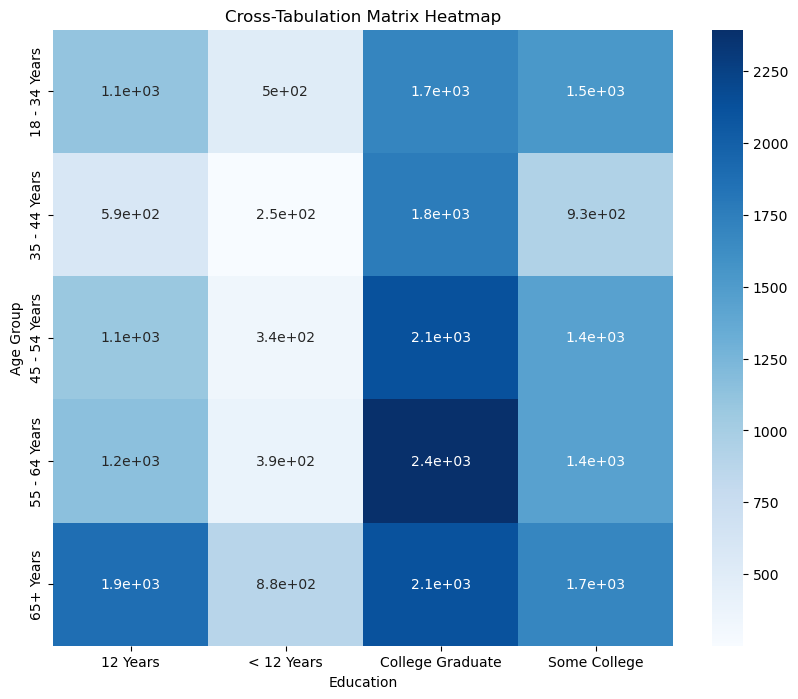

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Define the list of categorical features
categorical_features = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status']

# Create a cross-tabulation matrix
cross_tab = pd.crosstab(index=df_raw['age_group'], columns=df_raw['education'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='Blues')
plt.title('Cross-Tabulation Matrix Heatmap')
plt.xlabel('Education')
plt.ylabel('Age Group')
plt.show()


* Generally, a relation trend for each age group and education level is College > Some College > 12 years > (<12 years)
* It is clearly that in each age stage the College Gruaduate has the highest correlation.
* We can consider fill any education level missing value based on the highest correlated education stage of each age group shown in the heatmap.

Fill in the missing value of **employment_status** based on **education**

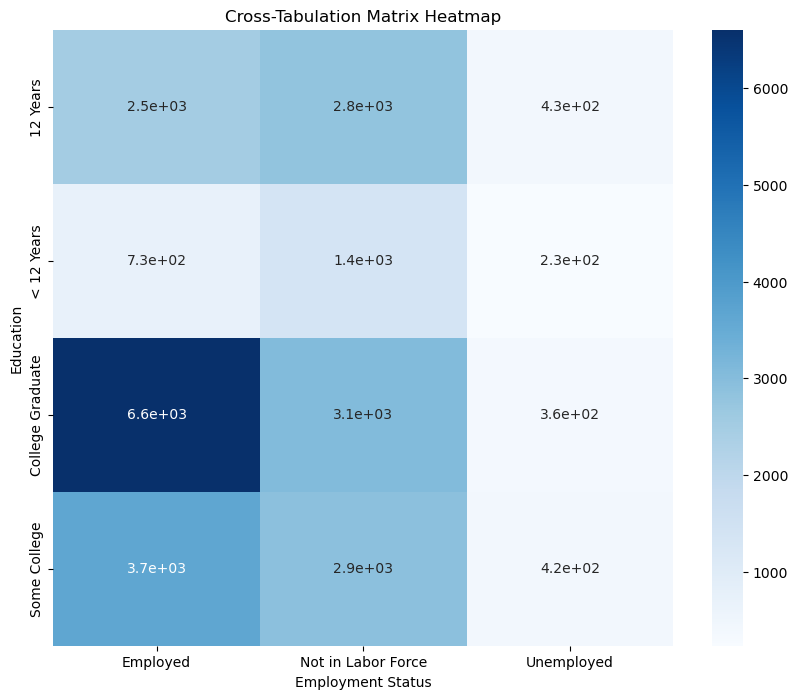

In [ ]:
# Define the list of categorical features
categorical_features = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status']

# Create a cross-tabulation matrix
cross_tab = pd.crosstab(index=df_raw['education'], columns=df_raw['employment_status'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='Blues')
plt.title('Cross-Tabulation Matrix Heatmap')
plt.xlabel('Employment Status')
plt.ylabel('Education')
plt.show()


For the missing values in **employment_status** observing their **education** value, if:
* 12 Years --> Not in Labor Force
* < 12 Years --> Not in Labor Force
* College Graduate --> Employed
* Some College --> Employed

Fill in the missing value of **income_poverty** based on **employment_status**

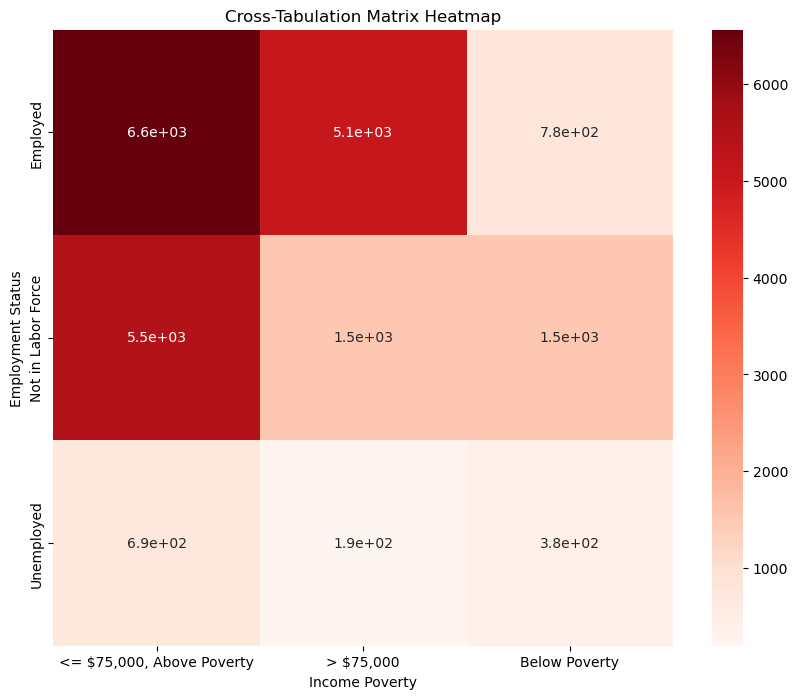

In [ ]:
# Define the list of categorical features
categorical_features = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status']

# Create a cross-tabulation matrix
cross_tab = pd.crosstab(index=df_raw['employment_status'], columns=df_raw['income_poverty'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='Reds')
plt.title('Cross-Tabulation Matrix Heatmap')
plt.xlabel('Income Poverty')
plt.ylabel('Employment Status')
plt.show()

For the missing values in **income_poverty** observing their **employment_status** value, all can be filled with <= $75,000, Above Poverty



Fill in the missing value of **rent_or_own** based on **income_poverty**

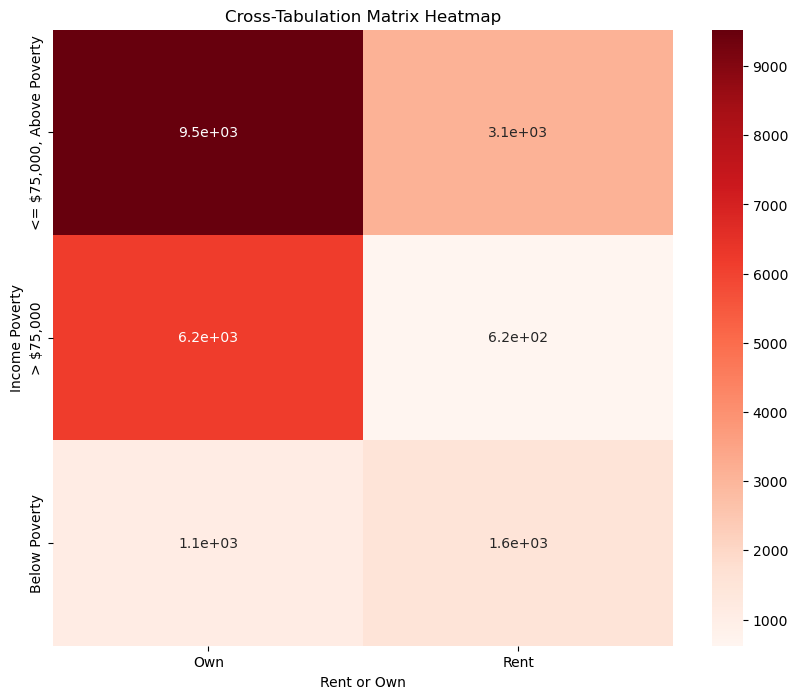

In [ ]:
# Define the list of categorical features
categorical_features = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status']

# Create a cross-tabulation matrix
cross_tab = pd.crosstab(index=df_raw['income_poverty'], columns=df_raw['rent_or_own'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='Reds')
plt.title('Cross-Tabulation Matrix Heatmap')
plt.xlabel('Rent or Own')
plt.ylabel('Income Poverty')
plt.show()

For the missing values in **rent_or_own** observing their **income poverty** value, if:
* Below Poverty --> Rent
* (>$75,000) --> Own
* <= $75,000, Above Poverty --> Own

## Numerical Features

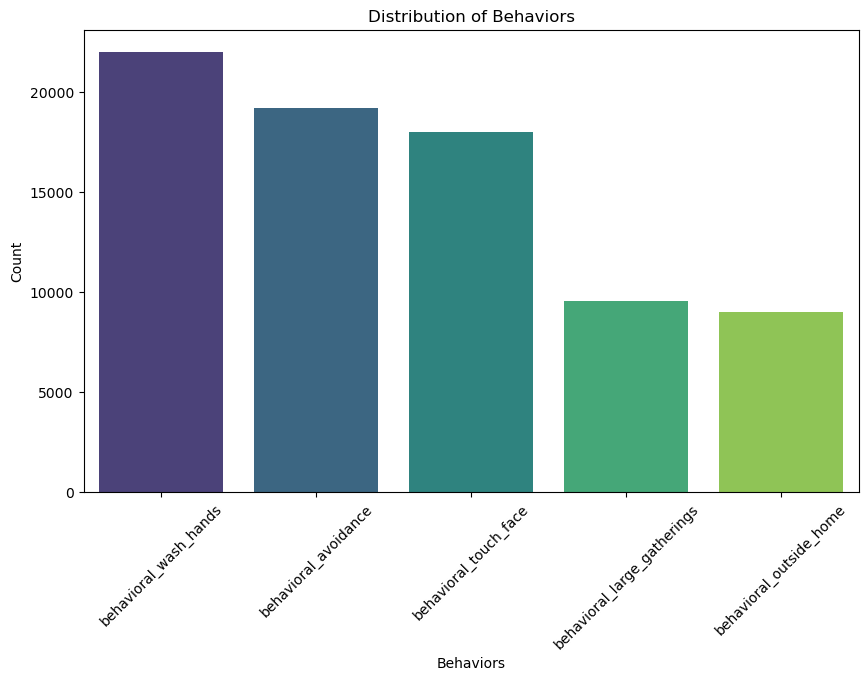

In [ ]:

# Select the relevant columns for the plot
behaviors = ['behavioral_avoidance', 
             'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home',
             'behavioral_touch_face']

# Calculate the proportions for each behavior category
behavior_counts = df_raw[behaviors].sum().sort_values(ascending=False)

# Create the stacked bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=behavior_counts.index, y=behavior_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Behaviors')
plt.ylabel('Count')
plt.title('Distribution of Behaviors')
plt.show()


**behavioral_antiviral_meds** and **behavioral_face_mask** are very **imbalance** features, which contain too much 0 and we do not want to take them into consideration to predict (mentioned in above sections)

### Feature Grouping and Data Fusion

### A.Grouping Behavioral Features

> We want to combine the behavior features into ONE feature to make the prediction. To do this, we need to generate a formuler like this :
>
>> ***behavior = behavioral_feature_1 * weight1 +  ... + behavioral_feature_n * weight_n***
>
> Because we predict the results seperately, so this process has to be done seperately. 

#### *protection behaviour: H1N1*

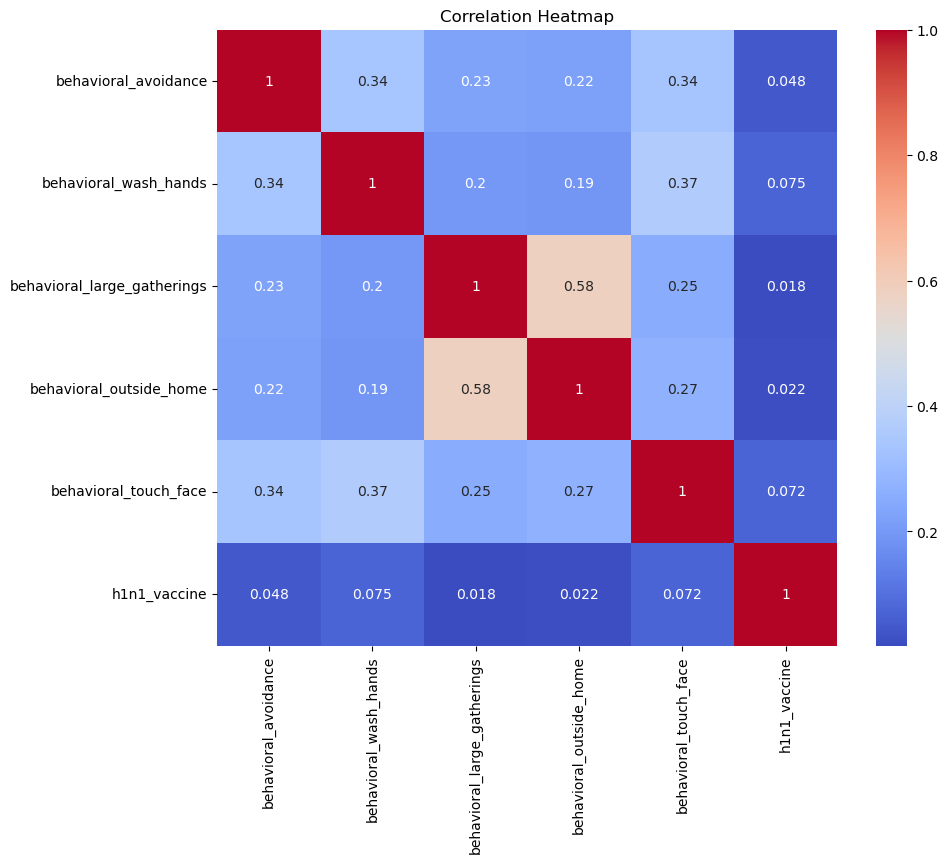

In [ ]:
# Calculate the correlation matrix between features and h1n1_vaccine 
correlation_matrix = df_raw[[ 'behavioral_avoidance', 
                            'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home',
                            'behavioral_touch_face', 'h1n1_vaccine']].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


It can be observed that touching face and washing hands should have a higher correlation, which means the higher impact on result.

By obseving the heatmap, the weight for behavioral weights can be calculted:
>
* 0.2 0.32 0.08 0.09 0.31

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

# Split the dataset 
X_behavior = df_raw[[ 'behavioral_avoidance', 
                            'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home',
                            'behavioral_touch_face']]
y_h1h1 = df_raw['h1n1_vaccine']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_behavior, y_h1h1, test_size=0.2, random_state=42)


# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Choose a decision tree-based model (Random Forest)
model = RandomForestClassifier(random_state=42)

# Fit the model
model.fit(X_train_imputed, y_train)

# Extract the feature importances from the model
feature_importances = model.feature_importances_

# Normalize the feature importances to sum up to 1
weights_h1n1 = feature_importances / np.sum(feature_importances)

# Print the weights
print("Feature Weights:", weights_h1n1)


Feature Weights: [0.16275966 0.2790204  0.10922904 0.13721911 0.31177179]


In [ ]:
# Round the weights to two decimal places
round_weights_h1n1 = [round(weight, 2) for weight in weights_h1n1]

# Print the rounded weights
print("Rounded Weights:", round_weights_h1n1)


Rounded Weights: [0.16, 0.28, 0.11, 0.14, 0.31]


Use both method to generate one group of weights

In [ ]:
# Define the feature weights from different methods
rf_feature_weights = np.array([0.2 ,0.32, 0.08, 0.09, 0.31])
heatmap_feature_weights = np.array([0.16, 0.28, 0.11, 0.14, 0.31])

# Define the weights assigned to each method
rf_weight = 0.5  # Weight for random forest feature weights
heatmap_weight = 0.5  # Weight for heatmap feature weights

# Calculate the combined feature weights
combined_feature_weights_h = (rf_weight * rf_feature_weights) + (heatmap_weight * heatmap_feature_weights)

# Normalize the combined weights to ensure they add up to 1
combined_feature_weights_h /= np.sum(combined_feature_weights_h)

print("Combined Feature Weights:", combined_feature_weights_h)

Combined Feature Weights: [0.18  0.3   0.095 0.115 0.31 ]


>  for h1n1 vaccine, The formula to group of the protection behavior should be:
>>***protection_h1n1 = behavioral_avoidance * 0.18 + behavioral_wash_hands * 0.3 +   behavioral_large_gatherings * 0.095 + behavioral_outside_home * 0.115 + behavioral_touch_face * 0.31***

#### *protection behaviour: SEASONAL*

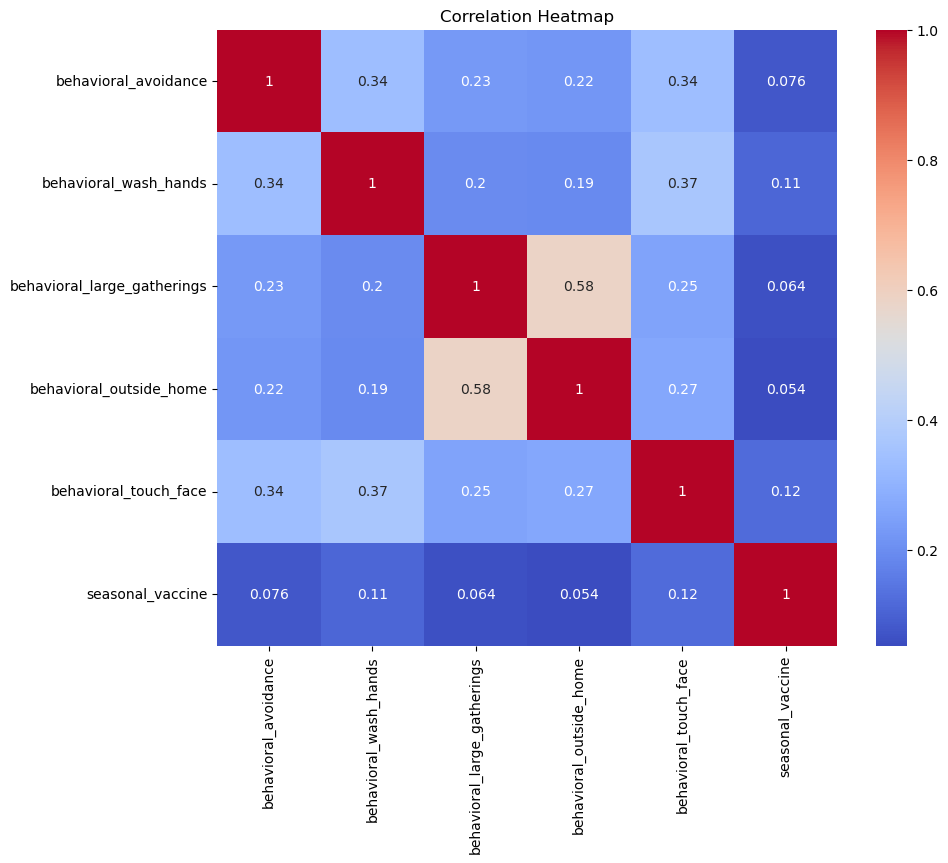

In [ ]:
# Calculate the correlation matrix between features and h1n1_vaccine 
correlation_matrix = df_raw[[ 'behavioral_avoidance', 
                            'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home',
                            'behavioral_touch_face', 'seasonal_vaccine']].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


It can be observed that touching face and washing hands should have a higher correlation, which means the higher impact on result.

By obseving the heatmap, the weight for behavioral weights can be calculted:
>
* 0.18 0.26 0.15 0.13 0.28

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

# Split the dataset into features (X) and target variable (y)
X_behavior = df_raw[[ 'behavioral_avoidance', 
                            'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home',
                            'behavioral_touch_face']]
y_seas = df_raw['seasonal_vaccine']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_behavior, y_seas, test_size=0.2, random_state=42)


# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Choose a decision tree-based model (Random Forest)
model = RandomForestClassifier(random_state=42)

# Fit the model
model.fit(X_train_imputed, y_train)

# Extract the feature importances from the model
feature_importances = model.feature_importances_

# Normalize the feature importances to sum up to 1
weights_seas = feature_importances / np.sum(feature_importances)

# Print the weights
print("Feature Weights:", weights_seas)


Feature Weights: [0.13612955 0.31638812 0.1084025  0.08495057 0.35412926]


In [ ]:
# Round the weights to two decimal places
round_weights_seas = [round(weight, 2) for weight in weights_seas]

# Print the rounded weights
print("Rounded Weights:", round_weights_seas)


Rounded Weights: [0.14, 0.32, 0.11, 0.08, 0.35]


Use both method to generate one group of weights

In [ ]:
# Define the feature weights from different methods
rf_feature_weights = np.array([0.14, 0.32, 0.11, 0.08, 0.35])
heatmap_feature_weights = np.array([0.18, 0.26, 0.15, 0.13, 0.28])

# Define the weights assigned to each method
rf_weight = 0.5  # Weight for random forest feature weights
heatmap_weight = 0.5  # Weight for heatmap feature weights

# Calculate the combined feature weights
combined_feature_weights_s = (rf_weight * rf_feature_weights) + (heatmap_weight * heatmap_feature_weights)

# Normalize the combined weights to ensure they add up to 1
combined_feature_weights_s /= np.sum(combined_feature_weights_s)

print("Combined Feature Weights:", combined_feature_weights_s)

Combined Feature Weights: [0.16  0.29  0.13  0.105 0.315]


>  for seasonal flu, The formula to group of the protection behavior should be:
>>***protection_seas = behavioral_avoidance * 0.16 + behavioral_wash_hands * 0.29 +   behavioral_large_gatherings * 0.13 + behavioral_outside_home * 0.105 + behavioral_touch_face * 0.315***

#### Creating 4 new features 'protection_h1n1', 'exposure_h1n1' , 'protection_seas' , 'exposure_seas'

In [ ]:
!pip install --upgrade seaborn

     -------------------------------------- 293.3/293.3 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


>  for h1n1 flu, The formula to group of the protection behavior should be:
>>***protection_h1n1 = behavioral_avoidance * 0.18 + behavioral_wash_hands * 0.3 +   behavioral_large_gatherings * 0.095 + behavioral_outside_home * 0.115 + behavioral_touch_face * 0.31***

>  for seasonal flu, The formula to group of the protection behavior should be:
>>***protection_seas = behavioral_avoidance * 0.16 + behavioral_wash_hands * 0.29 +   behavioral_large_gatherings * 0.13 + behavioral_outside_home * 0.105 + behavioral_touch_face * 0.315***

In [ ]:
df_raw['protection_h1n1'] =  round( df_raw['behavioral_avoidance']  * 0.18 + df_raw['behavioral_wash_hands'] * 0.3 +  df_raw['behavioral_large_gatherings']  * 0.095  +  df_raw['behavioral_outside_home']  * 0.115 + df_raw['behavioral_touch_face'] * 0.31,3)
df_raw['protection_seas'] =  round( df_raw['behavioral_avoidance']  * 0.16 + df_raw['behavioral_wash_hands'] * 0.29 +  df_raw['behavioral_large_gatherings']  * 0.13  +  df_raw['behavioral_outside_home']  * 0.105 + df_raw['behavioral_touch_face'] * 0.315 ,3)

In [ ]:
df_raw['protection_h1n1']

respondent_id
0        0.425
1        0.905
2        0.180
3        0.575
4        0.885
         ...  
26702    0.295
26703    0.480
26704    0.885
26705      NaN
26706    0.180
Name: protection_h1n1, Length: 26707, dtype: float64

In [ ]:
df_raw['protection_seas']

respondent_id
0        0.420
1        0.870
2        0.160
3        0.580
4        0.895
         ...  
26702    0.265
26703    0.450
26704    0.895
26705      NaN
26706    0.160
Name: protection_seas, Length: 26707, dtype: float64

##### Distribution for the new featues

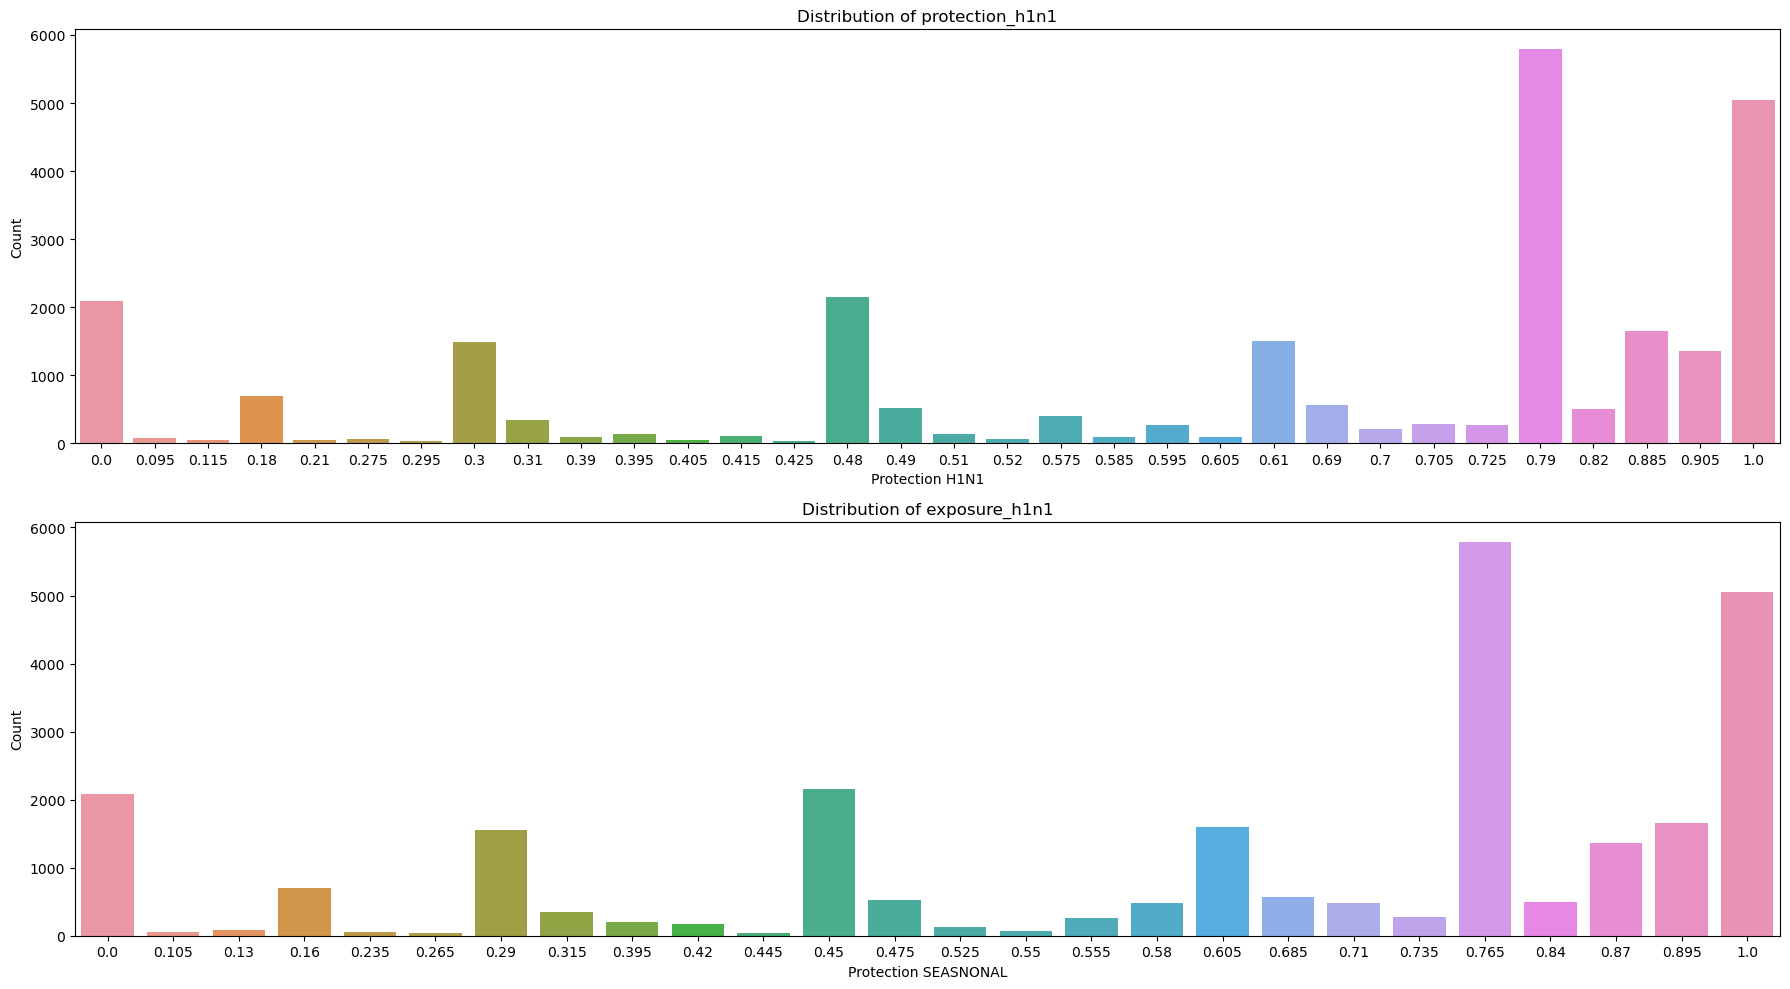

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['protection_h1n1', 'protection_seas']

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(18, 10))

# Plot distribution of protection_h1n1
sns.countplot(x='protection_h1n1', data=df_raw, ax=axes[0])
axes[0].set_title('Distribution of protection_h1n1')
axes[0].set_xlabel('Protection H1N1')
axes[0].set_ylabel('Count')

# Plot distribution of exposure_h1n1
sns.countplot(x='protection_seas', data=df_raw, ax=axes[1])
axes[1].set_title('Distribution of exposure_h1n1')
axes[1].set_xlabel('Protection SEASNONAL')
axes[1].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



##### Check the correlation after data fusion

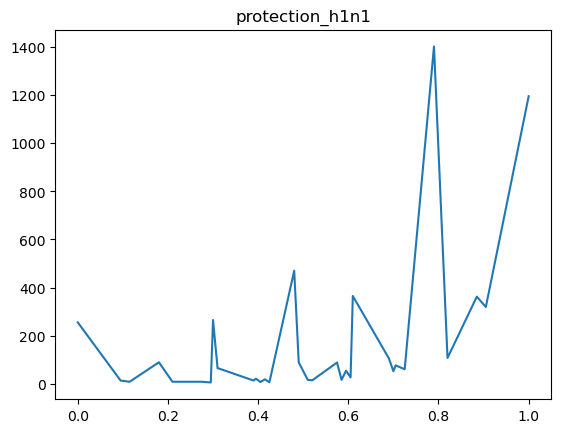

In [ ]:
df_h1n1_features_p = df_raw[df_raw["h1n1_vaccine"] == 1].groupby(df_raw['protection_h1n1']).sum()
plt.title('protection_h1n1')
plt.plot(df_h1n1_features_p['h1n1_vaccine'])
plt.show()

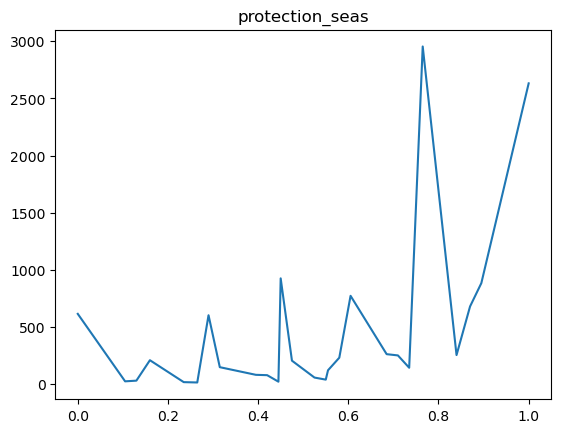

In [ ]:
df_h1n1_features_e = df_raw[df_raw["seasonal_vaccine"] == 1].groupby(df_raw['protection_seas']).sum()
plt.title('protection_seas')
plt.plot(df_h1n1_features_e['seasonal_vaccine'])
plt.show()

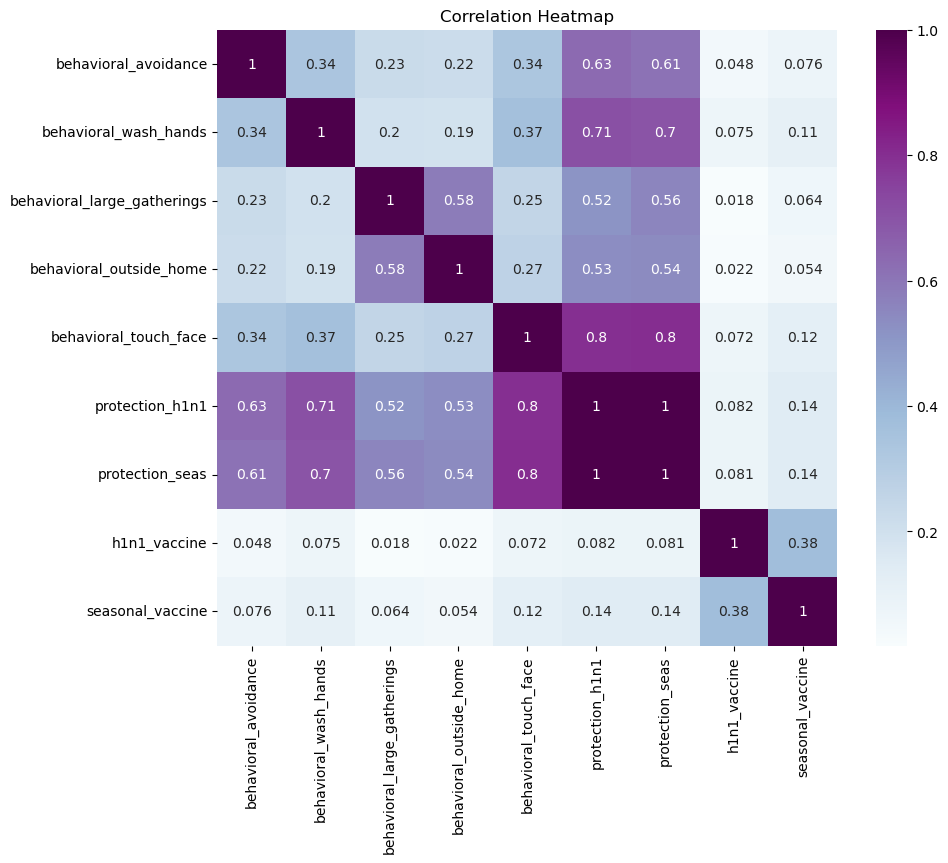

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_raw[['behavioral_avoidance', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'protection_h1n1', 'protection_seas', 'h1n1_vaccine','seasonal_vaccine']].corr()

# Plot a heatmap of the correlation matrix with a different colormap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu')
plt.title('Correlation Heatmap')
plt.show()

After data fusion, the correlation coefficient has been improved to 
>
* 0.81 for h1n1 using the combined behavior feature
> 
* 0.14 for seasonal using the combined behavior featurea

### B. Grouping Opinion Features

In [ ]:
df_raw[['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc']]

opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
respondent_id                                                   
0                                      3.0                1.0   
1                                      5.0                4.0   
2                                      3.0                1.0   
3                                      3.0                3.0   
4                                      3.0                3.0   
...                                    ...                ...   
26702                                  3.0                1.0   
26703                                  4.0                2.0   
26704                                  4.0                4.0   
26705                                  3.0                1.0   
26706                                  5.0                1.0   

               opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
respondent_id                                                             
0                                      2.0                          2.0   
1                                      4.0                          4.0   
2                                      1.0                          4.0   
3                                      5.0                          5.0   
4                                      2.0                          3.0   
...                                    ...                          ...   
26702                                  1.0                          5.0   
26703                                  2.0                          5.0   
26704                                  2.0                          5.0   
26705                                  2.0                          2.0   
26706                                  1.0                          5.0   

               opinion_seas_risk  opinion_seas_sick_from_vacc  
respondent_id                                                  
0                            1.0                          2.0  
1                            2.0                          4.0  
2                            1.0                          2.0  
3                            4.0                          1.0  
4                            1.0                          4.0  
...                          ...                          ...  
26702                        2.0                          2.0  
26703                        1.0                          1.0  
26704                        4.0                          2.0  
26705                        1.0                          2.0  
26706                        1.0                          1.0  

[26707 rows x 6 columns]

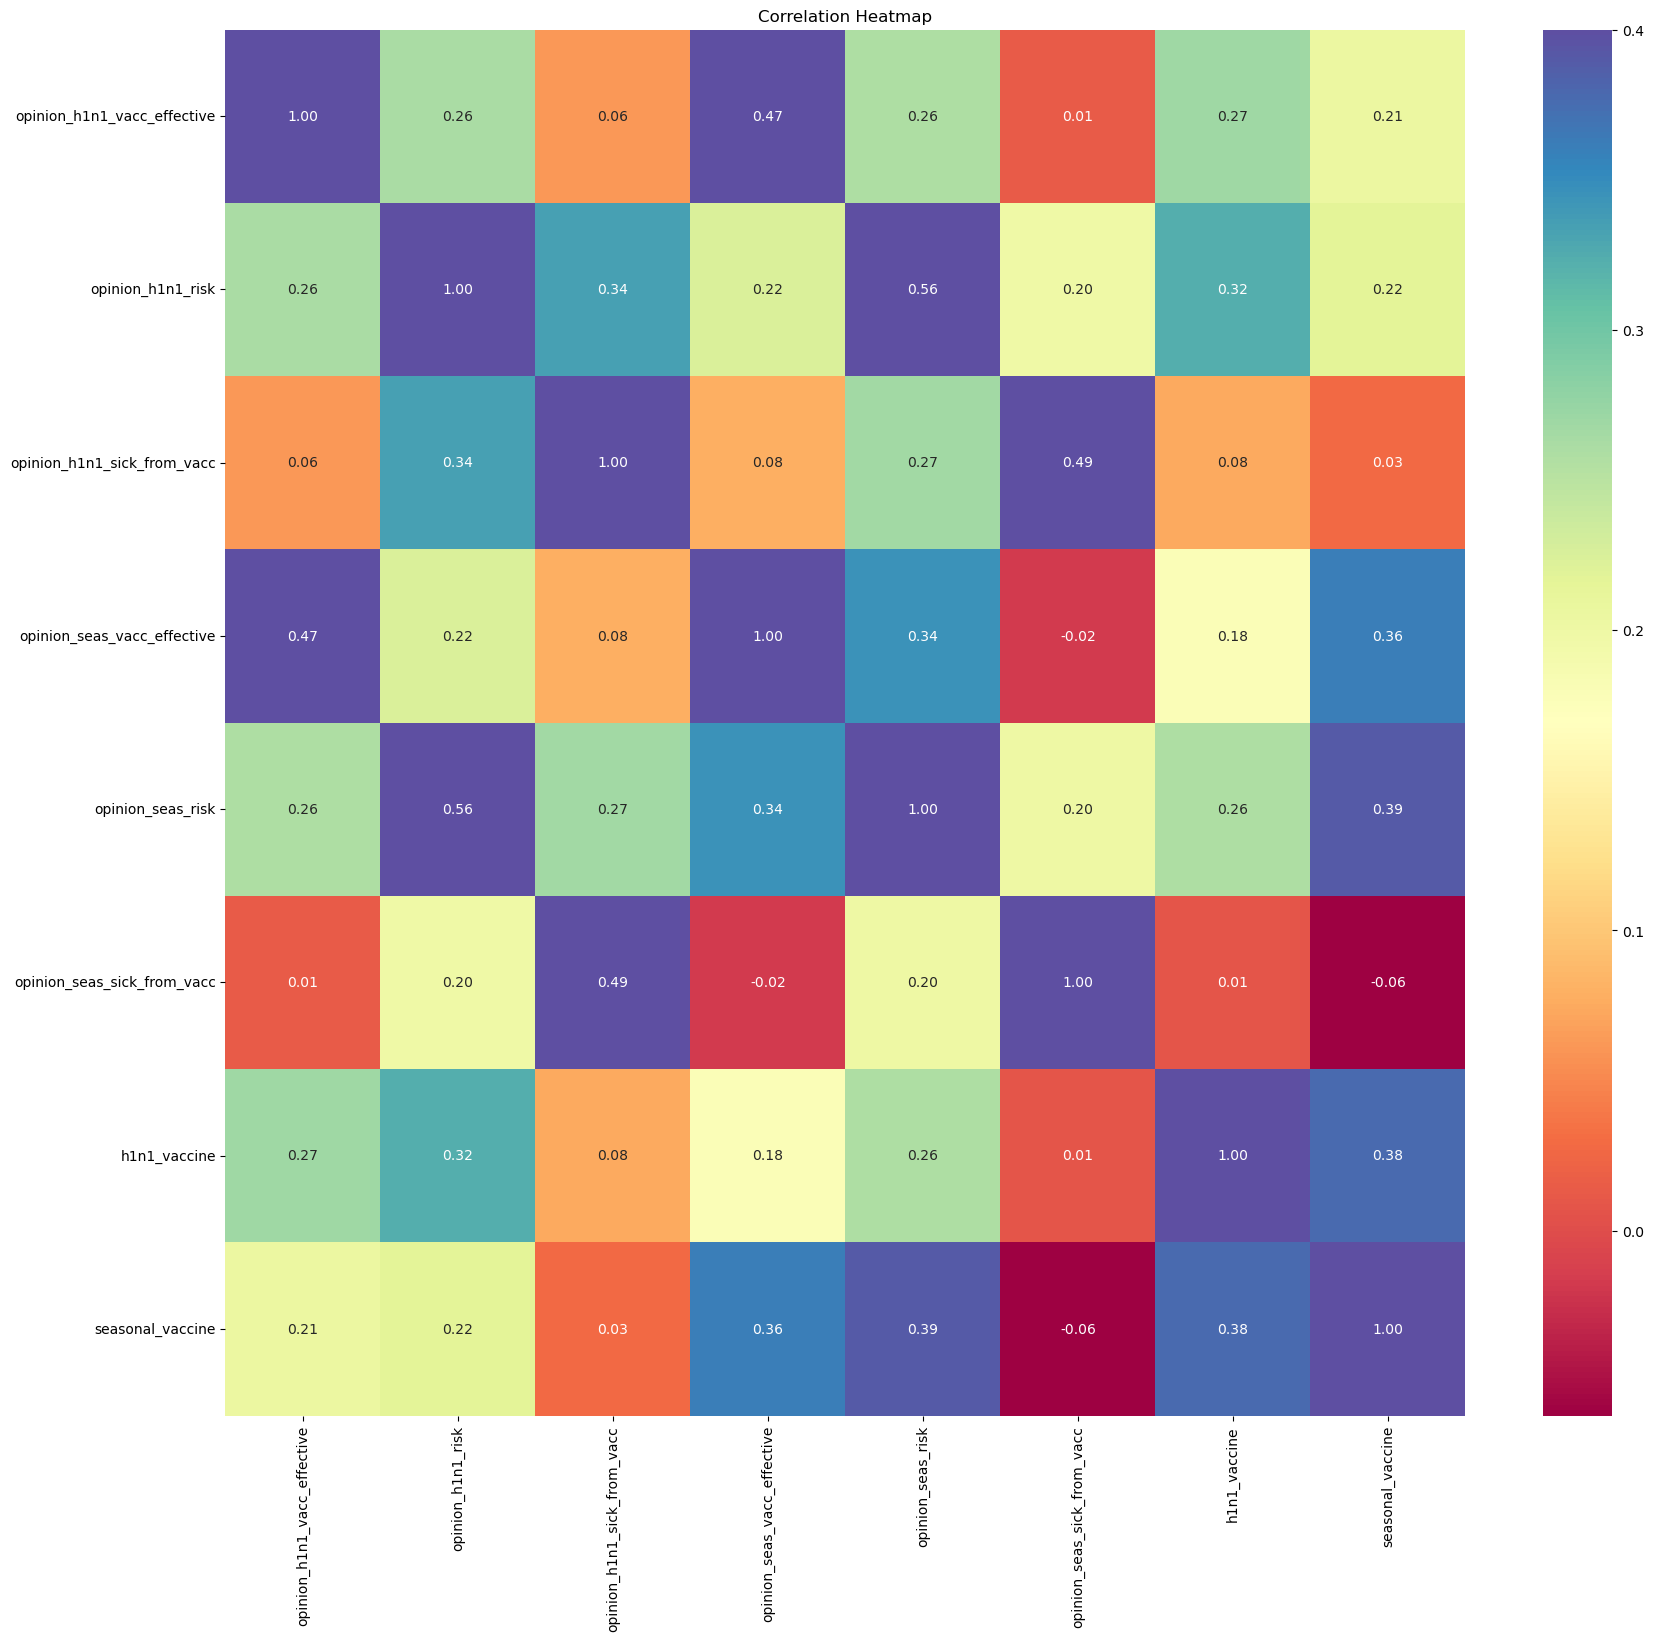

In [ ]:
corr_matrix = df_raw[['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'h1n1_vaccine', 'seasonal_vaccine']].corr()

plt.figure(figsize=(20, 18))  # size setting
sns.heatmap(corr_matrix, vmax=.4, annot=True, fmt=".2f", cmap="Spectral")  
plt.title("Correlation Heatmap")  # Title
plt.show()  

In [ ]:
corr_ohve_hv = round(corr_matrix.iloc[0,6],2)
corr_ohr_hv = round(corr_matrix.iloc[1,6],2)
corr_ohsfv_hv = round(corr_matrix.iloc[2,6],2)

# corr_ohve_hv
# corr_ohr_hv 
# corr_ohsfv_hv 

In [ ]:
corr_ohve_hv_weight = round(corr_ohve_hv / (corr_ohve_hv + corr_ohr_hv + corr_ohsfv_hv),2)
corr_ohr_hv_weight = round(corr_ohr_hv / (corr_ohve_hv + corr_ohr_hv + corr_ohsfv_hv),2)
corr_ohsfv_hv_weight = round(corr_ohsfv_hv / (corr_ohve_hv + corr_ohr_hv + corr_ohsfv_hv),2)

#corr_ohve_hv_weight
# corr_ohr_hv_weight
# corr_ohsfv_hv_weight

In [ ]:
df_raw['opinion_h1n1'] = df_raw['opinion_h1n1_vacc_effective']*corr_ohve_hv_weight + df_raw['opinion_h1n1_risk']*corr_ohr_hv_weight - df_raw['opinion_h1n1_sick_from_vacc']*corr_ohsfv_hv_weight
df_raw['opinion_h1n1']

respondent_id
0        1.44
1        3.44
2        1.56
3        2.04
4        2.40
         ... 
26702    1.56
26703    2.32
26704    3.28
26705    1.44
26706    2.36
Name: opinion_h1n1, Length: 26707, dtype: float64

In [ ]:
corr_ohve_sv = round(corr_matrix.iloc[3,7],2)
corr_ohr_sv = round(corr_matrix.iloc[4,7],2)
corr_ohsfv_sv = round(corr_matrix.iloc[5,7],2)

# corr_ohve_sv
# corr_ohr_sv 
# corr_ohsfv_sv

In [ ]:
corr_ohve_sv_weight = round(corr_ohve_sv / (corr_ohve_sv + corr_ohr_sv + corr_ohsfv_sv),2) 
corr_ohr_sv_weight = round(corr_ohr_sv / (corr_ohve_sv + corr_ohr_sv + corr_ohsfv_sv),2)
corr_ohsfv_sv_weight = round(corr_ohsfv_sv / (corr_ohve_sv + corr_ohr_sv + corr_ohsfv_sv),2)

# corr_ohve_sv_weight 
# corr_ohr_sv_weight
# corr_ohsfv_sv_weight

In [ ]:
df_raw['opinion_seas'] = round(df_raw['opinion_seas_vacc_effective']*corr_ohve_sv_weight + df_raw['opinion_seas_risk']*corr_ohr_sv_weight - df_raw['opinion_seas_sick_from_vacc']*corr_ohsfv_sv_weight,2)
df_raw['opinion_seas']

respondent_id
0        1.79
1        3.58
2        2.83
3        4.97
4        2.49
         ... 
26702    3.92
26703    3.26
26704    5.06
26705    1.79
26706    3.26
Name: opinion_seas, Length: 26707, dtype: float64

(array([ 189.,  929., 1683., 3360., 5104., 6360., 3480., 2642., 1659.,
         769.]),
 array([0.28, 0.68, 1.08, 1.48, 1.88, 2.28, 2.68, 3.08, 3.48, 3.88, 4.28]),
 <BarContainer object of 10 artists>)

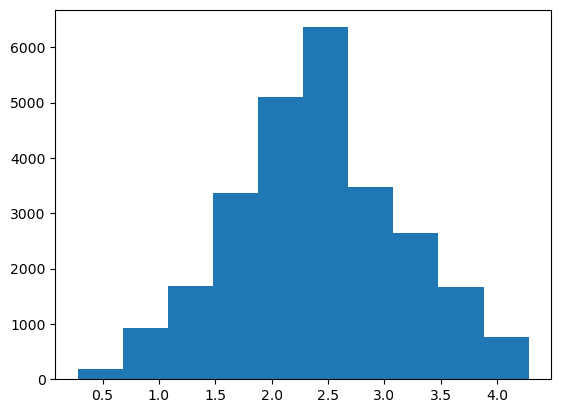

In [ ]:
plt.hist(df_raw['opinion_h1n1'], bins=10)

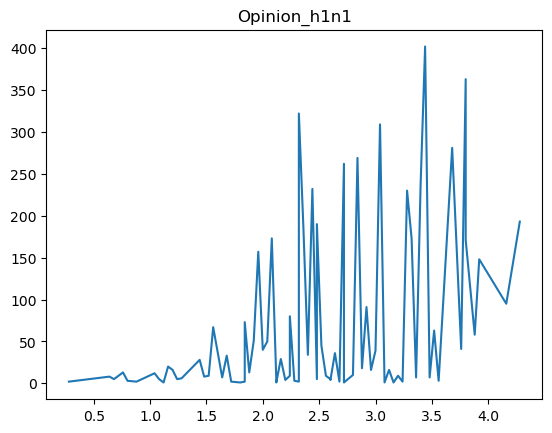

In [ ]:
df = df_raw[df_raw["h1n1_vaccine"] == 1].groupby(df_raw['opinion_h1n1']).sum()
plt.title('Opinion_h1n1')
plt.plot(df['h1n1_vaccine'])
plt.show()

(array([ 779., 1104., 1404., 2843., 5777., 3510., 1672., 2357., 4568.,
        2086.]),
 array([1.18 , 1.652, 2.124, 2.596, 3.068, 3.54 , 4.012, 4.484, 4.956,
        5.428, 5.9  ]),
 <BarContainer object of 10 artists>)

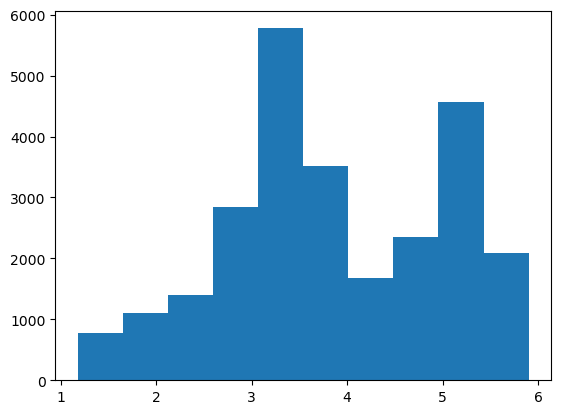

In [ ]:
plt.hist(df_raw['opinion_seas'], bins=10)

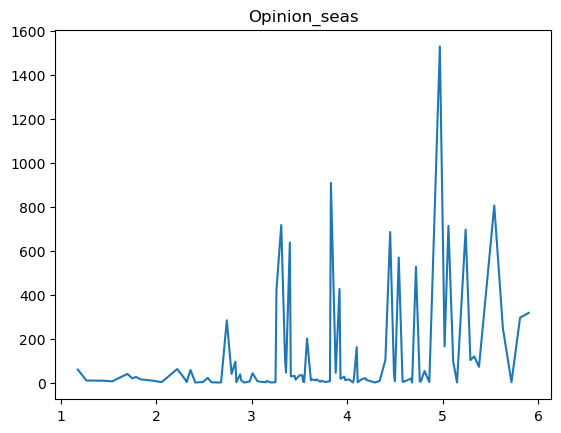

In [ ]:
df = df_raw[df_raw["seasonal_vaccine"] == 1].groupby(df_raw['opinion_seas']).sum()
plt.title('Opinion_seas')
plt.plot(df['seasonal_vaccine'])
plt.show()

In [ ]:
# Put this step on the back
# delete fused features
# df_raw.drop(['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc'], axis=1, inplace=True)

In [ ]:
# show all features
df_raw

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
0                       1.0             0.0                        0.0   
1                       3.0             2.0                        0.0   
2                       1.0             1.0                        0.0   
3                       1.0             1.0                        0.0   
4                       2.0             1.0                        0.0   
...                     ...             ...                        ...   
26702                   2.0             0.0                        0.0   
26703                   1.0             2.0                        0.0   
26704                   2.0             2.0                        0.0   
26705                   1.0             1.0                        0.0   
26706                   0.0             0.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
0                               0.0                   0.0   
1                               1.0                   0.0   
2                               1.0                   0.0   
3                               1.0                   0.0   
4                               1.0                   0.0   
...                             ...                   ...   
26702                           1.0                   0.0   
26703                           1.0                   0.0   
26704                           1.0                   1.0   
26705                           0.0                   0.0   
26706                           1.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
0                                0.0                          0.0   
1                                1.0                          0.0   
2                                0.0                          0.0   
3                                1.0                          1.0   
4                                1.0                          1.0   
...                              ...                          ...   
26702                            0.0                          0.0   
26703                            1.0                          0.0   
26704                            1.0                          1.0   
26705                            0.0                          0.0   
26706                            0.0                          0.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
0                                  1.0                    1.0   
1                                  1.0                    1.0   
2                                  0.0                    0.0   
3                                  0.0                    0.0   
4                                  0.0                    1.0   
...                                ...                    ...   
26702                              1.0                    0.0   
26703                              0.0                    0.0   
26704                              0.0                    1.0   
26705                              0.0                    NaN   
26706                              0.0                    0.0   

               doctor_recc_h1n1  ...  household_adults  household_children  \
respondent_id                    ...                                         
0                           0.0  ...               0.0                 0.0   
1                           0.0  ...               0.0                 0.0   
2                           NaN  ...               2.0                 0.0   
3                           0.0  ...               0.0                 0.0   
4                           0.0  ...          

### C. Grouping Doctor's Recommendations

features **doctor_recc_h1n1** and **doctor_recc_seasonal** have relatively high correlation, 
we conider to combine the 2 features into new one 'doctor_recc' and then delete them in the DataFrame.  

In [ ]:
df_raw['doctor_recc'] = (df_raw['doctor_recc_h1n1'] + df_raw['doctor_recc_seasonal']) / 2
# df_raw.drop(['doctor_recc_h1n1', 'doctor_recc_seasonal'], axis=1,inplace = True)
# Put this step on the back
df_raw.shape

(26707, 42)

## Generate HeatMap after fusion

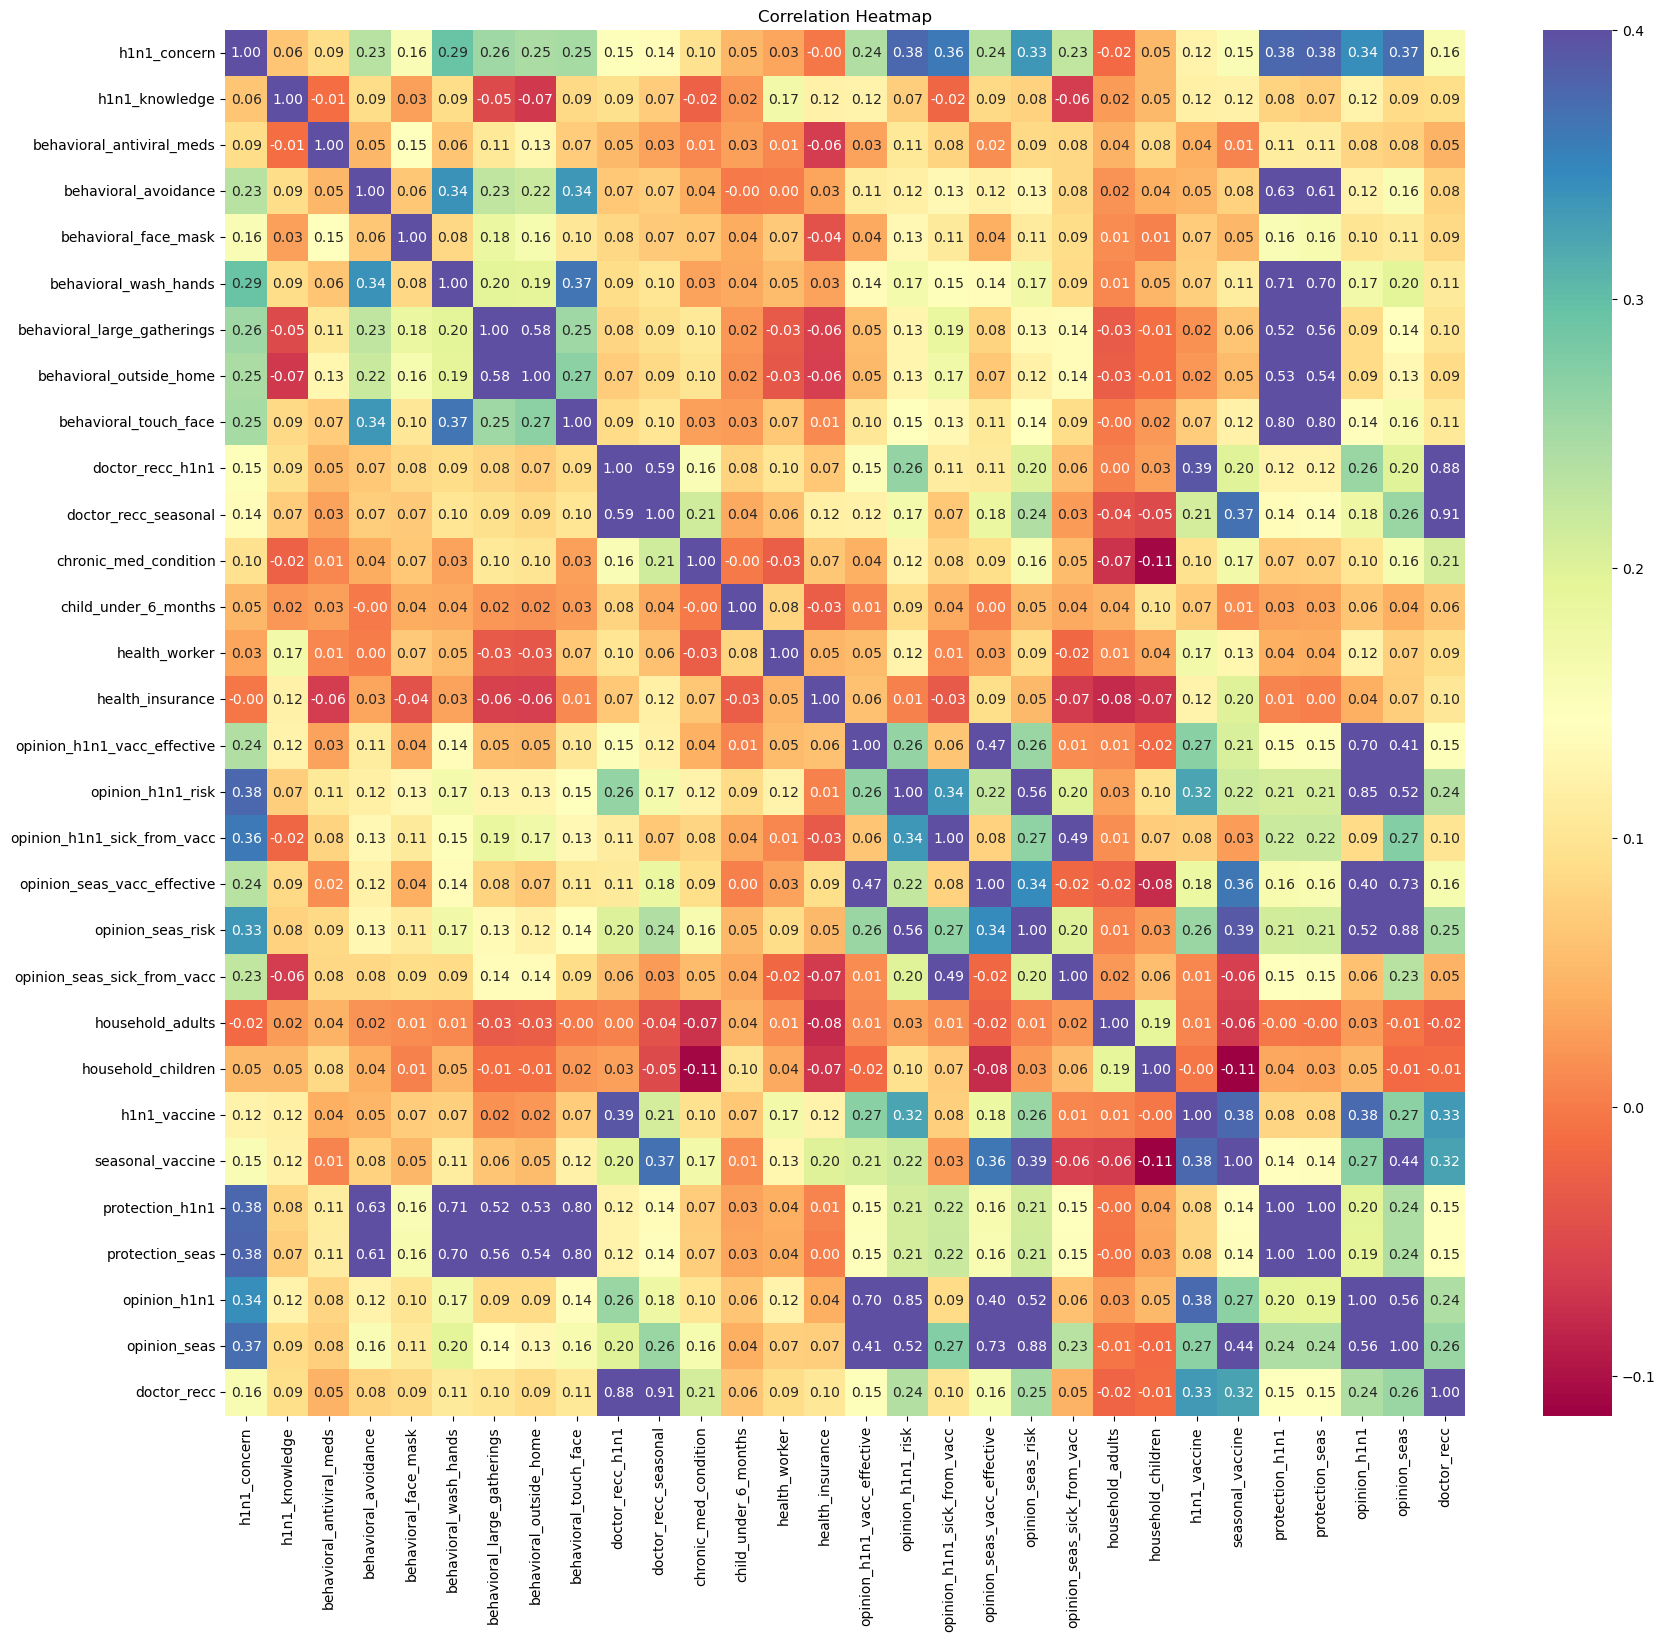

In [ ]:
corr_matrix = df_raw.corr()

plt.figure(figsize=(20, 18))  
sns.heatmap(corr_matrix, vmax=.4, annot=True, fmt=".2f", cmap="Spectral") 
plt.title("Correlation Heatmap") 
plt.show()  

## Write back to CSV file "raw_data"

In [ ]:
df_raw.to_csv('raw_data.csv', index=False)

In [ ]:
df = pd.read_csv('raw_data.csv')
df

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0               1.0             0.0                        0.0   
1               3.0             2.0                        0.0   
2               1.0             1.0                        0.0   
3               1.0             1.0                        0.0   
4               2.0             1.0                        0.0   
...             ...             ...                        ...   
26702           2.0             0.0                        0.0   
26703           1.0             2.0                        0.0   
26704           2.0             2.0                        0.0   
26705           1.0             1.0                        0.0   
26706           0.0             0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       0.0                   0.0                    0.0   
1                       1.0                   0.0                    1.0   
2                       1.0                   0.0                    0.0   
3                       1.0                   0.0                    1.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26702                   1.0                   0.0                    0.0   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              0.0                      1.0   
1                              0.0                      1.0   
2                              0.0                      0.0   
3                              1.0                      0.0   
4                              1.0                      0.0   
...                            ...                      ...   
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  doctor_recc_h1n1  ...  household_children  \
0                        1.0               0.0  ...                 0.0   
1                        1.0               0.0  ...                 0.0   
2                        0.0               NaN  ...                 0.0   
3                        0.0               0.0  ...                 0.0   
4                        1.0               0.0  ...                 0.0   
...                      ...               ...  ...                 ...   
26702                    0.0               0.0  ...                 0.0   
26703                    0.0               1.0  ...                 0.0   
26704                    1.0               0.0  ...                 0.0   
26705                    NaN               0.0  ...                 0.0   
26706                    0.0               0.0  ...                 0.0   

       employment_industry  employment_occupation  h1n1_vaccine  \
0                      NaN                    NaN             0   
1                 pxcmvdjn               xgwztkwe             0   
2                 rucpziij               xtkaffoo             0   
3                      NaN                    NaN             0   
4                 wxleyezf               emcorrxb             0   
...                    ...                    ...           ...   
26702                  NaN                    NaN             0   
26703             fcxhlnwr               cmhcxjea             0   
26704                  NaN              

# Preprocessing (Xiting WANG's Part)

In [ ]:
# Import Necessary Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('raw_data.csv')
df

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0               1.0             0.0                        0.0   
1               3.0             2.0                        0.0   
2               1.0             1.0                        0.0   
3               1.0             1.0                        0.0   
4               2.0             1.0                        0.0   
...             ...             ...                        ...   
26702           2.0             0.0                        0.0   
26703           1.0             2.0                        0.0   
26704           2.0             2.0                        0.0   
26705           1.0             1.0                        0.0   
26706           0.0             0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       0.0                   0.0                    0.0   
1                       1.0                   0.0                    1.0   
2                       1.0                   0.0                    0.0   
3                       1.0                   0.0                    1.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26702                   1.0                   0.0                    0.0   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              0.0                      1.0   
1                              0.0                      1.0   
2                              0.0                      0.0   
3                              1.0                      0.0   
4                              1.0                      0.0   
...                            ...                      ...   
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  doctor_recc_h1n1  ...  household_children  \
0                        1.0               0.0  ...                 0.0   
1                        1.0               0.0  ...                 0.0   
2                        0.0               NaN  ...                 0.0   
3                        0.0               0.0  ...                 0.0   
4                        1.0               0.0  ...                 0.0   
...                      ...               ...  ...                 ...   
26702                    0.0               0.0  ...                 0.0   
26703                    0.0               1.0  ...                 0.0   
26704                    1.0               0.0  ...                 0.0   
26705                    NaN               0.0  ...                 0.0   
26706                    0.0               0.0  ...                 0.0   

       employment_industry  employment_occupation  h1n1_vaccine  \
0                      NaN                    NaN             0   
1                 pxcmvdjn               xgwztkwe             0   
2                 rucpziij               xtkaffoo             0   
3                      NaN                    NaN             0   
4                 wxleyezf               emcorrxb             0   
...                    ...                    ...           ...   
26702                  NaN                    NaN             0   
26703             fcxhlnwr               cmhcxjea             0   
26704                  NaN              

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [ ]:
df.head(5) #Verify the data has been loaded correctly by inspecting a few rows 

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0           1.0             0.0                        0.0   
1           3.0             2.0                        0.0   
2           1.0             1.0                        0.0   
3           1.0             1.0                        0.0   
4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  doctor_recc_h1n1  ...  household_children  \
0                    1.0               0.0  ...                 0.0   
1                    1.0               0.0  ...                 0.0   
2                    0.0               NaN  ...                 0.0   
3                    0.0               0.0  ...                 0.0   
4                    1.0               0.0  ...                 0.0   

   employment_industry  employment_occupation  h1n1_vaccine  seasonal_vaccine  \
0                  NaN                    NaN             0                 0   
1             pxcmvdjn               xgwztkwe             0                 1   
2             rucpziij               xtkaffoo             0                 0   
3                  NaN                    NaN             0                 1   
4             wxleyezf               emcorrxb             0                 0   

   protection_h1n1  protection_seas  opinion_h1n1  opinion_seas  doctor_recc  
0            0.425            0.420          1.44          1.79          0.0  
1            0.905            0.870          3.44          3.58          0.0  
2            0.180            0.160          1.56          2.83          NaN  
3            0.575            0.580          2.04          4.97          0.5  
4            0.885            0.895          2.40          2.49          0.0  

[5 rows x 42 columns]

In [ ]:
df.tail(5)

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
26702           2.0             0.0                        0.0   
26703           1.0             2.0                        0.0   
26704           2.0             2.0                        0.0   
26705           1.0             1.0                        0.0   
26706           0.0             0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
26702                   1.0                   0.0                    0.0   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  doctor_recc_h1n1  ...  household_children  \
26702                    0.0               0.0  ...                 0.0   
26703                    0.0               1.0  ...                 0.0   
26704                    1.0               0.0  ...                 0.0   
26705                    NaN               0.0  ...                 0.0   
26706                    0.0               0.0  ...                 0.0   

       employment_industry  employment_occupation  h1n1_vaccine  \
26702                  NaN                    NaN             0   
26703             fcxhlnwr               cmhcxjea             0   
26704                  NaN                    NaN             0   
26705             fcxhlnwr               haliazsg             0   
26706                  NaN                    NaN             0   

       seasonal_vaccine  protection_h1n1  protection_seas  opinion_h1n1  \
26702                 0            0.295            0.265          1.56   
26703                 0            0.480            0.450          2.32   
26704                 1            0.885            0.895          3.28   
26705                 0              NaN              NaN          1.44   
26706                 0            0.180            0.160          2.36   

       opinion_seas  doctor_recc  
26702          3.92          0.0  
26703          3.26          1.0  
26704          5.06          0.0  
26705          1.79          0.0  
26706          3.26          0.0  

[5 rows x 42 columns]

In [ ]:
df.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

# Drop useless columns

From the generated results and the basic information from the EDA process, we can conclude that some features no need to focus on:
* **household_children** : no positive correlations
* **household_adults** : no positive correlations
* **census_msa** : no positive correlations
* **hhs_geo_region** : no positive crellations
* **health_worker** : high related with **employment_industry**, can be deleted
* **behavioral_antiviral_meds** : too much values are 0
* **behavioral_face_mask** : too much values are 0
* **children_under_6_months** : too much values are 0
* **health_insurance** : too much missing values
* **employment_industry** : too much missing values
* **employment_occupation** : too much missing values

In [ ]:
df.drop(['household_children','household_adults','census_msa','hhs_geo_region','health_worker','behavioral_antiviral_meds', 'behavioral_face_mask', 'child_under_6_months', 'health_insurance', 'employment_industry','employment_occupation'],axis=1,inplace = True)
df.shape

(26707, 31)

## Preprocessing behavioral features
Since we have decreased the dimension for all behavioral features into two features, so we can drop all other behavioral featues

### New Features 
have been generated in EDA process and stored into raw_data.csv, which is read in this **df**

In [ ]:
# df_raw['protection_h1n1'] =  round( df_raw['behavioral_avoidance']  * 0.18 + df_raw['behavioral_wash_hands'] * 0.3 +  df_raw['behavioral_large_gatherings']  * 0.095  +  df_raw['behavioral_outside_home']  * 0.115 + df_raw['behavioral_touch_face'] * 0.31,3)
# df_raw['protection_h1n1']
# df_raw['protection_seas'] =  round( df_raw['behavioral_avoidance']  * 0.16 + df_raw['behavioral_wash_hands'] * 0.29 +  df_raw['behavioral_large_gatherings']  * 0.13  +  df_raw['behavioral_outside_home']  * 0.105 + df_raw['behavioral_touch_face'] * 0.315 ,3)
# df_raw['protection_seas']

### Drop Useless Features

In [ ]:
df.drop(['behavioral_avoidance', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face'],axis=1,inplace = True)
df.shape

(26707, 26)

## Preprocessing recommendation features
Since we have decreased the dimension for all recommendation features into one features, so we can drop all other recommendation featues

### New Features 
have been generated in EDA process and stored into raw_data.csv, which is read in this **df**

In [ ]:
#df_raw['doctor_recc'] = (df_raw['doctor_recc_h1n1'] + df_raw['doctor_recc_seasonal']) / 2

### Drop Useless Features

In [ ]:
df.drop(['doctor_recc_h1n1', 'doctor_recc_seasonal'], axis=1,inplace = True)
df.shape

(26707, 24)

## Preprocessing opinion features
Since we have decreased the dimension for all recommendation features into one features, so we can drop all other recommendation featues

### New Features 
have been generated in EDA process and stored into raw_data.csv, which is read in this **df**

In [ ]:
# corr_ohve_hv = round(corr_matrix.loc['opinion_h1n1_vacc_effective','h1n1_vaccine'],2)
# corr_ohr_hv = round(corr_matrix.loc['opinion_h1n1_risk','h1n1_vaccine'],2)
# corr_ohsfv_hv =round(corr_matrix.loc['opinion_h1n1_sick_from_vacc','h1n1_vaccine'],2)
# corr_ohve_hv_weight = round(corr_ohve_hv / (corr_ohve_hv + corr_ohr_hv + corr_ohsfv_hv),2)
# corr_ohr_hv_weight = round(corr_ohr_hv / (corr_ohve_hv + corr_ohr_hv + corr_ohsfv_hv),2)
# corr_ohsfv_hv_weight = round(corr_ohsfv_hv / (corr_ohve_hv + corr_ohr_hv + corr_ohsfv_hv),2)
# df_raw['opinion_h1n1'] = df_raw['opinion_h1n1_vacc_effective']*corr_ohve_hv_weight + df_raw['opinion_h1n1_risk']*corr_ohr_hv_weight - df_raw['opinion_h1n1_sick_from_vacc']*corr_ohsfv_hv_weight
# df_raw['opinion_h1n1']

In [ ]:
# corr_ohve_sv = round(corr_matrix.loc['opinion_seas_vacc_effective','seasonal_vaccine'],2)
# corr_ohr_sv = round(corr_matrix.loc['opinion_seas_risk','seasonal_vaccine'],2)
# corr_ohsfv_sv = round(corr_matrix.loc['opinion_seas_sick_from_vacc','seasonal_vaccine'],2)
# corr_ohve_sv_weight = round(corr_ohve_sv / (corr_ohve_sv + corr_ohr_sv + corr_ohsfv_sv),2) 
# corr_ohr_sv_weight = round(corr_ohr_sv / (corr_ohve_sv + corr_ohr_sv + corr_ohsfv_sv),2)
# corr_ohsfv_sv_weight = round(corr_ohsfv_sv / (corr_ohve_sv + corr_ohr_sv + corr_ohsfv_sv),2)
# df_raw['opinion_seas'] = round(df_raw['opinion_seas_vacc_effective']*corr_ohve_sv_weight + df_raw['opinion_seas_risk']*corr_ohr_sv_weight - df_raw['opinion_seas_sick_from_vacc']*corr_ohsfv_sv_weight,2)
# df_raw['opinion_seas']

### Drop Useless Features

In [ ]:
df.drop(['opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc'],axis=1,inplace = True)
df.drop(['opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc'],axis=1,inplace = True)
df.shape

(26707, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   h1n1_concern           26615 non-null  float64
 1   h1n1_knowledge         26591 non-null  float64
 2   chronic_med_condition  25736 non-null  float64
 3   age_group              26707 non-null  object 
 4   education              25300 non-null  object 
 5   race                   26707 non-null  object 
 6   sex                    26707 non-null  object 
 7   income_poverty         22284 non-null  object 
 8   marital_status         25299 non-null  object 
 9   rent_or_own            24665 non-null  object 
 10  employment_status      25244 non-null  object 
 11  h1n1_vaccine           26707 non-null  int64  
 12  seasonal_vaccine       26707 non-null  int64  
 13  protection_h1n1        26221 non-null  float64
 14  protection_seas        26221 non-null  float64
 15  op

C:\Users\psxxw11\AppData\Local\Temp\ipykernel_9596\2347437002.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


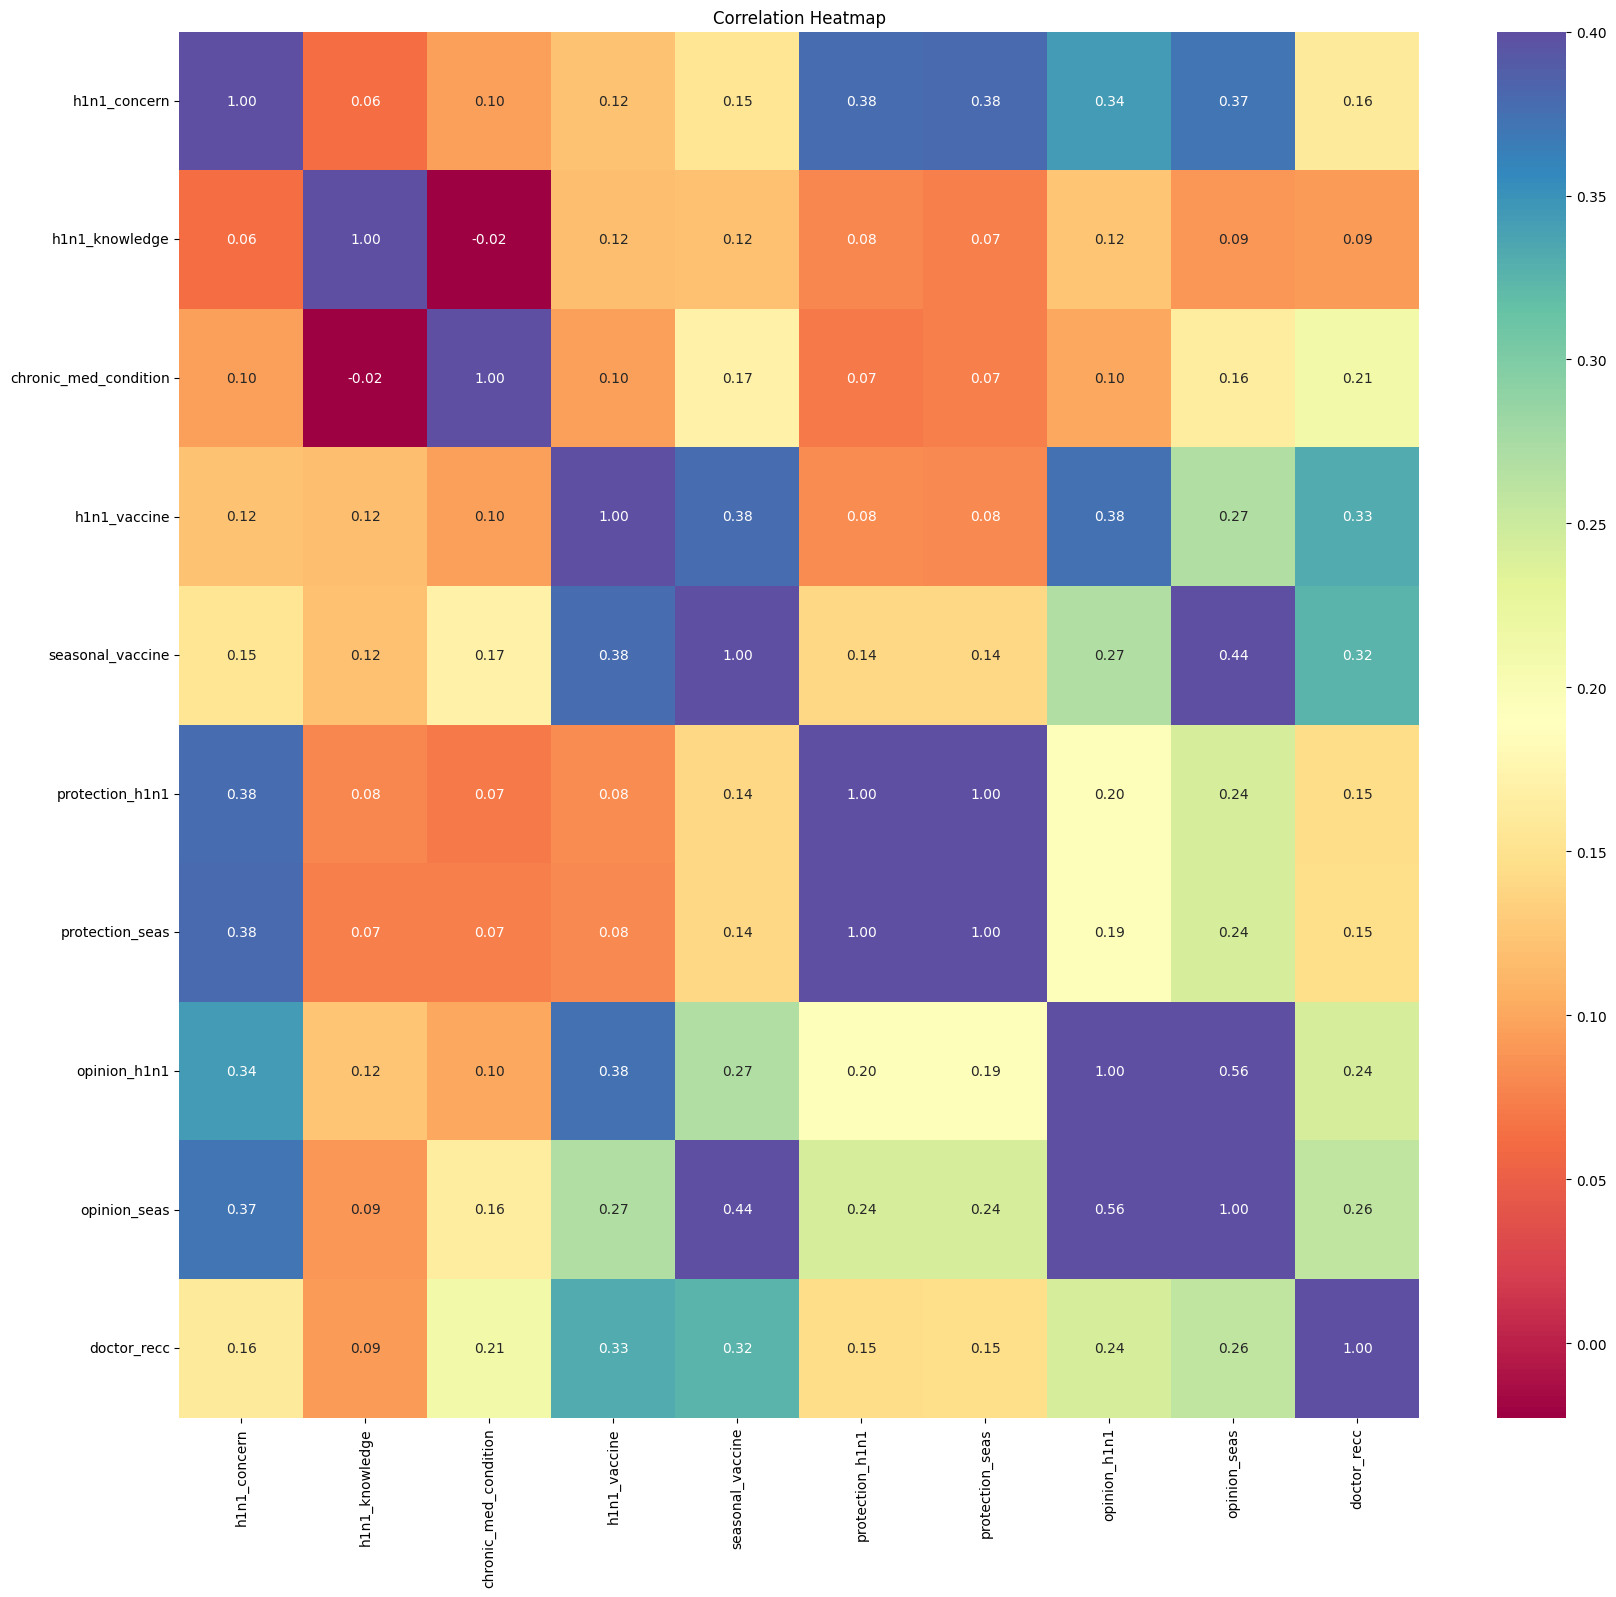

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(20, 18)) 
sns.heatmap(corr_matrix, vmax=.4, annot=True, fmt=".2f", cmap="Spectral")  
plt.title("Correlation Heatmap") 
plt.show() 

# Processing

In [ ]:
df_copy = df.copy()
df_copy

h1n1_concern  h1n1_knowledge  chronic_med_condition      age_group  \
0               1.0             0.0                    0.0  55 - 64 Years   
1               3.0             2.0                    0.0  35 - 44 Years   
2               1.0             1.0                    1.0  18 - 34 Years   
3               1.0             1.0                    1.0      65+ Years   
4               2.0             1.0                    0.0  45 - 54 Years   
...             ...             ...                    ...            ...   
26702           2.0             0.0                    0.0      65+ Years   
26703           1.0             2.0                    0.0  18 - 34 Years   
26704           2.0             2.0                    0.0  55 - 64 Years   
26705           1.0             1.0                    0.0  18 - 34 Years   
26706           0.0             0.0                    0.0      65+ Years   

              education      race     sex             income_poverty  \
0            < 12 Years     White  Female              Below Poverty   
1              12 Years     White    Male              Below Poverty   
2      College Graduate     White    Male  <= $75,000, Above Poverty   
3              12 Years     White  Female              Below Poverty   
4          Some College     White  Female  <= $75,000, Above Poverty   
...                 ...       ...     ...                        ...   
26702      Some College     White  Female  <= $75,000, Above Poverty   
26703  College Graduate     White    Male  <= $75,000, Above Poverty   
26704      Some College     White  Female                        NaN   
26705      Some College  Hispanic  Female  <= $75,000, Above Poverty   
26706      Some College     White    Male  <= $75,000, Above Poverty   

      marital_status rent_or_own   employment_status  h1n1_vaccine  \
0        Not Married         Own  Not in Labor Force             0   
1        Not Married        Rent            Employed             0   
2        Not Married         Own            Employed             0   
3        Not Married        Rent  Not in Labor Force             0   
4            Married         Own            Employed             0   
...              ...         ...                 ...           ...   
26702    Not Married         Own  Not in Labor Force             0   
26703    Not Married        Rent            Employed             0   
26704    Not Married         Own                 NaN             0   
26705        Married        Rent            Employed             0   
26706        Married         Own  Not in Labor Force             0   

       seasonal_vaccine  protection_h1n1  protection_seas  opinion_h1n1  \
0                     0            0.425            0.420          1.44   
1                     1            0.905            0.870          3.44   
2                     0            0.180            0.160          1.56   
3                     1            0.575            0.580          2.04   
4                     0            0.885            0.895          2.40   
...                 ...              ...              ...           ...   
26702                 0            0.295            0.265          1.56   
26703                 0            0.480            0.450          2.32   
26704                 1            0.885            0.895          3.28   
26705                 0              NaN              NaN          1.44   
26706                 0            0.180            0.160          2.36   

       opinion_seas  doctor_recc  
0              1.79          0.0  
1              3.58          0.0  
2              2.83          NaN  
3              4.97          0.5  
4              2.49          0.0  
...             ...          ...  
26702          3.92          0.0  
26703          3.26          1.0  
26704          5.06          0.0  
26705          1.79          0.0  
26706          3.26          0.0  

[26707 rows x 18 columns]

## Processing the numerical data features

process multiple numerical feature columns in a pandas DataFrame and fill the missing values with the mode of each column:

In [ ]:
def fill_missing_with_mode(df, columns):
    for column in columns:
        mode_value = df[column].mode().values[0]
        df[column].fillna(mode_value, inplace=True)

In [ ]:
fill_missing_with_mode(df_copy, ['h1n1_concern','h1n1_knowledge','chronic_med_condition','protection_h1n1','protection_seas','opinion_h1n1','opinion_seas','doctor_recc'])

In [ ]:
df_copy.isnull().sum()

h1n1_concern                0
h1n1_knowledge              0
chronic_med_condition       0
age_group                   0
education                1407
race                        0
sex                         0
income_poverty           4423
marital_status           1408
rent_or_own              2042
employment_status        1463
h1n1_vaccine                0
seasonal_vaccine            0
protection_h1n1             0
protection_seas             0
opinion_h1n1                0
opinion_seas                0
doctor_recc                 0
dtype: int64

## Processing the categoral data features

### Fill the missing values in **marital_status** with mode

In [ ]:
fill_missing_with_mode(df_copy, ['marital_status'])

### Fill the missing values in **education** based on **age_group**

* All age stages --> College Graduate
* The evidence shown in EDA process 

In [ ]:
df_copy['education'].fillna( 'College Graduate', inplace=True)

In [ ]:
df_copy.isnull().sum()

h1n1_concern                0
h1n1_knowledge              0
chronic_med_condition       0
age_group                   0
education                   0
race                        0
sex                         0
income_poverty           4423
marital_status              0
rent_or_own              2042
employment_status        1463
h1n1_vaccine                0
seasonal_vaccine            0
protection_h1n1             0
protection_seas             0
opinion_h1n1                0
opinion_seas                0
doctor_recc                 0
dtype: int64

### Fill the missing values in  **employment_status** based on **education**

* 12 Years --> Not in Labor Force
* < 12 Years --> Not in Labor Force
* College Graduate --> Employed
* Some College --> Employed
* The evidence shown in EDA process 

In [ ]:
import numpy as np
df_copy['employment_status'] = np.where(df_copy['education'].isin(['12 Years', '< 12 Years']), 'Not in Labor Force', df_copy['employment_status'])
df_copy['employment_status'] = np.where(df_copy['education'].isin(['College Graduate', 'Some College']), 'Employed', df_copy['employment_status'])

In [ ]:
df_copy.isnull().sum()

h1n1_concern                0
h1n1_knowledge              0
chronic_med_condition       0
age_group                   0
education                   0
race                        0
sex                         0
income_poverty           4423
marital_status              0
rent_or_own              2042
employment_status           0
h1n1_vaccine                0
seasonal_vaccine            0
protection_h1n1             0
protection_seas             0
opinion_h1n1                0
opinion_seas                0
doctor_recc                 0
dtype: int64

### Fill the missing values in  **income_poverty** based on **employment_status**

* All can be filled with <= $75,000, Above Poverty
* The evidence shown in EDA process 


In [ ]:
df_copy['income_poverty'].fillna( '<= $75,000', inplace=True)

In [ ]:
df_copy.isnull().sum()

h1n1_concern                0
h1n1_knowledge              0
chronic_med_condition       0
age_group                   0
education                   0
race                        0
sex                         0
income_poverty              0
marital_status              0
rent_or_own              2042
employment_status           0
h1n1_vaccine                0
seasonal_vaccine            0
protection_h1n1             0
protection_seas             0
opinion_h1n1                0
opinion_seas                0
doctor_recc                 0
dtype: int64

### Fill the missing values in  **rent_or_own** based on **income_poverty**

For the missing values in **rent_or_own** observing their **income poverty** value, if:
* Below Poverty --> Rent
* (>$75,000) --> Own
* <= $75,000, Above Poverty --> Own
* The evidence shown in EDA process 

In [ ]:
import numpy as np
df_copy['rent_or_own'] = np.where(df_copy['income_poverty'].isin(['Below Poverty']), 'Rent', df_copy['rent_or_own'])
df_copy['rent_or_own'].fillna( 'Own', inplace=True)

In [ ]:
df_copy.isnull().sum()

h1n1_concern             0
h1n1_knowledge           0
chronic_med_condition    0
age_group                0
education                0
race                     0
sex                      0
income_poverty           0
marital_status           0
rent_or_own              0
employment_status        0
h1n1_vaccine             0
seasonal_vaccine         0
protection_h1n1          0
protection_seas          0
opinion_h1n1             0
opinion_seas             0
doctor_recc              0
dtype: int64

Change all strings into numbers using label encode : use ***LabelEncoder***

In [ ]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_features(df, columns):
    label_encoder = LabelEncoder()
    for column in columns:
        df[column] = label_encoder.fit_transform(df[column].astype(str))

encode_categorical_features(df_copy, ['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status'])


In [ ]:
df_copy.head(10)

h1n1_concern  h1n1_knowledge  chronic_med_condition  age_group  education  \
0           1.0             0.0                    0.0          3          1   
1           3.0             2.0                    0.0          1          0   
2           1.0             1.0                    1.0          0          2   
3           1.0             1.0                    1.0          4          0   
4           2.0             1.0                    0.0          2          3   
5           3.0             1.0                    0.0          4          0   
6           0.0             0.0                    0.0          3          1   
7           1.0             0.0                    1.0          2          3   
8           0.0             2.0                    0.0          2          2   
9           2.0             1.0                    1.0          3          0   

   race  sex  income_poverty  marital_status  rent_or_own  employment_status  \
0     3    0               3               1            1                  1   
1     3    1               3               1            1                  1   
2     3    1               1               1            0                  0   
3     3    0               3               1            1                  1   
4     3    0               1               0            0                  0   
5     3    1               1               0            0                  1   
6     3    1               1               1            0                  1   
7     3    0               1               0            0                  0   
8     3    1               2               0            0                  0   
9     3    1               1               1            0                  1   

   h1n1_vaccine  seasonal_vaccine  protection_h1n1  protection_seas  \
0             0                 0            0.425            0.420   
1             0                 1            0.905            0.870   
2             0                 0            0.180            0.160   
3             0                 1            0.575            0.580   
4             0                 0            0.885            0.895   
5             0                 0            0.790            0.765   
6             0                 0            0.000            0.000   
7             1                 1            0.790            0.765   
8             0                 0            1.000            1.000   
9             0                 0            0.585            0.605   

   opinion_h1n1  opinion_seas  doctor_recc  
0          1.44          1.79          0.0  
1          3.44          3.58          0.0  
2          1.56          2.83          0.0  
3          2.04          4.97          0.5  
4          2.40          2.49          0.0  
5          2.84          5.24          0.5  
6          1.96          3.31          0.0  
7          2.84          3.31          0.5  
8          1.96          3.31          0.0  
9          2.32          3.40          0.0

In [ ]:
df_copy.isnull().sum()

h1n1_concern             0
h1n1_knowledge           0
chronic_med_condition    0
age_group                0
education                0
race                     0
sex                      0
income_poverty           0
marital_status           0
rent_or_own              0
employment_status        0
h1n1_vaccine             0
seasonal_vaccine         0
protection_h1n1          0
protection_seas          0
opinion_h1n1             0
opinion_seas             0
doctor_recc              0
dtype: int64

In [ ]:
df_copy.to_csv('data_pro.csv', index=False)

# Generate a dataset include all features (without new features)

In [ ]:
df1 = pd.read_csv('raw_data.csv')
df1

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0               1.0             0.0                        0.0   
1               3.0             2.0                        0.0   
2               1.0             1.0                        0.0   
3               1.0             1.0                        0.0   
4               2.0             1.0                        0.0   
...             ...             ...                        ...   
26702           2.0             0.0                        0.0   
26703           1.0             2.0                        0.0   
26704           2.0             2.0                        0.0   
26705           1.0             1.0                        0.0   
26706           0.0             0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       0.0                   0.0                    0.0   
1                       1.0                   0.0                    1.0   
2                       1.0                   0.0                    0.0   
3                       1.0                   0.0                    1.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26702                   1.0                   0.0                    0.0   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              0.0                      1.0   
1                              0.0                      1.0   
2                              0.0                      0.0   
3                              1.0                      0.0   
4                              1.0                      0.0   
...                            ...                      ...   
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  doctor_recc_h1n1  ...  household_children  \
0                        1.0               0.0  ...                 0.0   
1                        1.0               0.0  ...                 0.0   
2                        0.0               NaN  ...                 0.0   
3                        0.0               0.0  ...                 0.0   
4                        1.0               0.0  ...                 0.0   
...                      ...               ...  ...                 ...   
26702                    0.0               0.0  ...                 0.0   
26703                    0.0               1.0  ...                 0.0   
26704                    1.0               0.0  ...                 0.0   
26705                    NaN               0.0  ...                 0.0   
26706                    0.0               0.0  ...                 0.0   

       employment_industry  employment_occupation  h1n1_vaccine  \
0                      NaN                    NaN             0   
1                 pxcmvdjn               xgwztkwe             0   
2                 rucpziij               xtkaffoo             0   
3                      NaN                    NaN             0   
4                 wxleyezf               emcorrxb             0   
...                    ...                    ...           ...   
26702                  NaN                    NaN             0   
26703             fcxhlnwr               cmhcxjea             0   
26704                  NaN              

## Drop useless feature

In [ ]:
df1.drop(['household_children','household_adults','census_msa','hhs_geo_region','health_worker','behavioral_antiviral_meds', 'behavioral_face_mask', 'child_under_6_months', 'health_insurance', 'employment_industry','employment_occupation',
'protection_h1n1','protection_seas','opinion_h1n1','opinion_seas','doctor_recc'],axis=1,inplace = True)

In [ ]:
def fill_missing_with_mode(df, columns):
    for column in columns:
        mode_value = df[column].mode().values[0]
        df[column].fillna(mode_value, inplace=True)

In [ ]:
fill_missing_with_mode(df1, ['h1n1_concern','h1n1_knowledge','chronic_med_condition','behavioral_avoidance','behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home',
                            'behavioral_touch_face', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
                            'doctor_recc_h1n1','doctor_recc_seasonal'])#'protection_h1n1','protection_seas','opinion_h1n1','opinion_seas','doctor_recc'])

In [ ]:
df1.isnull().sum()

h1n1_concern                      0
h1n1_knowledge                    0
behavioral_avoidance              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home           0
behavioral_touch_face             0
doctor_recc_h1n1                  0
doctor_recc_seasonal              0
chronic_med_condition             0
opinion_h1n1_vacc_effective       0
opinion_h1n1_risk                 0
opinion_h1n1_sick_from_vacc       0
opinion_seas_vacc_effective       0
opinion_seas_risk                 0
opinion_seas_sick_from_vacc       0
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status                 1408
rent_or_own                    2042
employment_status              1463
h1n1_vaccine                      0
seasonal_vaccine                  0
dtype: int64

## Same process for categoral data features

### Fill the missing values 

In [ ]:
fill_missing_with_mode(df1, ['marital_status'])

df1['education'].fillna( 'College Graduate', inplace=True)

import numpy as np
df1['employment_status'] = np.where(df1['education'].isin(['12 Years', '< 12 Years']), 'Not in Labor Force', df1['employment_status'])
df1['employment_status'] = np.where(df1['education'].isin(['College Graduate', 'Some College']), 'Employed', df1['employment_status'])

df1['income_poverty'].fillna( '<= $75,000', inplace=True)

df1['rent_or_own'] = np.where(df1['income_poverty'].isin(['Below Poverty']), 'Rent', df1['rent_or_own'])
df1['rent_or_own'].fillna( 'Own', inplace=True)

In [ ]:
df1.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_avoidance           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
h1n1_vaccine                   0
seasonal_vaccine               0
dtype: int64

### Change all strings into numbers using label encode : use ***LabelEncoder***

In [ ]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_features(df, columns):
    label_encoder = LabelEncoder()
    for column in columns:
        df[column] = label_encoder.fit_transform(df[column].astype(str))

encode_categorical_features(df1, ['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status'])


In [ ]:
df1.head(10)

h1n1_concern  h1n1_knowledge  behavioral_avoidance  behavioral_wash_hands  \
0           1.0             0.0                   0.0                    0.0   
1           3.0             2.0                   1.0                    1.0   
2           1.0             1.0                   1.0                    0.0   
3           1.0             1.0                   1.0                    1.0   
4           2.0             1.0                   1.0                    1.0   
5           3.0             1.0                   1.0                    1.0   
6           0.0             0.0                   0.0                    0.0   
7           1.0             0.0                   1.0                    1.0   
8           0.0             2.0                   1.0                    1.0   
9           2.0             1.0                   1.0                    0.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   
5                          0.0                      0.0   
6                          0.0                      0.0   
7                          0.0                      0.0   
8                          1.0                      1.0   
9                          1.0                      0.0   

   behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                    1.0               0.0                   0.0   
1                    1.0               0.0                   0.0   
2                    0.0               0.0                   0.0   
3                    0.0               0.0                   1.0   
4                    1.0               0.0                   0.0   
5                    1.0               0.0                   1.0   
6                    0.0               0.0                   0.0   
7                    1.0               1.0                   0.0   
8                    1.0               0.0                   0.0   
9                    1.0               0.0                   0.0   

   chronic_med_condition  ...  age_group  education  race  sex  \
0                    0.0  ...          3          1     3    0   
1                    0.0  ...          1          0     3    1   
2                    1.0  ...          0          2     3    1   
3                    1.0  ...          4          0     3    0   
4                    0.0  ...          2          3     3    0   
5                    0.0  ...          4          0     3    1   
6                    0.0  ...          3          1     3    1   
7                    1.0  ...          2          3     3    0   
8                    0.0  ...          2          2     3    1   
9                    1.0  ...          3          0     3    1   

   income_poverty  marital_status  rent_or_own  employment_status  \
0               3               1            1                  1   
1               3               1            1                  1   
2               1               1            0                  0   
3               3               1            1                  1   
4               1               0            0                  0   
5               1               0            0                  1   
6               1               1            0                  1   
7               1               0            0                  0   
8               2               0            0                  0   
9               1               1            0                  1   

   h1n1_vaccine  seasonal_vaccine  
0             0                 0  
1             0                 1  
2             0                 0  
3             0                 1  
4             0                 0  
5             0     

In [ ]:
df1.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_avoidance           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
h1n1_vaccine                   0
seasonal_vaccine               0
dtype: int64

In [ ]:
df1.to_csv('data_nofusion.csv', index=False)

# Generate a dataset include all features (with new features)

In [ ]:
df2 = pd.read_csv('raw_data.csv')
df2

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0               1.0             0.0                        0.0   
1               3.0             2.0                        0.0   
2               1.0             1.0                        0.0   
3               1.0             1.0                        0.0   
4               2.0             1.0                        0.0   
...             ...             ...                        ...   
26702           2.0             0.0                        0.0   
26703           1.0             2.0                        0.0   
26704           2.0             2.0                        0.0   
26705           1.0             1.0                        0.0   
26706           0.0             0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       0.0                   0.0                    0.0   
1                       1.0                   0.0                    1.0   
2                       1.0                   0.0                    0.0   
3                       1.0                   0.0                    1.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26702                   1.0                   0.0                    0.0   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              0.0                      1.0   
1                              0.0                      1.0   
2                              0.0                      0.0   
3                              1.0                      0.0   
4                              1.0                      0.0   
...                            ...                      ...   
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  doctor_recc_h1n1  ...  household_children  \
0                        1.0               0.0  ...                 0.0   
1                        1.0               0.0  ...                 0.0   
2                        0.0               NaN  ...                 0.0   
3                        0.0               0.0  ...                 0.0   
4                        1.0               0.0  ...                 0.0   
...                      ...               ...  ...                 ...   
26702                    0.0               0.0  ...                 0.0   
26703                    0.0               1.0  ...                 0.0   
26704                    1.0               0.0  ...                 0.0   
26705                    NaN               0.0  ...                 0.0   
26706                    0.0               0.0  ...                 0.0   

       employment_industry  employment_occupation  h1n1_vaccine  \
0                      NaN                    NaN             0   
1                 pxcmvdjn               xgwztkwe             0   
2                 rucpziij               xtkaffoo             0   
3                      NaN                    NaN             0   
4                 wxleyezf               emcorrxb             0   
...                    ...                    ...           ...   
26702                  NaN                    NaN             0   
26703             fcxhlnwr               cmhcxjea             0   
26704                  NaN              

## Drop useless feature

In [ ]:
df2.drop(['household_children','household_adults','census_msa','hhs_geo_region','health_worker','behavioral_antiviral_meds', 'behavioral_face_mask', 'child_under_6_months', 'health_insurance', 'employment_industry','employment_occupation',
],axis=1,inplace = True)

In [ ]:
def fill_missing_with_mode(df, columns):
    for column in columns:
        mode_value = df[column].mode().values[0]
        df[column].fillna(mode_value, inplace=True)

In [ ]:
fill_missing_with_mode(df2, ['h1n1_concern','h1n1_knowledge','chronic_med_condition','behavioral_avoidance','behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home',
                            'behavioral_touch_face', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
                            'doctor_recc_h1n1','doctor_recc_seasonal', 'protection_h1n1','protection_seas','opinion_h1n1','opinion_seas','doctor_recc'])

In [ ]:
df2.isnull().sum()

h1n1_concern                      0
h1n1_knowledge                    0
behavioral_avoidance              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home           0
behavioral_touch_face             0
doctor_recc_h1n1                  0
doctor_recc_seasonal              0
chronic_med_condition             0
opinion_h1n1_vacc_effective       0
opinion_h1n1_risk                 0
opinion_h1n1_sick_from_vacc       0
opinion_seas_vacc_effective       0
opinion_seas_risk                 0
opinion_seas_sick_from_vacc       0
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status                 1408
rent_or_own                    2042
employment_status              1463
h1n1_vaccine                      0
seasonal_vaccine                  0
protection_h1n1                   0
protection_seas             

## Same process for categoral data features

### Fill the missing values 

In [ ]:
fill_missing_with_mode(df2, ['marital_status'])

df2['education'].fillna( 'College Graduate', inplace=True)

import numpy as np
df2['employment_status'] = np.where(df2['education'].isin(['12 Years', '< 12 Years']), 'Not in Labor Force', df2['employment_status'])
df2['employment_status'] = np.where(df2['education'].isin(['College Graduate', 'Some College']), 'Employed', df2['employment_status'])

df2['income_poverty'].fillna( '<= $75,000', inplace=True)

df2['rent_or_own'] = np.where(df2['income_poverty'].isin(['Below Poverty']), 'Rent', df2['rent_or_own'])
df2['rent_or_own'].fillna( 'Own', inplace=True)

In [ ]:
df2.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_avoidance           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
h1n1_vaccine                   0
seasonal_vaccine               0
protection_h1n1                0
protection_seas                0
opinion_h1n1                   0
opinion_seas                   0
doctor_rec

### Change all strings into numbers using label encode : use ***LabelEncoder***

In [ ]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_features(df, columns):
    label_encoder = LabelEncoder()
    for column in columns:
        df[column] = label_encoder.fit_transform(df[column].astype(str))

encode_categorical_features(df2, ['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status'])


In [ ]:
df2.head(10)

h1n1_concern  h1n1_knowledge  behavioral_avoidance  behavioral_wash_hands  \
0           1.0             0.0                   0.0                    0.0   
1           3.0             2.0                   1.0                    1.0   
2           1.0             1.0                   1.0                    0.0   
3           1.0             1.0                   1.0                    1.0   
4           2.0             1.0                   1.0                    1.0   
5           3.0             1.0                   1.0                    1.0   
6           0.0             0.0                   0.0                    0.0   
7           1.0             0.0                   1.0                    1.0   
8           0.0             2.0                   1.0                    1.0   
9           2.0             1.0                   1.0                    0.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   
5                          0.0                      0.0   
6                          0.0                      0.0   
7                          0.0                      0.0   
8                          1.0                      1.0   
9                          1.0                      0.0   

   behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                    1.0               0.0                   0.0   
1                    1.0               0.0                   0.0   
2                    0.0               0.0                   0.0   
3                    0.0               0.0                   1.0   
4                    1.0               0.0                   0.0   
5                    1.0               0.0                   1.0   
6                    0.0               0.0                   0.0   
7                    1.0               1.0                   0.0   
8                    1.0               0.0                   0.0   
9                    1.0               0.0                   0.0   

   chronic_med_condition  ...  marital_status  rent_or_own  employment_status  \
0                    0.0  ...               1            1                  1   
1                    0.0  ...               1            1                  1   
2                    1.0  ...               1            0                  0   
3                    1.0  ...               1            1                  1   
4                    0.0  ...               0            0                  0   
5                    0.0  ...               0            0                  1   
6                    0.0  ...               1            0                  1   
7                    1.0  ...               0            0                  0   
8                    0.0  ...               0            0                  0   
9                    1.0  ...               1            0                  1   

   h1n1_vaccine  seasonal_vaccine  protection_h1n1  protection_seas  \
0             0                 0            0.425            0.420   
1             0                 1            0.905            0.870   
2             0                 0            0.180            0.160   
3             0                 1            0.575            0.580   
4             0                 0            0.885            0.895   
5             0                 0            0.790            0.765   
6             0                 0            0.000            0.000   
7             1                 1            0.790            0.765   
8             0                 0            1.000            1.000   
9             0                 0            0.585            0.605   

   opinion_h1n1  opinion_seas  doctor_recc  
0   

In [ ]:
df2.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_avoidance           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
h1n1_vaccine                   0
seasonal_vaccine               0
protection_h1n1                0
protection_seas                0
opinion_h1n1                   0
opinion_seas                   0
doctor_rec

In [ ]:
df2.to_csv('data_yesfusion.csv', index=False)

# Preprocessing(Yifeng PENG's part)

## Delete columns according to EDA

In [ ]:
""" 
    According to the conclusion of report,
    drop features:
        'behavioral_antiviral_meds'
    
        'behavioral_face_mask'
    
        'child_under_6_months'
    
        'health_insurance'
    
        'employment_industry'
    
        'employment_occupation'
        
        'health_worker'
        
        'employment_status'
"""
df_raw.drop(['behavioral_antiviral_meds', 'behavioral_face_mask', 'child_under_6_months', 'health_insurance', 'employment_industry', 'employment_occupation', 'health_worker', 'employment_status'],axis=1,inplace = True)
df_raw.shape

(26707, 34)

In [ ]:
""" 
    According to the conclusion of stacked bar chart,
    drop features:
        'household_children'
        
        'household_adults'

        'census_msa'

        'hhs_geo_region'
"""
df_raw.drop(['household_children', 'household_adults', 'census_msa', 'hhs_geo_region'],axis=1,inplace = True)
df_raw.shape

(26707, 30)

In [ ]:
"""
    According to HeatMap, combine features 'doctor_recc_h1n1' and 'doctor_recc_seasonal' 
    into new one 'doctor_recc'
"""
df_raw['doctor_recc'] = (df_raw['doctor_recc_h1n1'] + df_raw['doctor_recc_seasonal']) / 2
df_raw.drop(['doctor_recc_h1n1', 'doctor_recc_seasonal'], axis=1,inplace = True)
df_raw.shape

(26707, 28)

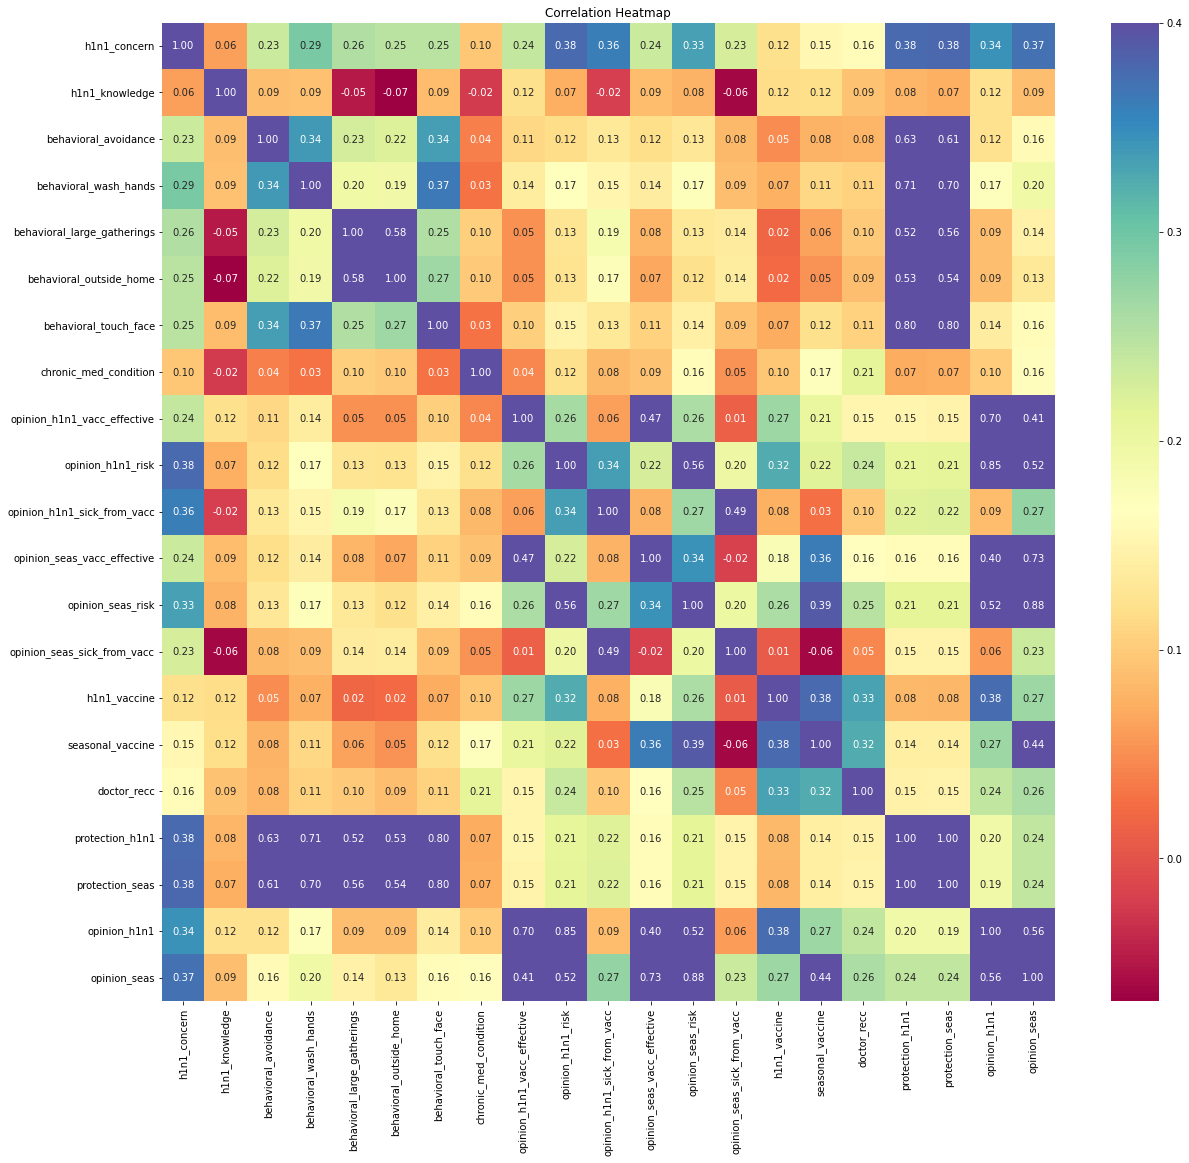

In [ ]:
# show correlation matrix after deleting columns
corr_matrix = df_raw.corr()

plt.figure(figsize=(20, 18))  #
sns.heatmap(corr_matrix, vmax=.4, annot=True, fmt=".2f", cmap="Spectral")  
plt.title("Correlation Heatmap")  
plt.show()  

## Combine columns according to EDA

In [ ]:
"""
    Feature fusion aiming at features:
    combine
        'opinion_h1n1_vacc_effective'
        'opinion_h1n1_risk'
        'opinion_h1n1_sick_from_vacc'
    into
        'opinion_h1n1',
        
    combine
        'opinion_seas_vacc_effective'
        'opinion_seas_risk'
        'opinion_seas_sick_from_vacc'
    into 
        'opinion_seas'
"""

# corr_ohve_hv = round(corr_matrix.loc['opinion_h1n1_vacc_effective','h1n1_vaccine'],2)
# corr_ohr_hv = round(corr_matrix.loc['opinion_h1n1_risk','h1n1_vaccine'],2)
# corr_ohsfv_hv =round(corr_matrix.loc['opinion_h1n1_sick_from_vacc','h1n1_vaccine'],2)
# corr_ohve_hv_weight = round(corr_ohve_hv / (corr_ohve_hv + corr_ohr_hv + corr_ohsfv_hv),2)
# corr_ohr_hv_weight = round(corr_ohr_hv / (corr_ohve_hv + corr_ohr_hv + corr_ohsfv_hv),2)
# corr_ohsfv_hv_weight = round(corr_ohsfv_hv / (corr_ohve_hv + corr_ohr_hv + corr_ohsfv_hv),2)
# df_raw['opinion_h1n1'] = df_raw['opinion_h1n1_vacc_effective']*corr_ohve_hv_weight + df_raw['opinion_h1n1_risk']*corr_ohr_hv_weight - df_raw['opinion_h1n1_sick_from_vacc']*corr_ohsfv_hv_weight
# df_raw['opinion_h1n1']
df_raw.drop(['opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc'],axis=1,inplace = True)

# corr_ohve_sv = round(corr_matrix.loc['opinion_seas_vacc_effective','seasonal_vaccine'],2)
# corr_ohr_sv = round(corr_matrix.loc['opinion_seas_risk','seasonal_vaccine'],2)
# corr_ohsfv_sv = round(corr_matrix.loc['opinion_seas_sick_from_vacc','seasonal_vaccine'],2)
# corr_ohve_sv_weight = round(corr_ohve_sv / (corr_ohve_sv + corr_ohr_sv + corr_ohsfv_sv),2) 
# corr_ohr_sv_weight = round(corr_ohr_sv / (corr_ohve_sv + corr_ohr_sv + corr_ohsfv_sv),2)
# corr_ohsfv_sv_weight = round(corr_ohsfv_sv / (corr_ohve_sv + corr_ohr_sv + corr_ohsfv_sv),2)
# df_raw['opinion_seas'] = round(df_raw['opinion_seas_vacc_effective']*corr_ohve_sv_weight + df_raw['opinion_seas_risk']*corr_ohr_sv_weight - df_raw['opinion_seas_sick_from_vacc']*corr_ohsfv_sv_weight,2)
# df_raw['opinion_seas']
df_raw.drop(['opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc'],axis=1,inplace = True)
df_raw.shape

(26707, 22)

In [ ]:
"""
    Feature Grouping at features:
        protection_h1n1 = behavioral_avoidance * 0.18 + behavioral_wash_hands * 0.3 +   behavioral_large_gatherings * 0.095 + behavioral_outside_home * 0.115 + behavioral_touch_face * 0.31
        protection_seas = behavioral_avoidance * 0.16 + behavioral_wash_hands * 0.29 +   behavioral_large_gatherings * 0.13 + behavioral_outside_home * 0.105 + behavioral_touch_face * 0.315
"""
# Calculate the correlation matrix between features and h1n1_vaccine 
# correlation_matrix = df_raw[[ 'behavioral_avoidance', 
#                             'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home',
#                             'behavioral_touch_face', 'h1n1_vaccine']].corr()

# df_raw['protection_h1n1'] =  round( df_raw['behavioral_avoidance']  * 0.18 + df_raw['behavioral_wash_hands'] * 0.3 +  df_raw['behavioral_large_gatherings']  * 0.095  +  df_raw['behavioral_outside_home']  * 0.115 + df_raw['behavioral_touch_face'] * 0.31,3)
# df_raw['protection_h1n1']
# df_raw['protection_seas'] =  round( df_raw['behavioral_avoidance']  * 0.16 + df_raw['behavioral_wash_hands'] * 0.29 +  df_raw['behavioral_large_gatherings']  * 0.13  +  df_raw['behavioral_outside_home']  * 0.105 + df_raw['behavioral_touch_face'] * 0.315 ,3)
# df_raw['protection_seas']

df_raw.drop(['behavioral_avoidance', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face'],axis=1,inplace = True)
df_raw.shape

(26707, 17)

In [ ]:
# there are categorical data
df_raw.corr()

h1n1_concern  h1n1_knowledge  chronic_med_condition  \
h1n1_concern               1.000000        0.062522               0.095162   
h1n1_knowledge             0.062522        1.000000              -0.022602   
chronic_med_condition      0.095162       -0.022602               1.000000   
h1n1_vaccine               0.121929        0.117951               0.095207   
seasonal_vaccine           0.154828        0.120152               0.170174   
doctor_recc                0.159567        0.092068               0.210267   
protection_h1n1            0.377755        0.078585               0.070932   
protection_seas            0.379290        0.073866               0.073852   
opinion_h1n1               0.343667        0.122715               0.100754   
opinion_seas               0.371418        0.088096               0.163274   

                       h1n1_vaccine  seasonal_vaccine  doctor_recc  \
h1n1_concern               0.121929          0.154828     0.159567   
h1n1_knowledge             0.117951          0.120152     0.092068   
chronic_med_condition      0.095207          0.170174     0.210267   
h1n1_vaccine               1.000000          0.377143     0.331712   
seasonal_vaccine           0.377143          1.000000     0.324069   
doctor_recc                0.331712          0.324069     1.000000   
protection_h1n1            0.082370          0.140769     0.145397   
protection_seas            0.081187          0.140677     0.146584   
opinion_h1n1               0.375227          0.268723     0.242116   
opinion_seas               0.268541          0.443369     0.258156   

                       protection_h1n1  protection_seas  opinion_h1n1  \
h1n1_concern                  0.377755         0.379290      0.343667   
h1n1_knowledge                0.078585         0.073866      0.122715   
chronic_med_condition         0.070932         0.073852      0.100754   
h1n1_vaccine                  0.082370         0.081187      0.375227   
seasonal_vaccine              0.140769         0.140677      0.268723   
doctor_recc                   0.145397         0.146584      0.242116   
protection_h1n1               1.000000         0.998558      0.195051   
protection_seas               0.998558         1.000000      0.193749   
opinion_h1n1                  0.195051         0.193749      1.000000   
opinion_seas                  0.241948         0.242010      0.562145   

                       opinion_seas  
h1n1_concern               0.371418  
h1n1_knowledge             0.088096  
chronic_med_condition      0.163274  
h1n1_vaccine               0.268541  
seasonal_vaccine           0.443369  
doctor_recc                0.258156  
protection_h1n1            0.241948  
protection_seas            0.242010  
opinion_h1n1               0.562145  
opinion_seas               1.000000

 ## Data Processing

In [ ]:
df_copy = df_raw.copy()
df_copy

h1n1_concern  h1n1_knowledge  chronic_med_condition      age_group  \
0               1.0             0.0                    0.0  55 - 64 Years   
1               3.0             2.0                    0.0  35 - 44 Years   
2               1.0             1.0                    1.0  18 - 34 Years   
3               1.0             1.0                    1.0      65+ Years   
4               2.0             1.0                    0.0  45 - 54 Years   
...             ...             ...                    ...            ...   
26702           2.0             0.0                    0.0      65+ Years   
26703           1.0             2.0                    0.0  18 - 34 Years   
26704           2.0             2.0                    0.0  55 - 64 Years   
26705           1.0             1.0                    0.0  18 - 34 Years   
26706           0.0             0.0                    0.0      65+ Years   

              education      race     sex             income_poverty  \
0            < 12 Years     White  Female              Below Poverty   
1              12 Years     White    Male              Below Poverty   
2      College Graduate     White    Male  <= $75,000, Above Poverty   
3              12 Years     White  Female              Below Poverty   
4          Some College     White  Female  <= $75,000, Above Poverty   
...                 ...       ...     ...                        ...   
26702      Some College     White  Female  <= $75,000, Above Poverty   
26703  College Graduate     White    Male  <= $75,000, Above Poverty   
26704      Some College     White  Female                        NaN   
26705      Some College  Hispanic  Female  <= $75,000, Above Poverty   
26706      Some College     White    Male  <= $75,000, Above Poverty   

      marital_status rent_or_own  h1n1_vaccine  seasonal_vaccine  doctor_recc  \
0        Not Married         Own             0                 0          0.0   
1        Not Married        Rent             0                 1          0.0   
2        Not Married         Own             0                 0          NaN   
3        Not Married        Rent             0                 1          0.5   
4            Married         Own             0                 0          0.0   
...              ...         ...           ...               ...          ...   
26702    Not Married         Own             0                 0          0.0   
26703    Not Married        Rent             0                 0          1.0   
26704    Not Married         Own             0                 1          0.0   
26705        Married        Rent             0                 0          0.0   
26706        Married         Own             0                 0          0.0   

       protection_h1n1  protection_seas  opinion_h1n1  opinion_seas  
0                0.425            0.420          1.44          1.79  
1                0.905            0.870          3.44          3.58  
2                0.180            0.160          1.56          2.83  
3                0.575            0.580          2.04          4.97  
4                0.885            0.895          2.40          2.49  
...                ...              ...           ...           ...  
26702            0.295            0.265          1.56          3.92  
26703            0.480            0.450          2.32          3.26  
26704            0.885            0.895          3.28          5.06  
26705              NaN              NaN          1.44          1.79  
26706            0.180            0.160          2.36          3.26  

[26707 rows x 17 columns]

#### using mean to populate numerical variable
#### using mode to populate categorical variable

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   h1n1_concern           26615 non-null  float64
 1   h1n1_knowledge         26591 non-null  float64
 2   chronic_med_condition  25736 non-null  float64
 3   age_group              26707 non-null  object 
 4   education              25300 non-null  object 
 5   race                   26707 non-null  object 
 6   sex                    26707 non-null  object 
 7   income_poverty         22284 non-null  object 
 8   marital_status         25299 non-null  object 
 9   rent_or_own            24665 non-null  object 
 10  h1n1_vaccine           26707 non-null  int64  
 11  seasonal_vaccine       26707 non-null  int64  
 12  doctor_recc            24547 non-null  float64
 13  protection_h1n1        26221 non-null  float64
 14  protection_seas        26221 non-null  float64
 15  op

In [ ]:
df_copy.isnull().sum()

h1n1_concern               92
h1n1_knowledge            116
chronic_med_condition     971
age_group                   0
education                1407
race                        0
sex                         0
income_poverty           4423
marital_status           1408
rent_or_own              2042
h1n1_vaccine                0
seasonal_vaccine            0
doctor_recc              2160
protection_h1n1           486
protection_seas           486
opinion_h1n1              532
opinion_seas              607
dtype: int64

In [ ]:
# choose all null values in a feature 
# df_copy['h1n1_concern'].loc[df_copy['h1n1_concern'].isnull()]
# Aiming at categorical data, choose the mode need to add a max() function to get the real value
# df_copy['age_group'].mode().max()

In [ ]:
for col in df_copy.columns:
    if df_copy[col].isnull().sum() and df_copy[col].dtypes != 'object':
        df_copy[col].loc[(df_copy[col].isnull())] = df_copy[col].median()
for col in df_copy.columns:
    if df_copy[col].isnull().sum() and df_copy[col].dtypes == 'object':
        df_copy[col].loc[(df_copy[col].isnull())] = df_copy[col].mode().max()

/var/folders/5c/z3b6q1rd6wx8671g4nn_l9p80000gn/T/ipykernel_13620/785295911.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[col].loc[(df_copy[col].isnull())] = df_copy[col].median()
/var/folders/5c/z3b6q1rd6wx8671g4nn_l9p80000gn/T/ipykernel_13620/785295911.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[col].loc[(df_copy[col].isnull())] = df_copy[col].mode().max()
/var/folders/5c/z3b6q1rd6wx8671g4nn_l9p80000gn/T/ipykernel_13620/785295911.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

In [ ]:
df_copy.isnull().sum()

h1n1_concern             0
h1n1_knowledge           0
chronic_med_condition    0
age_group                0
education                0
race                     0
sex                      0
income_poverty           0
marital_status           0
rent_or_own              0
h1n1_vaccine             0
seasonal_vaccine         0
doctor_recc              0
protection_h1n1          0
protection_seas          0
opinion_h1n1             0
opinion_seas             0
dtype: int64

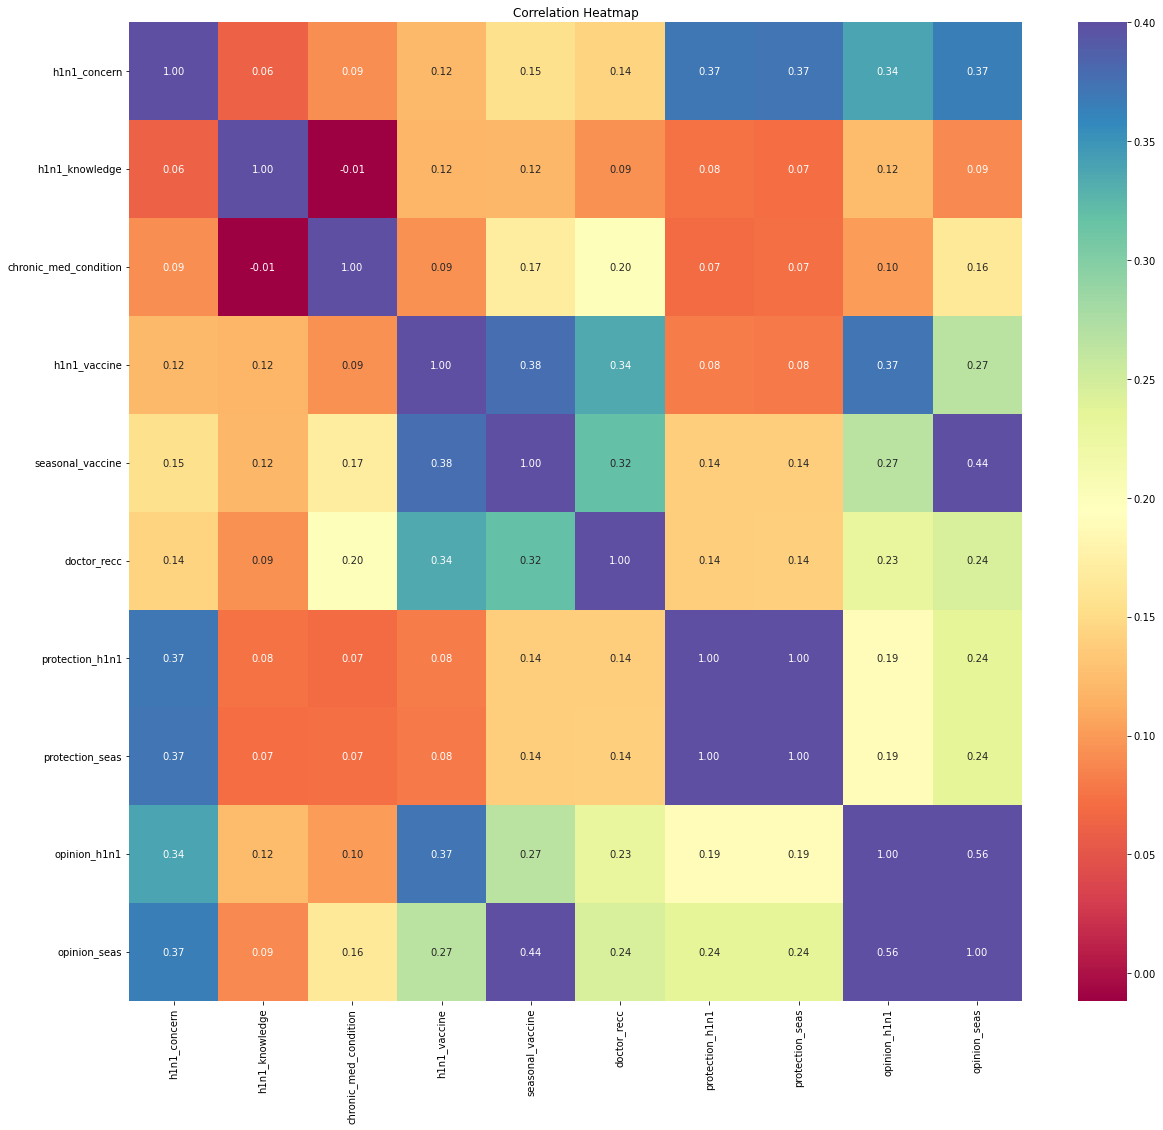

In [ ]:
# Show the correltion matrix for numerical fature after filling null values
corr_matrix = df_copy.corr()

plt.figure(figsize=(20, 18)) 
sns.heatmap(corr_matrix, vmax=.4, annot=True, fmt=".2f", cmap="Spectral")
plt.title("Correlation Heatmap")  
plt.show()  

## Deal With Categorical Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

# create LabelEncoder
encoder = LabelEncoder()

In [ ]:
for col in df_copy.columns:
    if df_copy[col].dtypes == 'object':
        encoded_features = encoder.fit_transform(df_copy[col])
        df_copy[col] = encoded_features

df_copy.iloc[:,3:10]

age_group  education  race  sex  income_poverty  marital_status  \
0              3          1     3    0               2               1   
1              1          0     3    1               2               1   
2              0          2     3    1               0               1   
3              4          0     3    0               2               1   
4              2          3     3    0               0               0   
...          ...        ...   ...  ...             ...             ...   
26702          4          3     3    0               0               1   
26703          0          2     3    1               0               1   
26704          3          3     3    0               0               1   
26705          0          3     1    0               0               0   
26706          4          3     3    1               0               0   

       rent_or_own  
0                0  
1                1  
2                0  
3                1  
4                0  
...            ...  
26702            0  
26703            1  
26704            0  
26705            1  
26706            0  

[26707 rows x 7 columns]

In [ ]:
df_copy

h1n1_concern  h1n1_knowledge  chronic_med_condition  age_group  \
0               1.0             0.0                    0.0          3   
1               3.0             2.0                    0.0          1   
2               1.0             1.0                    1.0          0   
3               1.0             1.0                    1.0          4   
4               2.0             1.0                    0.0          2   
...             ...             ...                    ...        ...   
26702           2.0             0.0                    0.0          4   
26703           1.0             2.0                    0.0          0   
26704           2.0             2.0                    0.0          3   
26705           1.0             1.0                    0.0          0   
26706           0.0             0.0                    0.0          4   

       education  race  sex  income_poverty  marital_status  rent_or_own  \
0              1     3    0               2               1            0   
1              0     3    1               2               1            1   
2              2     3    1               0               1            0   
3              0     3    0               2               1            1   
4              3     3    0               0               0            0   
...          ...   ...  ...             ...             ...          ...   
26702          3     3    0               0               1            0   
26703          2     3    1               0               1            1   
26704          3     3    0               0               1            0   
26705          3     1    0               0               0            1   
26706          3     3    1               0               0            0   

       h1n1_vaccine  seasonal_vaccine  doctor_recc  protection_h1n1  \
0                 0                 0          0.0            0.425   
1                 0                 1          0.0            0.905   
2                 0                 0          0.0            0.180   
3                 0                 1          0.5            0.575   
4                 0                 0          0.0            0.885   
...             ...               ...          ...              ...   
26702             0                 0          0.0            0.295   
26703             0                 0          1.0            0.480   
26704             0                 1          0.0            0.885   
26705             0                 0          0.0            0.790   
26706             0                 0          0.0            0.180   

       protection_seas  opinion_h1n1  opinion_seas  
0                0.420          1.44          1.79  
1                0.870          3.44          3.58  
2                0.160          1.56          2.83  
3                0.580          2.04          4.97  
4                0.895          2.40          2.49  
...                ...           ...           ...  
26702            0.265          1.56          3.92  
26703            0.450          2.32          3.26  
26704            0.895          3.28          5.06  
26705            0.765          1.44          1.79  
26706            0.160          2.36          3.26  

[26707 rows x 17 columns]

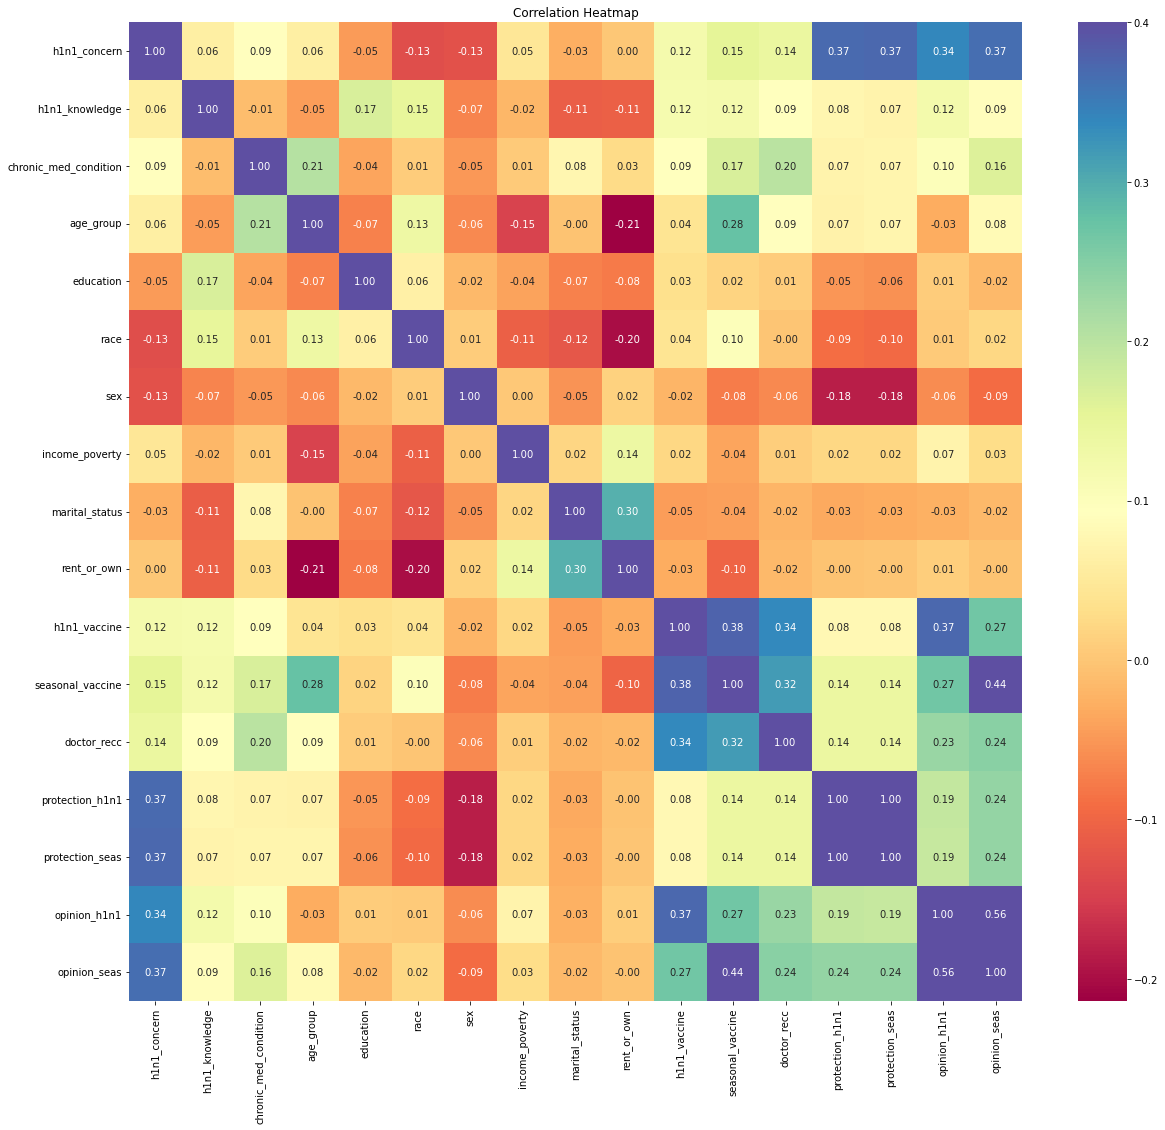

In [ ]:
# Show the correltion matrix for numerical+categorical fature after filling null values
corr_matrix = df_copy.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, vmax=.4, annot=True, fmt=".2f", cmap="Spectral")  
plt.title("Correlation Heatmap")  
plt.show() 

## Modelling(Yifeng Peng)

### split dataframe df_copy into df_target and df_data

In [ ]:
df_target = df_copy[['h1n1_vaccine', 'seasonal_vaccine']]
df_data = df_copy.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
df_data

h1n1_concern  h1n1_knowledge  chronic_med_condition  age_group  \
0               1.0             0.0                    0.0          3   
1               3.0             2.0                    0.0          1   
2               1.0             1.0                    1.0          0   
3               1.0             1.0                    1.0          4   
4               2.0             1.0                    0.0          2   
...             ...             ...                    ...        ...   
26702           2.0             0.0                    0.0          4   
26703           1.0             2.0                    0.0          0   
26704           2.0             2.0                    0.0          3   
26705           1.0             1.0                    0.0          0   
26706           0.0             0.0                    0.0          4   

       education  race  sex  income_poverty  marital_status  rent_or_own  \
0              1     3    0               2               1            0   
1              0     3    1               2               1            1   
2              2     3    1               0               1            0   
3              0     3    0               2               1            1   
4              3     3    0               0               0            0   
...          ...   ...  ...             ...             ...          ...   
26702          3     3    0               0               1            0   
26703          2     3    1               0               1            1   
26704          3     3    0               0               1            0   
26705          3     1    0               0               0            1   
26706          3     3    1               0               0            0   

       doctor_recc  protection_h1n1  protection_seas  opinion_h1n1  \
0              0.0            0.425            0.420          1.44   
1              0.0            0.905            0.870          3.44   
2              0.0            0.180            0.160          1.56   
3              0.5            0.575            0.580          2.04   
4              0.0            0.885            0.895          2.40   
...            ...              ...              ...           ...   
26702          0.0            0.295            0.265          1.56   
26703          1.0            0.480            0.450          2.32   
26704          0.0            0.885            0.895          3.28   
26705          0.0            0.790            0.765          1.44   
26706          0.0            0.180            0.160          2.36   

       opinion_seas  
0              1.79  
1              3.58  
2              2.83  
3              4.97  
4              2.49  
...             ...  
26702          3.92  
26703          3.26  
26704          5.06  
26705          1.79  
26706          3.26  

[26707 rows x 15 columns]

### Decision-Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_data, df_target[['h1n1_vaccine']], test_size=0.3, random_state=42
)

# Train a decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Calculate the accuracy on the test set as a percentage
accuracy = round(model.score(X_test, y_test) * 100, 2)
print("h1n1_vaccine:")
print(f"Accuracy on test set: {accuracy}%")



h1n1_vaccine:
Accuracy on test set: 73.19%


In [ ]:
model.predict(test)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_data, df_target[['seasonal_vaccine']], test_size=0.3, random_state=42
)

# Train a decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Calculate the accuracy on the test set as a percentage
accuracy = round(model.score(X_test, y_test) * 100, 2)
print("seasonal_vaccine:")
print(f"Accuracy on test set: {accuracy}%")



seasonal_vaccine:
Accuracy on test set: 67.65%


### SVC

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target[['h1n1_vaccine']], test_size=0.2, random_state=42)

# Train a SVM model with default kernel
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = clf.predict(X_test)

# Calculate the precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("h1n1_vaccine:")
print("Precision:", precision)
print("Recall:", recall)

/Users/yifengpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


h1n1_vaccine:
Precision: 0.7180156657963447
Recall: 0.24336283185840707


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target[['seasonal_vaccine']], test_size=0.2, random_state=42)

# Train a SVM model with default kernel
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = clf.predict(X_test)

# Calculate the precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("seasonal_vaccine:")
print("Precision:", precision)
print("Recall:", recall)

/Users/yifengpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


seasonal_vaccine:
Precision: 0.7577958137548056
Recall: 0.7237862097103224


# Classification

* Random forest by Xiting Wang
* 10 times running by Xiting Wang
* KNN by yifeng PENG
* Evaluation(ROC and Confusion matrix by yifeng PENG)

In [ ]:
import pandas as pd
data = pd.read_csv('data_pro.csv')

In [ ]:
df_target = data[['h1n1_vaccine', 'seasonal_vaccine']]
df_data = data.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
df_data

h1n1_concern  h1n1_knowledge  chronic_med_condition  age_group  \
0               1.0             0.0                    0.0          3   
1               3.0             2.0                    0.0          1   
2               1.0             1.0                    1.0          0   
3               1.0             1.0                    1.0          4   
4               2.0             1.0                    0.0          2   
...             ...             ...                    ...        ...   
26702           2.0             0.0                    0.0          4   
26703           1.0             2.0                    0.0          0   
26704           2.0             2.0                    0.0          3   
26705           1.0             1.0                    0.0          0   
26706           0.0             0.0                    0.0          4   

       education  race  sex  income_poverty  marital_status  rent_or_own  \
0              1     3    0               3               1            1   
1              0     3    1               3               1            1   
2              2     3    1               1               1            0   
3              0     3    0               3               1            1   
4              3     3    0               1               0            0   
...          ...   ...  ...             ...             ...          ...   
26702          3     3    0               1               1            0   
26703          2     3    1               1               1            1   
26704          3     3    0               0               1            0   
26705          3     1    0               1               0            1   
26706          3     3    1               1               0            0   

       employment_status  protection_h1n1  protection_seas  opinion_h1n1  \
0                      1            0.425            0.420          1.44   
1                      1            0.905            0.870          3.44   
2                      0            0.180            0.160          1.56   
3                      1            0.575            0.580          2.04   
4                      0            0.885            0.895          2.40   
...                  ...              ...              ...           ...   
26702                  0            0.295            0.265          1.56   
26703                  0            0.480            0.450          2.32   
26704                  0            0.885            0.895          3.28   
26705                  0            0.790            0.765          1.44   
26706                  0            0.180            0.160          2.36   

       opinion_seas  doctor_recc  
0              1.79          0.0  
1              3.58          0.0  
2              2.83          0.0  
3              4.97          0.5  
4              2.49          0.0  
...             ...          ...  
26702          3.92          0.0  
26703          3.26          1.0  
26704          5.06          0.0  
26705          1.79          0.0  
26706          3.26          0.0  

[26707 rows x 16 columns]

In [ ]:
df_data.isnull().sum()

h1n1_concern             0
h1n1_knowledge           0
chronic_med_condition    0
age_group                0
education                0
race                     0
sex                      0
income_poverty           0
marital_status           0
rent_or_own              0
employment_status        0
protection_h1n1          0
protection_seas          0
opinion_h1n1             0
opinion_seas             0
doctor_recc              0
dtype: int64

In [ ]:
df_target.isnull().sum()

h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

In [ ]:
import pandas as pd
data_new1 = pd.read_csv('data_FE_AM.csv')

In [ ]:
df_target_new1 = data_new1[['h1n1_vaccine', 'seasonal_vaccine']]
df_data_new1 = data_new1.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
df_data_new1

h1n1_concern  h1n1_knowledge  chronic_med_condition  age_group  \
0               1.0             0.0                    0.0          3   
1               3.0             2.0                    0.0          1   
2               1.0             1.0                    1.0          0   
3               1.0             1.0                    1.0          4   
4               2.0             1.0                    0.0          2   
...             ...             ...                    ...        ...   
26702           2.0             0.0                    0.0          4   
26703           1.0             2.0                    0.0          0   
26704           2.0             2.0                    0.0          3   
26705           1.0             1.0                    0.0          0   
26706           0.0             0.0                    0.0          4   

       education  race  sex  income_poverty  marital_status  rent_or_own  \
0              1     3    0               2               1            0   
1              0     3    1               2               1            1   
2              2     3    1               0               1            0   
3              0     3    0               2               1            1   
4              3     3    0               0               0            0   
...          ...   ...  ...             ...             ...          ...   
26702          3     3    0               0               1            0   
26703          2     3    1               0               1            1   
26704          3     3    0               0               1            0   
26705          3     1    0               0               0            1   
26706          3     3    1               0               0            0   

       doctor_recc  protection_h1n1  protection_seas  opinion_h1n1  \
0              0.0            0.425            0.420          1.44   
1              0.0            0.905            0.870          3.44   
2              0.0            0.180            0.160          1.56   
3              0.5            0.575            0.580          2.04   
4              0.0            0.885            0.895          2.40   
...            ...              ...              ...           ...   
26702          0.0            0.295            0.265          1.56   
26703          1.0            0.480            0.450          2.32   
26704          0.0            0.885            0.895          3.28   
26705          0.0            0.790            0.765          1.44   
26706          0.0            0.180            0.160          2.36   

       opinion_seas  
0              1.79  
1              3.58  
2              2.83  
3              4.97  
4              2.49  
...             ...  
26702          3.92  
26703          3.26  
26704          5.06  
26705          1.79  
26706          3.26  

[26707 rows x 15 columns]

In [ ]:
import pandas as pd
data_new2 = pd.read_csv('data_xFE_AM.csv')

In [ ]:
df_target_new2 = data_new2[['h1n1_vaccine', 'seasonal_vaccine']]
df_data_new2 = data_new2.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
df_data_new2

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0               1.0             0.0                        0.0   
1               3.0             2.0                        0.0   
2               1.0             1.0                        0.0   
3               1.0             1.0                        0.0   
4               2.0             1.0                        0.0   
...             ...             ...                        ...   
26702           2.0             0.0                        0.0   
26703           1.0             2.0                        0.0   
26704           2.0             2.0                        0.0   
26705           1.0             1.0                        0.0   
26706           0.0             0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       0.0                   0.0                    0.0   
1                       1.0                   0.0                    1.0   
2                       1.0                   0.0                    0.0   
3                       1.0                   0.0                    1.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26702                   1.0                   0.0                    0.0   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              0.0                      1.0   
1                              0.0                      1.0   
2                              0.0                      0.0   
3                              1.0                      0.0   
4                              1.0                      0.0   
...                            ...                      ...   
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  doctor_recc_h1n1  ...  income_poverty  \
0                        1.0               0.0  ...               2   
1                        1.0               0.0  ...               2   
2                        0.0               0.0  ...               0   
3                        0.0               0.0  ...               2   
4                        1.0               0.0  ...               0   
...                      ...               ...  ...             ...   
26702                    0.0               0.0  ...               0   
26703                    0.0               1.0  ...               0   
26704                    1.0               0.0  ...               0   
26705                    1.0               0.0  ...               0   
26706                    0.0               0.0  ...               0   

       marital_status  rent_or_own  employment_status  hhs_geo_region  \
0                   1            0                  1               8   
1                   1            1                  0               1   
2                   1            0                  0               9   
3                   1            1                  1               5   
4                   0            0                  0               9   
...               ...          ...                ...             ...   
26702               1            0                  1               9   
26703               1            1                  0               6   
26704               1            0

# Define function to draw Confusion Matrix and ROC curve for models

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def draw_cm_roc(model, X_test):
    # forecast the outcome
    y_pred = model.predict(X_test)

    # calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # calculate the aomount of TP FP TN FN
    tn, fp, fn, tp = cm.ravel()

    # calculate  R(TP),R(FP),R(TN),R(FN) adn F1 score
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)

    # calculate false positive rate and true positive rate of ROC curve 
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # calculate AUC (area under ROC curve)
    auc = roc_auc_score(y_test, y_pred)

    # draw ROC curve
    plt.plot(fpr, tpr, label="ROC Curve (AUC = %0.2f)" % auc)
    plt.plot([0, 1], [0, 1], "r--")
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic")
    plt.legend(loc="lower right")
    plt.show()

# H1N1 Prediction

## Include low-dimention Features

### KNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target['h1n1_vaccine'], test_size=0.3, random_state=42)

# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = knn.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.787220766254836


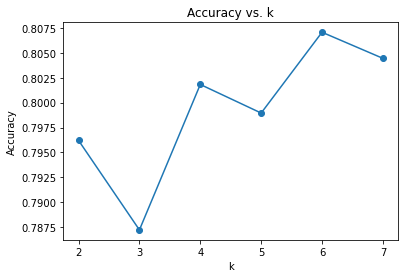

In [ ]:
# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target['h1n1_vaccine'], test_size=0.3, random_state=42)

# Define the range of k values
k_values = np.arange(2, 8)

# Store accuracy scores for each k value
accuracy_scores = []

# Iterate over different k values
for k in k_values:
    # Create a KNN classifier object with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model on the training data
    knn.fit(X_train, y_train)

    # Predict the labels for the test data
    y_pred = knn.predict(X_test)

    # Calculate accuracy and store the score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the relationship between k and accuracy
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k')
plt.xticks(k_values)
plt.show()

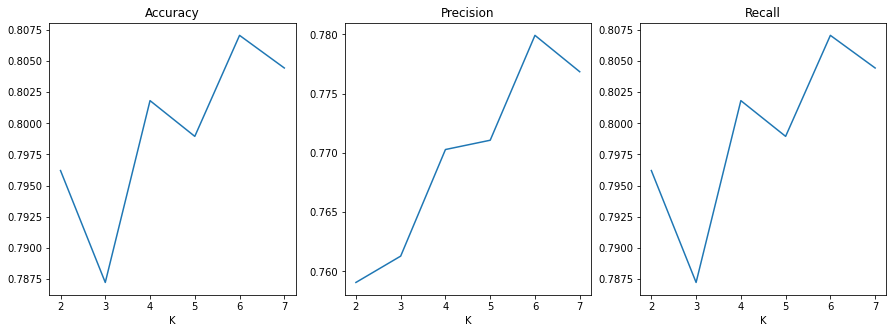

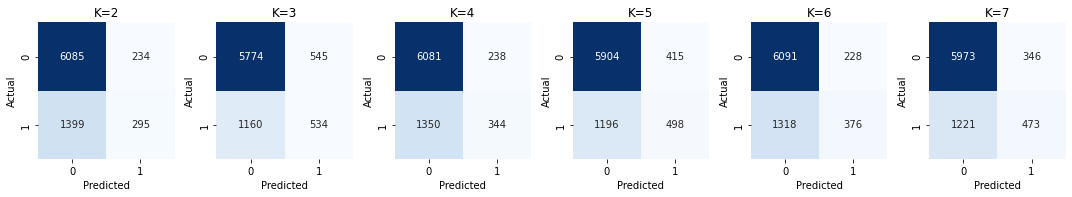

In [ ]:
# Define range of K values to try
k_values = range(2, 8)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target['h1n1_vaccine'], test_size=0.3, random_state=42)

# Initialize arrays to store evaluation metrics
accuracy = np.zeros(len(k_values))
precision = np.zeros(len(k_values))
recall = np.zeros(len(k_values))
conf_matrices = []

# Perform KNN classification for each value of K
for i, k in enumerate(k_values):
    # Fit KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    knn.fit(X_train, y_train)
    
    # Make predictions on test set
    y_pred = knn.predict(X_test)
    
    # Compute evaluation metrics
    accuracy[i] = accuracy_score(y_test, y_pred)
    precision[i] = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall[i] = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    conf_matrices.append(confusion_matrix(y_test, y_pred, labels=[0,1]))
    
# Plot evaluation metrics as a function of K
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(k_values, accuracy)
axs[0].set_title('Accuracy')

axs[1].plot(k_values, precision)
axs[1].set_title('Precision')

axs[2].plot(k_values, recall)
axs[2].set_title('Recall')

for ax in axs:
    ax.set_xlabel('K')
    ax.set_xticks(k_values)

# Plot confusion matrices
fig, axs = plt.subplots(1, len(k_values), figsize=(15, 3))
axis_labels = [0,1] # labels for axis
for i, conf_matrix in enumerate(conf_matrices):
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axs[i], cbar=False, square=True, xticklabels=axis_labels, yticklabels=axis_labels)
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Actual')
    axs[i].set_title(f'K={k_values[i]}')

plt.tight_layout()
plt.show()


### Choose K=6 to calculate confusion matrix and ROC curve

*****H1N1 Vaccine*****
Confusion Matrix:
[[6091  228]
 [1318  376]]
Accuracy: 0.8070635217771122
Precision: 0.6225165562913907
Recall: 0.22195985832349469
F1 Score: 0.32724107919930373


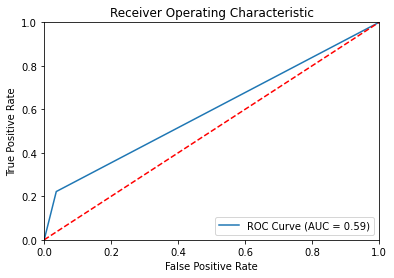

In [ ]:
# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model on the training data
knn.fit(X_train, y_train)

print("*****H1N1 Vaccine*****")
draw_cm_roc(knn, X_test)

### Random Forest

/var/folders/5c/z3b6q1rd6wx8671g4nn_l9p80000gn/T/ipykernel_73644/2660914884.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


*****H1N1 Vaccine*****
Confusion Matrix:
[[5951  368]
 [1089  605]]
Accuracy: 0.8181704729814052
Precision: 0.6217882836587872
Recall: 0.35714285714285715
F1 Score: 0.45369328833895767


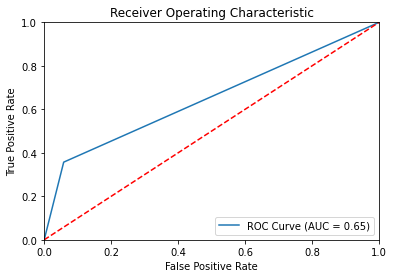

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_data, df_target[['h1n1_vaccine']], test_size=0.3, random_state=42
)

# Train a decision tree model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# # Calculate the accuracy on the test set as a percentage
# accuracy = round(model.score(X_test, y_test) * 100, 2)
# print("h1n1_vaccine:")
# print(f"Accuracy on test set: {accuracy}%")

print("*****H1N1 Vaccine*****")
draw_cm_roc(model, X_test)

### Run for 10 times

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split( df_data, df_target[['h1n1_vaccine']], test_size=0.3)

# Define the classifiers
classifiers = [
    KNeighborsClassifier(n_neighbors=6),
    RandomForestClassifier()
]

# Define the number of iterations
n_iterations = 10

# Store accuracy scores for each classifier
accuracy_scores = []

# Run multiple iterations for each classifier
for classifier in classifiers:
    scores = []
    for _ in range(n_iterations):
        # Fit the model on the training data
        classifier.fit(X_train, y_train)

        # Predict the labels for the test data
        y_pred = classifier.predict(X_test)

        # Calculate accuracy and store the score
        accuracy = accuracy_score(y_test, y_pred)
        scores.append(accuracy)
    
    # Calculate the average accuracy for the classifier
    average_accuracy = np.mean(scores)
    
    # Store the average accuracy score
    accuracy_scores.append(average_accuracy)

# Create a small table to display the average accuracy scores
table_data = {
    'Classifier': ['KNN', 'Random Forest'],
    'Average Accuracy': accuracy_scores
}

df = pd.DataFrame(table_data)
print(df)


/Users/yifengpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/yifengpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/yifengpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/yifengpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed 

      Classifier  Average Accuracy
0            KNN          0.801947
1  Random Forest          0.825184


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split( df_data_new1, df_target_new1[['h1n1_vaccine']], test_size=0.3)

# Define the classifiers
classifiers = [
    KNeighborsClassifier(n_neighbors=7),
    RandomForestClassifier()
]

# Define the number of iterations
n_iterations = 10

# Store accuracy scores for each classifier
accuracy_scores = []

# Run multiple iterations for each classifier
for classifier in classifiers:
    scores = []
    for _ in range(n_iterations):
        # Fit the model on the training data
        classifier.fit(X_train, y_train)

        # Predict the labels for the test data
        y_pred = classifier.predict(X_test)

        # Calculate accuracy and store the score
        accuracy = accuracy_score(y_test, y_pred)
        scores.append(accuracy)
    
    # Calculate the average accuracy for the classifier
    average_accuracy = np.mean(scores)
    
    # Store the average accuracy score
    accuracy_scores.append(average_accuracy)

# Create a small table to display the average accuracy scores
table_data = {
    'Classifier': ['KNN', 'Random Forest'],
    'Average Accuracy': accuracy_scores
}

df = pd.DataFrame(table_data)
print(df)

d:\python\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\python\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\python\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\python\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


      Classifier  Average Accuracy
0            KNN          0.797829
1  Random Forest          0.818882


## Include all features

### Without New Features

In [ ]:
data1 = pd.read_csv('data_nofusion.csv')

In [ ]:
df_target1 = data1[['h1n1_vaccine', 'seasonal_vaccine']]
df_data1 = data1.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
df_data1

h1n1_concern  h1n1_knowledge  behavioral_avoidance  \
0               1.0             0.0                   0.0   
1               3.0             2.0                   1.0   
2               1.0             1.0                   1.0   
3               1.0             1.0                   1.0   
4               2.0             1.0                   1.0   
...             ...             ...                   ...   
26702           2.0             0.0                   1.0   
26703           1.0             2.0                   1.0   
26704           2.0             2.0                   1.0   
26705           1.0             1.0                   0.0   
26706           0.0             0.0                   1.0   

       behavioral_wash_hands  behavioral_large_gatherings  \
0                        0.0                          0.0   
1                        1.0                          0.0   
2                        0.0                          0.0   
3                        1.0                          1.0   
4                        1.0                          1.0   
...                      ...                          ...   
26702                    0.0                          0.0   
26703                    1.0                          0.0   
26704                    1.0                          1.0   
26705                    0.0                          0.0   
26706                    0.0                          0.0   

       behavioral_outside_home  behavioral_touch_face  doctor_recc_h1n1  \
0                          1.0                    1.0               0.0   
1                          1.0                    1.0               0.0   
2                          0.0                    0.0               0.0   
3                          0.0                    0.0               0.0   
4                          0.0                    1.0               0.0   
...                        ...                    ...               ...   
26702                      1.0                    0.0               0.0   
26703                      0.0                    0.0               1.0   
26704                      0.0                    1.0               0.0   
26705                      0.0                    1.0               0.0   
26706                      0.0                    0.0               0.0   

       doctor_recc_seasonal  chronic_med_condition  ...  opinion_seas_risk  \
0                       0.0                    0.0  ...                1.0   
1                       0.0                    0.0  ...                2.0   
2                       0.0                    1.0  ...                1.0   
3                       1.0                    1.0  ...                4.0   
4                       0.0                    0.0  ...                1.0   
...                     ...                    ...  ...                ...   
26702                   0.0                    0.0  ...                2.0   
26703                   1.0                    0.0  ...                1.0   
26704                   0.0                    0.0  ...                4.0   
26705                   0.0                    0.0  ...                1.0   
26706                   0.0                    0.0  ...                1.0   

       opinion_seas_sick_from_vacc  age_group  education  race  sex  \
0                              2.0          3          1     3    0   
1                              4.0          1          0     3    1   
2                              2.0          0          2     3    1   
3                              1.0          4          0     3    0   
4                              4.0          2          3     3    0   
...                            ...        ...        ...   ...  ...   
26702                          2.0          4          3     3    0   
26703                          1.0          0          2     3    1   
26704                          2.0          3          3     3  

#### KNN

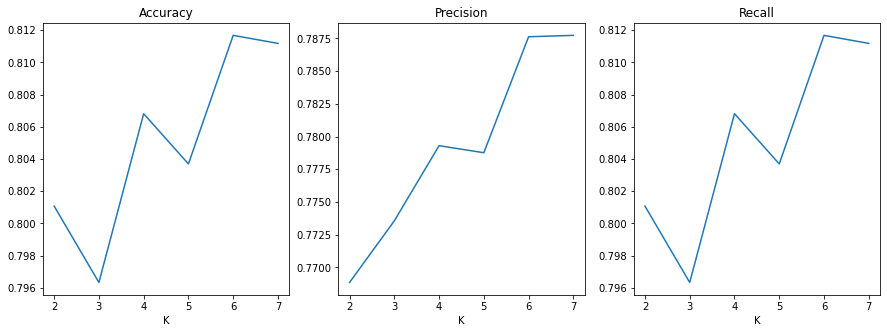

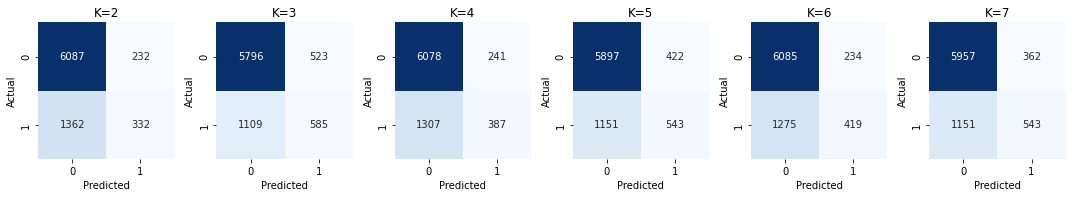

In [ ]:
# Define range of K values to try
k_values = range(2, 8)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_data1, df_target1['h1n1_vaccine'], test_size=0.3, random_state=42)

# Initialize arrays to store evaluation metrics
accuracy = np.zeros(len(k_values))
precision = np.zeros(len(k_values))
recall = np.zeros(len(k_values))
conf_matrices = []

# Perform KNN classification for each value of K
for i, k in enumerate(k_values):
    # Fit KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    knn.fit(X_train, y_train)
    
    # Make predictions on test set
    y_pred = knn.predict(X_test)
    
    # Compute evaluation metrics
    accuracy[i] = accuracy_score(y_test, y_pred)
    precision[i] = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall[i] = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    conf_matrices.append(confusion_matrix(y_test, y_pred, labels=[0,1]))
    
# Plot evaluation metrics as a function of K
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(k_values, accuracy)
axs[0].set_title('Accuracy')

axs[1].plot(k_values, precision)
axs[1].set_title('Precision')

axs[2].plot(k_values, recall)
axs[2].set_title('Recall')

for ax in axs:
    ax.set_xlabel('K')
    ax.set_xticks(k_values)

# Plot confusion matrices
fig, axs = plt.subplots(1, len(k_values), figsize=(15, 3))
axis_labels = [0,1] # labels for axis
for i, conf_matrix in enumerate(conf_matrices):
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axs[i], cbar=False, square=True, xticklabels=axis_labels, yticklabels=axis_labels)
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Actual')
    axs[i].set_title(f'K={k_values[i]}')

plt.tight_layout()
plt.show()

### Choose K=7 to calculate confusion matrix and ROC curve

*****H1N1 Vaccine*****
Confusion Matrix:
[[6085  234]
 [1275  419]]
Accuracy: 0.811681018345189
Precision: 0.6416539050535988
Recall: 0.2473435655253837
F1 Score: 0.35705155517682147


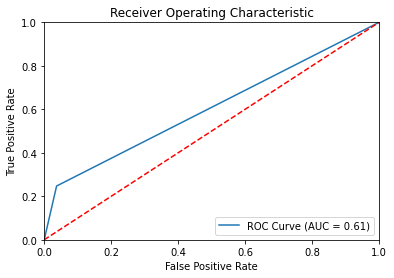

In [ ]:
# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the model on the training data
knn.fit(X_train, y_train)

print("*****H1N1 Vaccine*****")
draw_cm_roc(knn, X_test)

#### Random Forest

/var/folders/5c/z3b6q1rd6wx8671g4nn_l9p80000gn/T/ipykernel_73644/2849740294.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


*****H1N1 Vaccine*****
Confusion Matrix:
[[3997  215]
 [ 690  440]]
Accuracy: 0.8305877948333957
Precision: 0.6717557251908397
Recall: 0.3893805309734513
F1 Score: 0.4929971988795519


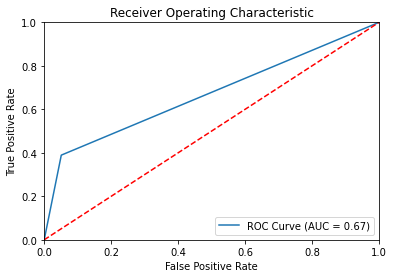

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_data1, df_target1[['h1n1_vaccine']], test_size=0.2, random_state=42
)

# Train a decision tree model
model = RandomForestClassifier()
model.fit(X_train, y_train)

print("*****H1N1 Vaccine*****")
draw_cm_roc(model, X_test)

#### Run for 10 times

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# Assuming X and y are your feature matrix and target vector, respectively

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split( df_data1, df_target1[['h1n1_vaccine']], test_size=0.3)

# Define the classifiers
classifiers = [
    KNeighborsClassifier(n_neighbors=7),
    RandomForestClassifier()
]

# Define the number of iterations
n_iterations = 10

# Store accuracy scores for each classifier
accuracy_scores = []

# Run multiple iterations for each classifier
for classifier in classifiers:
    scores = []
    for _ in range(n_iterations):
        # Fit the model on the training data
        classifier.fit(X_train, y_train)

        # Predict the labels for the test data
        y_pred = classifier.predict(X_test)

        # Calculate accuracy and store the score
        accuracy = accuracy_score(y_test, y_pred)
        scores.append(accuracy)
    
    # Calculate the average accuracy for the classifier
    average_accuracy = np.mean(scores)
    
    # Store the average accuracy score
    accuracy_scores.append(average_accuracy)

# Create a small table to display the average accuracy scores
table_data = {
    'Classifier': ['KNN', 'Random Forest'],
    'Average Accuracy': accuracy_scores
}

df = pd.DataFrame(table_data)
print(df)

/Users/yifengpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/yifengpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/yifengpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/yifengpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed 

      Classifier  Average Accuracy
0            KNN          0.814177
1  Random Forest          0.833833


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split( df_data_new2, df_target_new2[['h1n1_vaccine']], test_size=0.3)

# Define the classifiers
classifiers = [
    KNeighborsClassifier(n_neighbors=7),
    RandomForestClassifier()
]

# Define the number of iterations
n_iterations = 10

# Store accuracy scores for each classifier
accuracy_scores = []

# Run multiple iterations for each classifier
for classifier in classifiers:
    scores = []
    for _ in range(n_iterations):
        # Fit the model on the training data
        classifier.fit(X_train, y_train)

        # Predict the labels for the test data
        y_pred = classifier.predict(X_test)

        # Calculate accuracy and store the score
        accuracy = accuracy_score(y_test, y_pred)
        scores.append(accuracy)
    
    # Calculate the average accuracy for the classifier
    average_accuracy = np.mean(scores)
    
    # Store the average accuracy score
    accuracy_scores.append(average_accuracy)

# Create a small table to display the average accuracy scores
table_data = {
    'Classifier': ['KNN', 'Random Forest'],
    'Average Accuracy': accuracy_scores
}

df = pd.DataFrame(table_data)
print(df)

d:\python\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\python\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\python\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\python\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


      Classifier  Average Accuracy
0            KNN          0.808187
1  Random Forest          0.838225


### With New Features

In [ ]:
data2 = pd.read_csv('data_yesfusion.csv')

In [ ]:
df_target2 = data2[['h1n1_vaccine', 'seasonal_vaccine']]
df_data2 = data2.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
df_data2

h1n1_concern  h1n1_knowledge  behavioral_avoidance  \
0               1.0             0.0                   0.0   
1               3.0             2.0                   1.0   
2               1.0             1.0                   1.0   
3               1.0             1.0                   1.0   
4               2.0             1.0                   1.0   
...             ...             ...                   ...   
26702           2.0             0.0                   1.0   
26703           1.0             2.0                   1.0   
26704           2.0             2.0                   1.0   
26705           1.0             1.0                   0.0   
26706           0.0             0.0                   1.0   

       behavioral_wash_hands  behavioral_large_gatherings  \
0                        0.0                          0.0   
1                        1.0                          0.0   
2                        0.0                          0.0   
3                        1.0                          1.0   
4                        1.0                          1.0   
...                      ...                          ...   
26702                    0.0                          0.0   
26703                    1.0                          0.0   
26704                    1.0                          1.0   
26705                    0.0                          0.0   
26706                    0.0                          0.0   

       behavioral_outside_home  behavioral_touch_face  doctor_recc_h1n1  \
0                          1.0                    1.0               0.0   
1                          1.0                    1.0               0.0   
2                          0.0                    0.0               0.0   
3                          0.0                    0.0               0.0   
4                          0.0                    1.0               0.0   
...                        ...                    ...               ...   
26702                      1.0                    0.0               0.0   
26703                      0.0                    0.0               1.0   
26704                      0.0                    1.0               0.0   
26705                      0.0                    1.0               0.0   
26706                      0.0                    0.0               0.0   

       doctor_recc_seasonal  chronic_med_condition  ...  sex  income_poverty  \
0                       0.0                    0.0  ...    0               3   
1                       0.0                    0.0  ...    1               3   
2                       0.0                    1.0  ...    1               1   
3                       1.0                    1.0  ...    0               3   
4                       0.0                    0.0  ...    0               1   
...                     ...                    ...  ...  ...             ...   
26702                   0.0                    0.0  ...    0               1   
26703                   1.0                    0.0  ...    1               1   
26704                   0.0                    0.0  ...    0               0   
26705                   0.0                    0.0  ...    0               1   
26706                   0.0                    0.0  ...    1               1   

       marital_status  rent_or_own  employment_status  protection_h1n1  \
0                   1            1                  1            0.425   
1                   1            1                  1            0.905   
2                   1            0                  0            0.180   
3                   1            1                  1            0.575   
4                   0            0                  0            0.885   
...               ...          ...                ...              ...   
26702               1            0                  0            0.295   
26703               1            1                  0            0.480   
26704        

#### KNN

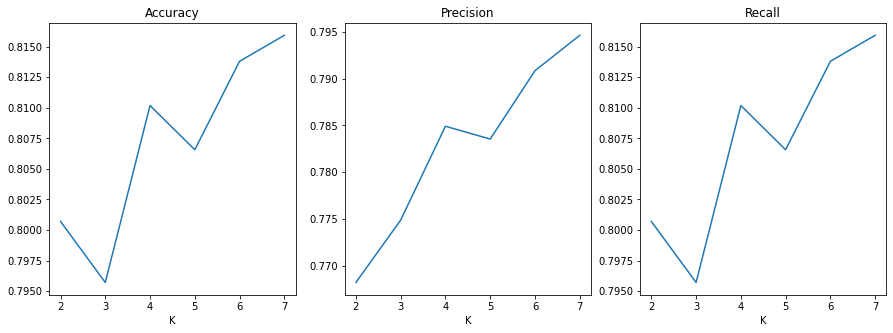

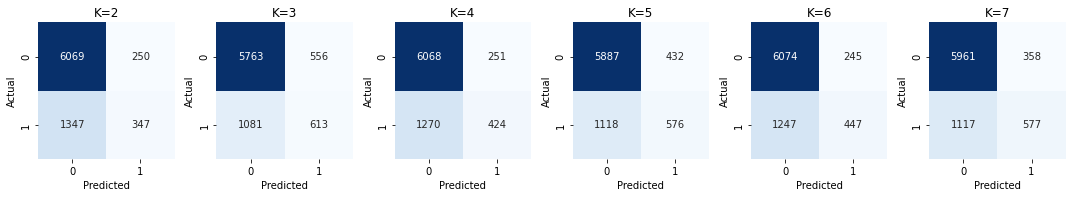

In [ ]:
# Define range of K values to try
k_values = range(2, 8)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_data2, df_target2['h1n1_vaccine'], test_size=0.3, random_state=42)

# Initialize arrays to store evaluation metrics
accuracy = np.zeros(len(k_values))
precision = np.zeros(len(k_values))
recall = np.zeros(len(k_values))
conf_matrices = []

# Perform KNN classification for each value of K
for i, k in enumerate(k_values):
    # Fit KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    knn.fit(X_train, y_train)
    
    # Make predictions on test set
    y_pred = knn.predict(X_test)
    
    # Compute evaluation metrics
    accuracy[i] = accuracy_score(y_test, y_pred)
    precision[i] = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall[i] = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    conf_matrices.append(confusion_matrix(y_test, y_pred, labels=[0,1]))
    
# Plot evaluation metrics as a function of K
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(k_values, accuracy)
axs[0].set_title('Accuracy')

axs[1].plot(k_values, precision)
axs[1].set_title('Precision')

axs[2].plot(k_values, recall)
axs[2].set_title('Recall')

for ax in axs:
    ax.set_xlabel('K')
    ax.set_xticks(k_values)

# Plot confusion matrices
fig, axs = plt.subplots(1, len(k_values), figsize=(15, 3))
axis_labels = [0,1] # labels for axis
for i, conf_matrix in enumerate(conf_matrices):
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axs[i], cbar=False, square=True, xticklabels=axis_labels, yticklabels=axis_labels)
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Actual')
    axs[i].set_title(f'K={k_values[i]}')

plt.tight_layout()
plt.show()


### Choose K=7 to calculate confusion matrix and ROC curv

*****H1N1 Vaccine*****
Confusion Matrix:
[[6074  245]
 [1247  447]]
Accuracy: 0.8138025708224136
Precision: 0.6459537572254336
Recall: 0.26387249114521844
F1 Score: 0.374685666387259


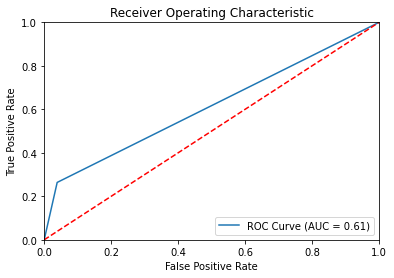

In [ ]:
# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the model on the training data
knn.fit(X_train, y_train)

print("*****H1N1 Vaccine*****")
draw_cm_roc(knn, X_test)

#### Random Forest

/var/folders/5c/z3b6q1rd6wx8671g4nn_l9p80000gn/T/ipykernel_73644/452081409.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


*****H1N1 Vaccine*****
Confusion Matrix:
[[3980  232]
 [ 675  455]]
Accuracy: 0.8302134032197679
Precision: 0.6622998544395924
Recall: 0.4026548672566372
F1 Score: 0.5008255365987893


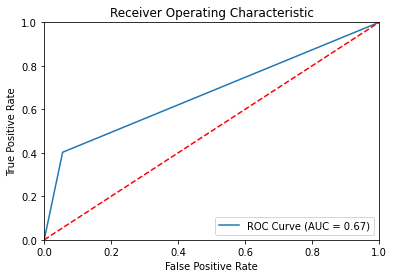

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_data2, df_target2[['h1n1_vaccine']], test_size=0.2, random_state=42
)

# Train a decision tree model
model = RandomForestClassifier()
model.fit(X_train, y_train)

print("*****H1N1 Vaccine*****")
draw_cm_roc(model, X_test)

#### Run for 10 times

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# Assuming X and y are your feature matrix and target vector, respectively

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split( df_data2, df_target2[['h1n1_vaccine']], test_size=0.3)

# Define the classifiers
classifiers = [
    KNeighborsClassifier(n_neighbors=7),
    RandomForestClassifier()
]

# Define the number of iterations
n_iterations = 10

# Store accuracy scores for each classifier
accuracy_scores = []

# Run multiple iterations for each classifier
for classifier in classifiers:
    scores = []
    for _ in range(n_iterations):
        # Fit the model on the training data
        classifier.fit(X_train, y_train)

        # Predict the labels for the test data
        y_pred = classifier.predict(X_test)

        # Calculate accuracy and store the score
        accuracy = accuracy_score(y_test, y_pred)
        scores.append(accuracy)
    
    # Calculate the average accuracy for the classifier
    average_accuracy = np.mean(scores)
    
    # Store the average accuracy score
    accuracy_scores.append(average_accuracy)

# Create a small table to display the average accuracy scores
table_data = {
    'Classifier': ['KNN', 'Random Forest'],
    'Average Accuracy': accuracy_scores
}

df = pd.DataFrame(table_data)
print(df)

/Users/yifengpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/yifengpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/yifengpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/yifengpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed 

      Classifier  Average Accuracy
0            KNN          0.814926
1  Random Forest          0.830451


# SEASONAL Prediction

## Include low-dimention Features

### KNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target['seasonal_vaccine'], test_size=0.3, random_state=42)

# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = knn.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7059777860975914


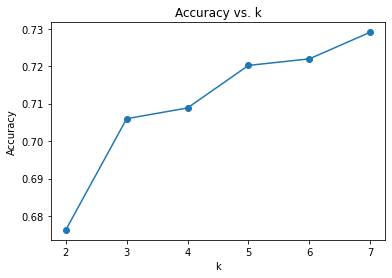

In [ ]:
# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target['seasonal_vaccine'], test_size=0.3, random_state=42)

# Define the range of k values
k_values = np.arange(2, 8)

# Store accuracy scores for each k value
accuracy_scores = []

# Iterate over different k values
for k in k_values:
    # Create a KNN classifier object with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model on the training data
    knn.fit(X_train, y_train)

    # Predict the labels for the test data
    y_pred = knn.predict(X_test)

    # Calculate accuracy and store the score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the relationship between k and accuracy
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k')
plt.xticks(k_values)
plt.show()

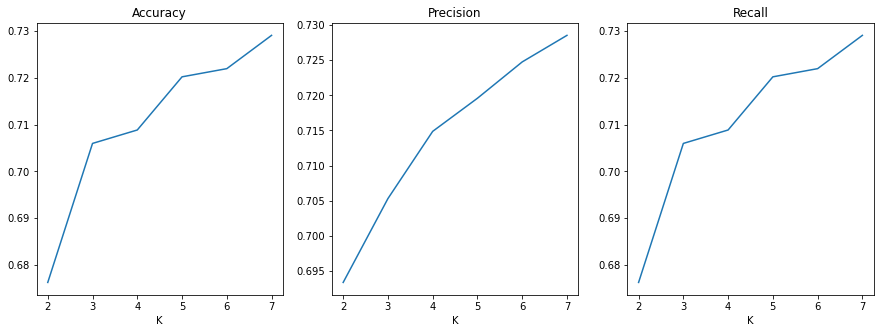

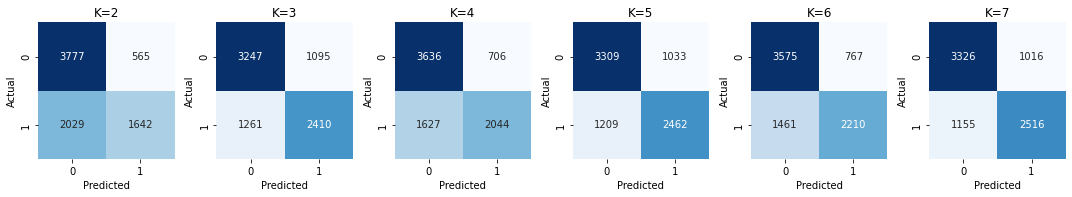

In [ ]:
# Define range of K values to try
k_values = range(2, 8)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target['seasonal_vaccine'], test_size=0.3, random_state=42)

# Initialize arrays to store evaluation metrics
accuracy = np.zeros(len(k_values))
precision = np.zeros(len(k_values))
recall = np.zeros(len(k_values))
conf_matrices = []

# Perform KNN classification for each value of K
for i, k in enumerate(k_values):
    # Fit KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    knn.fit(X_train, y_train)
    
    # Make predictions on test set
    y_pred = knn.predict(X_test)
    
    # Compute evaluation metrics
    accuracy[i] = accuracy_score(y_test, y_pred)
    precision[i] = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall[i] = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    conf_matrices.append(confusion_matrix(y_test, y_pred, labels=[0,1]))
    
# Plot evaluation metrics as a function of K
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(k_values, accuracy)
axs[0].set_title('Accuracy')

axs[1].plot(k_values, precision)
axs[1].set_title('Precision')

axs[2].plot(k_values, recall)
axs[2].set_title('Recall')

for ax in axs:
    ax.set_xlabel('K')
    ax.set_xticks(k_values)

# Plot confusion matrices
fig, axs = plt.subplots(1, len(k_values), figsize=(15, 3))
axis_labels = [0,1] # labels for axis
for i, conf_matrix in enumerate(conf_matrices):
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axs[i], cbar=False, square=True, xticklabels=axis_labels, yticklabels=axis_labels)
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Actual')
    axs[i].set_title(f'K={k_values[i]}')

plt.tight_layout()
plt.show()


### Choose K=7 to calculate confusion matrix and ROC curv

*****H1N1 Vaccine*****
Confusion Matrix:
[[3326 1016]
 [1155 2516]]
Accuracy: 0.7290652689379757
Precision: 0.7123442808607021
Recall: 0.6853718332879325
F1 Score: 0.6985978064695266


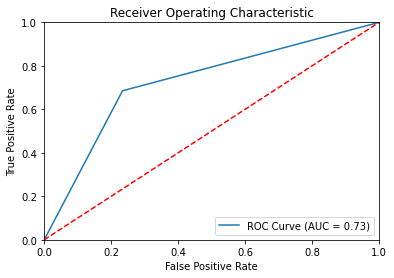

In [ ]:
# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the model on the training data
knn.fit(X_train, y_train)

print("*****Seasonal Vaccine*****")
draw_cm_roc(knn, X_test)

### Random Forest

/var/folders/5c/z3b6q1rd6wx8671g4nn_l9p80000gn/T/ipykernel_73644/580067991.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


*****H1N1 Vaccine*****
Confusion Matrix:
[[3419  923]
 [ 980 2691]]
Accuracy: 0.7625109197553975
Precision: 0.7446043165467626
Recall: 0.7330427676382457
F1 Score: 0.7387783115991763


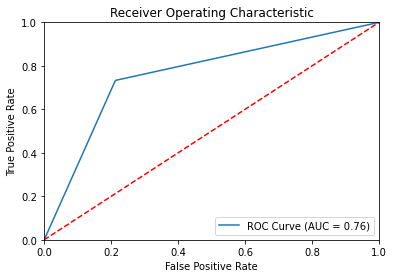

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_data, df_target[['seasonal_vaccine']], test_size=0.3, random_state=42
)

# Train a decision tree model
model = RandomForestClassifier()
model.fit(X_train, y_train)

print("*****Seasonal Vaccine*****")
draw_cm_roc(model, X_test)

### Run for 10 times

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split( df_data, df_target[['seasonal_vaccine']], test_size=0.3)

# Define the classifiers
classifiers = [
    KNeighborsClassifier(n_neighbors=7),
    RandomForestClassifier()
]

# Define the number of iterations
n_iterations = 10

# Store accuracy scores for each classifier
accuracy_scores = []

# Run multiple iterations for each classifier
for classifier in classifiers:
    scores = []
    for _ in range(n_iterations):
        # Fit the model on the training data
        classifier.fit(X_train, y_train)

        # Predict the labels for the test data
        y_pred = classifier.predict(X_test)

        # Calculate accuracy and store the score
        accuracy = accuracy_score(y_test, y_pred)
        scores.append(accuracy)
    
    # Calculate the average accuracy for the classifier
    average_accuracy = np.mean(scores)
    
    # Store the average accuracy score
    accuracy_scores.append(average_accuracy)

# Create a small table to display the average accuracy scores
table_data = {
    'Classifier': ['KNN', 'Random Forest'],
    'Average Accuracy': accuracy_scores
}

df = pd.DataFrame(table_data)
print(df)


/Users/yifengpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/yifengpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/yifengpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/yifengpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed 

      Classifier  Average Accuracy
0            KNN          0.723075
1  Random Forest          0.754561


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split( df_data_new1, df_target_new1[['seasonal_vaccine']], test_size=0.3)

# Define the classifiers
classifiers = [
    KNeighborsClassifier(n_neighbors=7),
    RandomForestClassifier()
]

# Define the number of iterations
n_iterations = 10

# Store accuracy scores for each classifier
accuracy_scores = []

# Run multiple iterations for each classifier
for classifier in classifiers:
    scores = []
    for _ in range(n_iterations):
        # Fit the model on the training data
        classifier.fit(X_train, y_train)

        # Predict the labels for the test data
        y_pred = classifier.predict(X_test)

        # Calculate accuracy and store the score
        accuracy = accuracy_score(y_test, y_pred)
        scores.append(accuracy)
    
    # Calculate the average accuracy for the classifier
    average_accuracy = np.mean(scores)
    
    # Store the average accuracy score
    accuracy_scores.append(average_accuracy)

# Create a small table to display the average accuracy scores
table_data = {
    'Classifier': ['KNN', 'Random Forest'],
    'Average Accuracy': accuracy_scores
}

df = pd.DataFrame(table_data)
print(df)

d:\python\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\python\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\python\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\python\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


      Classifier  Average Accuracy
0            KNN          0.736179
1  Random Forest          0.764395


## Include all features

### Without New Features

In [ ]:
data1 = pd.read_csv('data_nofusion.csv')

In [ ]:
df_target1 = data1[['h1n1_vaccine', 'seasonal_vaccine']]
df_data1 = data1.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
df_data1

h1n1_concern  h1n1_knowledge  behavioral_avoidance  \
0               1.0             0.0                   0.0   
1               3.0             2.0                   1.0   
2               1.0             1.0                   1.0   
3               1.0             1.0                   1.0   
4               2.0             1.0                   1.0   
...             ...             ...                   ...   
26702           2.0             0.0                   1.0   
26703           1.0             2.0                   1.0   
26704           2.0             2.0                   1.0   
26705           1.0             1.0                   0.0   
26706           0.0             0.0                   1.0   

       behavioral_wash_hands  behavioral_large_gatherings  \
0                        0.0                          0.0   
1                        1.0                          0.0   
2                        0.0                          0.0   
3                        1.0                          1.0   
4                        1.0                          1.0   
...                      ...                          ...   
26702                    0.0                          0.0   
26703                    1.0                          0.0   
26704                    1.0                          1.0   
26705                    0.0                          0.0   
26706                    0.0                          0.0   

       behavioral_outside_home  behavioral_touch_face  doctor_recc_h1n1  \
0                          1.0                    1.0               0.0   
1                          1.0                    1.0               0.0   
2                          0.0                    0.0               0.0   
3                          0.0                    0.0               0.0   
4                          0.0                    1.0               0.0   
...                        ...                    ...               ...   
26702                      1.0                    0.0               0.0   
26703                      0.0                    0.0               1.0   
26704                      0.0                    1.0               0.0   
26705                      0.0                    1.0               0.0   
26706                      0.0                    0.0               0.0   

       doctor_recc_seasonal  chronic_med_condition  ...  opinion_seas_risk  \
0                       0.0                    0.0  ...                1.0   
1                       0.0                    0.0  ...                2.0   
2                       0.0                    1.0  ...                1.0   
3                       1.0                    1.0  ...                4.0   
4                       0.0                    0.0  ...                1.0   
...                     ...                    ...  ...                ...   
26702                   0.0                    0.0  ...                2.0   
26703                   1.0                    0.0  ...                1.0   
26704                   0.0                    0.0  ...                4.0   
26705                   0.0                    0.0  ...                1.0   
26706                   0.0                    0.0  ...                1.0   

       opinion_seas_sick_from_vacc  age_group  education  race  sex  \
0                              2.0          3          1     3    0   
1                              4.0          1          0     3    1   
2                              2.0          0          2     3    1   
3                              1.0          4          0     3    0   
4                              4.0          2          3     3    0   
...                            ...        ...        ...   ...  ...   
26702                          2.0          4          3     3    0   
26703                          1.0          0          2     3    1   
26704                          2.0          3          3     3  

#### KNN

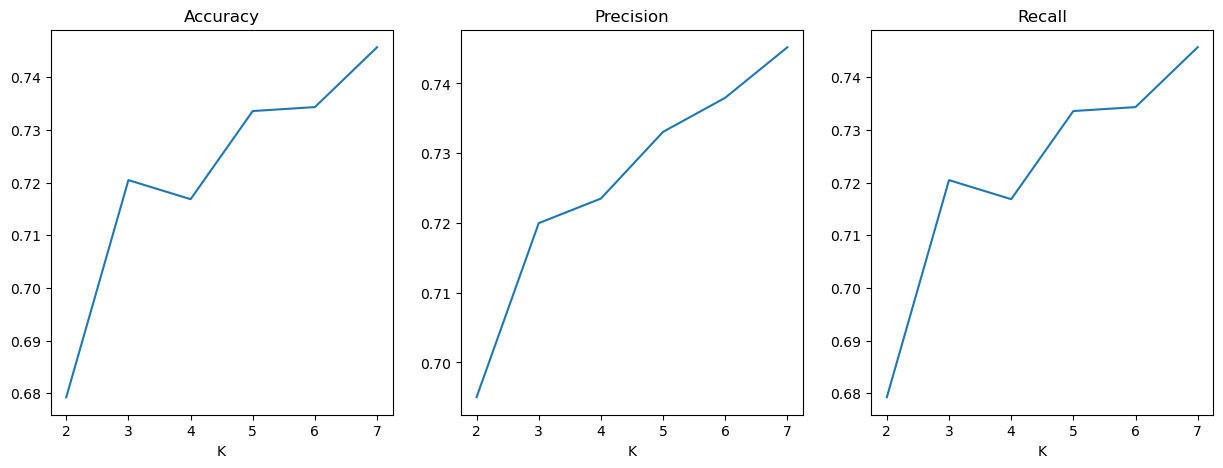

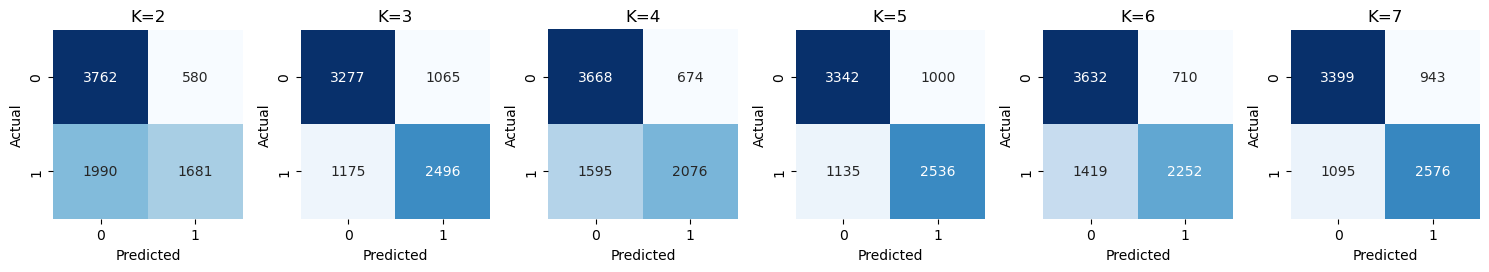

In [ ]:
# Define range of K values to try
k_values = range(2, 8)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_data1, df_target1['seasonal_vaccine'], test_size=0.3, random_state=42)

# Initialize arrays to store evaluation metrics
accuracy = np.zeros(len(k_values))
precision = np.zeros(len(k_values))
recall = np.zeros(len(k_values))
conf_matrices = []

# Perform KNN classification for each value of K
for i, k in enumerate(k_values):
    # Fit KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    knn.fit(X_train, y_train)
    
    # Make predictions on test set
    y_pred = knn.predict(X_test)
    
    # Compute evaluation metrics
    accuracy[i] = accuracy_score(y_test, y_pred)
    precision[i] = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall[i] = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    conf_matrices.append(confusion_matrix(y_test, y_pred, labels=[0,1]))
    
# Plot evaluation metrics as a function of K
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(k_values, accuracy)
axs[0].set_title('Accuracy')

axs[1].plot(k_values, precision)
axs[1].set_title('Precision')

axs[2].plot(k_values, recall)
axs[2].set_title('Recall')

for ax in axs:
    ax.set_xlabel('K')
    ax.set_xticks(k_values)

# Plot confusion matrices
fig, axs = plt.subplots(1, len(k_values), figsize=(15, 3))
axis_labels = [0,1] # labels for axis
for i, conf_matrix in enumerate(conf_matrices):
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axs[i], cbar=False, square=True, xticklabels=axis_labels, yticklabels=axis_labels)
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Actual')
    axs[i].set_title(f'K={k_values[i]}')

plt.tight_layout()
plt.show()


### Choose K=7 to calculate confusion matrix and ROC curv

/Users/yifengpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


*****H1N1 Vaccine*****
Confusion Matrix:
[[3253 1049]
 [1170 2541]]
Accuracy: 0.7230750031199301
Precision: 0.707799442896936
Recall: 0.6847210994341147
F1 Score: 0.6960690316395015


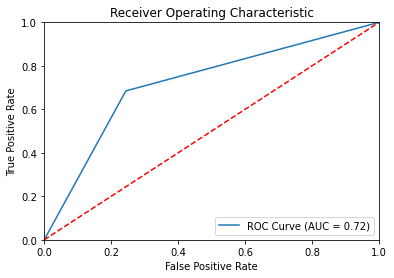

In [ ]:
# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the model on the training data
knn.fit(X_train, y_train)

print("*****Seasonal Vaccine*****")
draw_cm_roc(knn, X_test)

#### Random Forest

/var/folders/5c/z3b6q1rd6wx8671g4nn_l9p80000gn/T/ipykernel_73644/2860499551.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


*****H1N1 Vaccine*****
Confusion Matrix:
[[2303  588]
 [ 632 1819]]
Accuracy: 0.7716211156870086
Precision: 0.7557125051931866
Recall: 0.7421460628314973
F1 Score: 0.7488678468505557


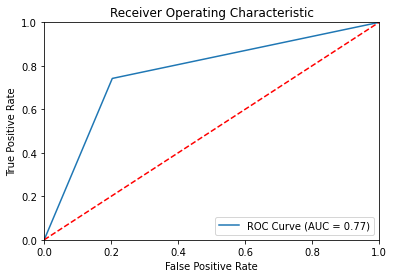

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_data1, df_target1[['seasonal_vaccine']], test_size=0.2, random_state=42
)

# Train a decision tree model
model = RandomForestClassifier()
model.fit(X_train, y_train)

print("*****Seasonal Vaccine*****")
draw_cm_roc(model, X_test)

#### Run for 10 times

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# Assuming X and y are your feature matrix and target vector, respectively

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split( df_data1, df_target1[['seasonal_vaccine']], test_size=0.3)

# Define the classifiers
classifiers = [
    KNeighborsClassifier(n_neighbors=7),
    RandomForestClassifier()
]

# Define the number of iterations
n_iterations = 10

# Store accuracy scores for each classifier
accuracy_scores = []

# Run multiple iterations for each classifier
for classifier in classifiers:
    scores = []
    for _ in range(n_iterations):
        # Fit the model on the training data
        classifier.fit(X_train, y_train)

        # Predict the labels for the test data
        y_pred = classifier.predict(X_test)

        # Calculate accuracy and store the score
        accuracy = accuracy_score(y_test, y_pred)
        scores.append(accuracy)
    
    # Calculate the average accuracy for the classifier
    average_accuracy = np.mean(scores)
    
    # Store the average accuracy score
    accuracy_scores.append(average_accuracy)

# Create a small table to display the average accuracy scores
table_data = {
    'Classifier': ['KNN', 'Random Forest'],
    'Average Accuracy': accuracy_scores
}

df = pd.DataFrame(table_data)
print(df)

/Users/yifengpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/yifengpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/yifengpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/yifengpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed 

      Classifier  Average Accuracy
0            KNN          0.734307
1  Random Forest          0.760589


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split( df_data_new2, df_target_new2[['seasonal_vaccine']], test_size=0.3)

# Define the classifiers
classifiers = [
    KNeighborsClassifier(n_neighbors=7),
    RandomForestClassifier()
]

# Define the number of iterations
n_iterations = 10

# Store accuracy scores for each classifier
accuracy_scores = []

# Run multiple iterations for each classifier
for classifier in classifiers:
    scores = []
    for _ in range(n_iterations):
        # Fit the model on the training data
        classifier.fit(X_train, y_train)

        # Predict the labels for the test data
        y_pred = classifier.predict(X_test)

        # Calculate accuracy and store the score
        accuracy = accuracy_score(y_test, y_pred)
        scores.append(accuracy)
    
    # Calculate the average accuracy for the classifier
    average_accuracy = np.mean(scores)
    
    # Store the average accuracy score
    accuracy_scores.append(average_accuracy)

# Create a small table to display the average accuracy scores
table_data = {
    'Classifier': ['KNN', 'Random Forest'],
    'Average Accuracy': accuracy_scores
}

df = pd.DataFrame(table_data)
print(df)

d:\python\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\python\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\python\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\python\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


      Classifier  Average Accuracy
0            KNN          0.730937
1  Random Forest          0.776551


### With New Features

In [ ]:
data2 = pd.read_csv('data_yesfusion.csv')

In [ ]:
df_target2 = data2[['h1n1_vaccine', 'seasonal_vaccine']]
df_data2 = data2.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
df_data2

h1n1_concern  h1n1_knowledge  behavioral_avoidance  \
0               1.0             0.0                   0.0   
1               3.0             2.0                   1.0   
2               1.0             1.0                   1.0   
3               1.0             1.0                   1.0   
4               2.0             1.0                   1.0   
...             ...             ...                   ...   
26702           2.0             0.0                   1.0   
26703           1.0             2.0                   1.0   
26704           2.0             2.0                   1.0   
26705           1.0             1.0                   0.0   
26706           0.0             0.0                   1.0   

       behavioral_wash_hands  behavioral_large_gatherings  \
0                        0.0                          0.0   
1                        1.0                          0.0   
2                        0.0                          0.0   
3                        1.0                          1.0   
4                        1.0                          1.0   
...                      ...                          ...   
26702                    0.0                          0.0   
26703                    1.0                          0.0   
26704                    1.0                          1.0   
26705                    0.0                          0.0   
26706                    0.0                          0.0   

       behavioral_outside_home  behavioral_touch_face  doctor_recc_h1n1  \
0                          1.0                    1.0               0.0   
1                          1.0                    1.0               0.0   
2                          0.0                    0.0               0.0   
3                          0.0                    0.0               0.0   
4                          0.0                    1.0               0.0   
...                        ...                    ...               ...   
26702                      1.0                    0.0               0.0   
26703                      0.0                    0.0               1.0   
26704                      0.0                    1.0               0.0   
26705                      0.0                    1.0               0.0   
26706                      0.0                    0.0               0.0   

       doctor_recc_seasonal  chronic_med_condition  ...  sex  income_poverty  \
0                       0.0                    0.0  ...    0               3   
1                       0.0                    0.0  ...    1               3   
2                       0.0                    1.0  ...    1               1   
3                       1.0                    1.0  ...    0               3   
4                       0.0                    0.0  ...    0               1   
...                     ...                    ...  ...  ...             ...   
26702                   0.0                    0.0  ...    0               1   
26703                   1.0                    0.0  ...    1               1   
26704                   0.0                    0.0  ...    0               0   
26705                   0.0                    0.0  ...    0               1   
26706                   0.0                    0.0  ...    1               1   

       marital_status  rent_or_own  employment_status  protection_h1n1  \
0                   1            1                  1            0.425   
1                   1            1                  1            0.905   
2                   1            0                  0            0.180   
3                   1            1                  1            0.575   
4                   0            0                  0            0.885   
...               ...          ...                ...              ...   
26702               1            0                  0            0.295   
26703               1            1                  0            0.480   
26704        

#### KNN

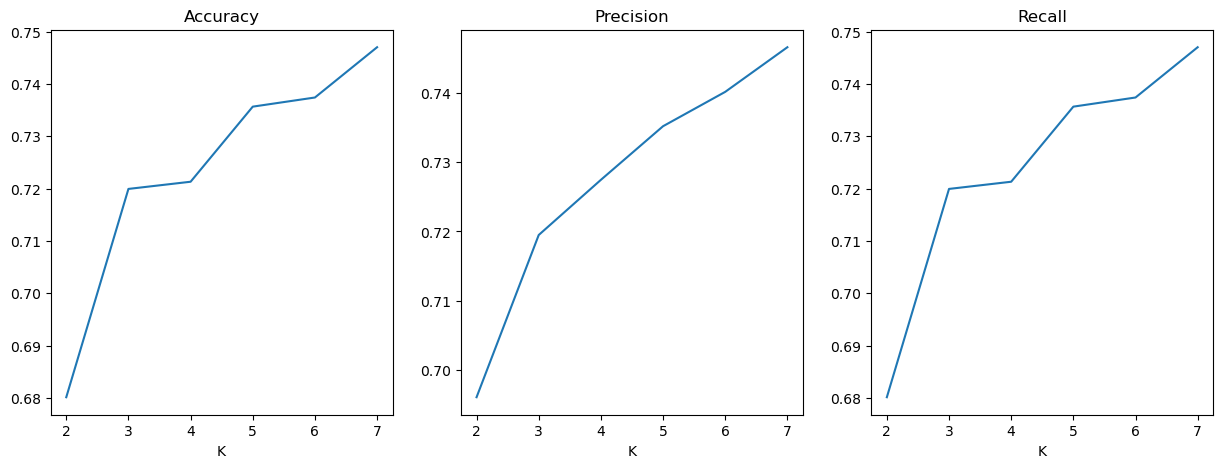

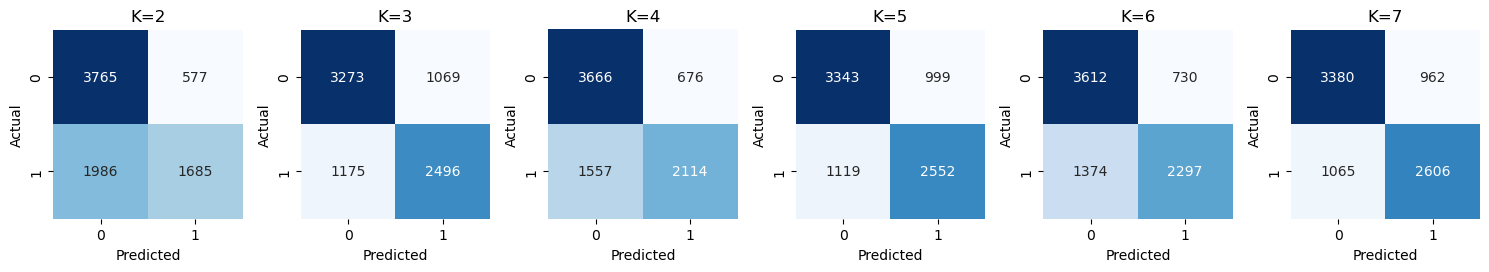

In [ ]:
# Define range of K values to try
k_values = range(2, 8)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_data2, df_target2['seasonal_vaccine'], test_size=0.3, random_state=42)

# Initialize arrays to store evaluation metrics
accuracy = np.zeros(len(k_values))
precision = np.zeros(len(k_values))
recall = np.zeros(len(k_values))
conf_matrices = []

# Perform KNN classification for each value of K
for i, k in enumerate(k_values):
    # Fit KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    knn.fit(X_train, y_train)
    
    # Make predictions on test set
    y_pred = knn.predict(X_test)
    
    # Compute evaluation metrics
    accuracy[i] = accuracy_score(y_test, y_pred)
    precision[i] = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall[i] = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    conf_matrices.append(confusion_matrix(y_test, y_pred, labels=[0,1]))
    
# Plot evaluation metrics as a function of K
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(k_values, accuracy)
axs[0].set_title('Accuracy')

axs[1].plot(k_values, precision)
axs[1].set_title('Precision')

axs[2].plot(k_values, recall)
axs[2].set_title('Recall')

for ax in axs:
    ax.set_xlabel('K')
    ax.set_xticks(k_values)

# Plot confusion matrices
fig, axs = plt.subplots(1, len(k_values), figsize=(15, 3))
axis_labels = [0,1] # labels for axis
for i, conf_matrix in enumerate(conf_matrices):
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axs[i], cbar=False, square=True, xticklabels=axis_labels, yticklabels=axis_labels)
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Actual')
    axs[i].set_title(f'K={k_values[i]}')

plt.tight_layout()
plt.show()


### Choose K=7 to calculate confusion matrix and ROC curv

/Users/yifengpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


*****H1N1 Vaccine*****
Confusion Matrix:
[[3307  983]
 [1146 2577]]
Accuracy: 0.7343067515287658
Precision: 0.7238764044943821
Recall: 0.6921837228041902
F1 Score: 0.7076754084855142


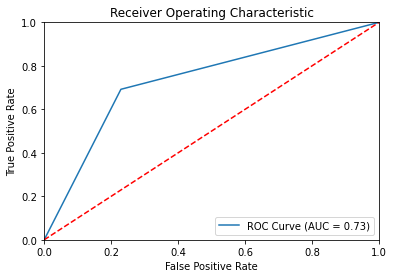

In [ ]:
# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the model on the training data
knn.fit(X_train, y_train)

print("*****Seasonal Vaccine*****")
draw_cm_roc(knn, X_test)

#### Random Forest

/var/folders/5c/z3b6q1rd6wx8671g4nn_l9p80000gn/T/ipykernel_73644/2977853336.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


*****H1N1 Vaccine*****
Confusion Matrix:
[[2298  593]
 [ 641 1810]]
Accuracy: 0.7690003743916136
Precision: 0.7532251352476071
Recall: 0.7384740922072623
F1 Score: 0.7457766790276061


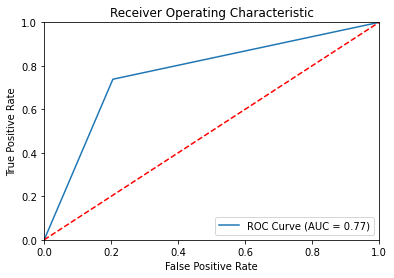

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_data2, df_target2[['seasonal_vaccine']], test_size=0.2, random_state=42
)

# Train a decision tree model
model = RandomForestClassifier()
model.fit(X_train, y_train)

print("*****Seasonal Vaccine*****")
draw_cm_roc(model, X_test)

#### Run for 10 times

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# Assuming X and y are your feature matrix and target vector, respectively

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split( df_data2, df_target2[['seasonal_vaccine']], test_size=0.3)

# Define the classifiers
classifiers = [
    KNeighborsClassifier(n_neighbors=7),
    RandomForestClassifier()
]

# Define the number of iterations
n_iterations = 10

# Store accuracy scores for each classifier
accuracy_scores = []

# Run multiple iterations for each classifier
for classifier in classifiers:
    scores = []
    for _ in range(n_iterations):
        # Fit the model on the training data
        classifier.fit(X_train, y_train)

        # Predict the labels for the test data
        y_pred = classifier.predict(X_test)

        # Calculate accuracy and store the score
        accuracy = accuracy_score(y_test, y_pred)
        scores.append(accuracy)
    
    # Calculate the average accuracy for the classifier
    average_accuracy = np.mean(scores)
    
    # Store the average accuracy score
    accuracy_scores.append(average_accuracy)

# Create a small table to display the average accuracy scores
table_data = {
    'Classifier': ['KNN', 'Random Forest'],
    'Average Accuracy': accuracy_scores
}

df = pd.DataFrame(table_data)
print(df)

/Users/yifengpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/yifengpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/yifengpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/yifengpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed 

      Classifier  Average Accuracy
0            KNN          0.746911
1  Random Forest          0.764695
